# 03 Tselluloositehase konflikt

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import csv
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
from wordcloud import WordCloud
from estnltk import Text
import re

In [2]:
konflikt = 'Tselluloositehas'
data = pd.read_excel('980_tselluloositehas.xlsx', engine='openpyxl')

In [3]:
data.shape

(980, 7)

## 1. Andmete töötlemine

In [4]:
data['title'].value_counts()

NÄDALA NÄGU                                                                                                             2
Est-For Invest otsustab tehase tuleviku lähinädalatel                                                                   2
KOLM KÜSIMUST RIIGIKOGU VALIMISTE KANDIDAADILE Kuidas päästa pensionärid vaesusest, kui nad ikka vajavad päästmist?     2
Valitsus otsustas asuda tselluloositehase eriplaneeringut lõpetama                                                      2
Hein: Saaremaa silda minu silmad vist ei näe                                                                            1
                                                                                                                       ..
Erakond ja kogukond                                                                                                     1
Kohalik võim tahab tselluloositehase planeerimisel rohkem sõnaõigust                                                    1
Riigikokku pääsu ihkava 

In [5]:
tbl = pd.DataFrame(data['title'].value_counts().sort_index())

In [6]:
tbl

title
"AK. Nädal" suurkanala näitel: kas Eestis ei olegi tööstusele enam kohta?            1
"AK. Nädal" uuris, kuidas Eesti puitu kõige mõistlikumalt kasutada                   1
"Ajaloo ilu": valitsus kiitis tselluloositehase rajamise heaks juba aastal 2000      1
"Olukorrast riigis": koroonaviiruse tüsistustest Eestis ülevaade puudub              1
"Pealtnägija": Tselluloositehase arendajad esitasid riigile oma erisoovid            1
...                                                                                ...
Üle laiba                                                                            1
Ülle Madise: omakasulist ässitamist ei saa Eesti küll endale lubada                  1
Šamanistlik Viimsi ja müstikakool andekatele lastele                                 1
„Excelis paistab nii ja naa. Metsa minnes tõusevad ihukarvad püsti“                  1
„Käpiknukk“ Janek Mäggi elu kohutavaim koosolek                                      1

[976 rows x 1 columns]

In [7]:
tbl.to_excel("tulemused_" + konflikt +"/" + konflikt + " pealkirjad_0405.xlsx") 

In [8]:
date = data['date'].to_list()

In [9]:
# Artikli kuupäeva teisendamine

kuupäevad = []
aastad = []
kuud = []
päevad = []
aasta_kuud =[]
for d in date:
    match = re.search(r'\d{4}\-\d{2}\-\d{2}', d)
    if match:
        kuupäev = match[0][0:10]
        aasta = match[0][0:4]
        kuu = match[0][5:7]
        päev = match[0][8:10]
        aasta_kuu = match[0][0:7]
    kuupäevad.append(kuupäev) 
    aastad.append(aasta)
    kuud.append(kuu)
    päevad.append(päev)
    aasta_kuud.append(aasta_kuu)

In [10]:
# Tunnuste lisamine andmestikku

data['kuupäev']=kuupäevad
data['aasta']=aastad
data['kuu']=kuud
data['päev']=päevad
data['aasta_kuu']=aasta_kuud

In [11]:
kuupäevad

['2021-09-08',
 '2020-10-27',
 '2020-08-26',
 '2018-12-30',
 '2018-12-04',
 '2018-11-29',
 '2018-11-28',
 '2018-11-14',
 '2018-11-13',
 '2018-11-07',
 '2018-11-07',
 '2018-10-31',
 '2018-10-30',
 '2018-10-23',
 '2018-10-17',
 '2018-09-13',
 '2018-08-30',
 '2018-07-17',
 '2018-06-22',
 '2018-06-21',
 '2018-06-21',
 '2018-06-20',
 '2018-06-19',
 '2018-06-19',
 '2018-06-13',
 '2018-06-13',
 '2018-06-08',
 '2018-06-07',
 '2018-06-05',
 '2018-06-05',
 '2018-06-04',
 '2018-06-04',
 '2018-06-03',
 '2018-06-02',
 '2018-05-23',
 '2018-05-23',
 '2018-05-22',
 '2018-05-02',
 '2018-04-10',
 '2018-04-06',
 '2018-03-22',
 '2018-03-21',
 '2018-03-21',
 '2018-03-20',
 '2018-03-14',
 '2018-03-14',
 '2018-03-09',
 '2018-03-09',
 '2018-03-09',
 '2018-03-09',
 '2018-03-08',
 '2018-03-08',
 '2018-03-07',
 '2018-03-01',
 '2018-02-27',
 '2018-02-27',
 '2018-02-24',
 '2018-02-13',
 '2018-02-06',
 '2018-01-31',
 '2018-01-18',
 '2018-01-25',
 '2018-01-16',
 '2017-12-13',
 '2017-09-25',
 '2017-09-19',
 '2017-05-

In [12]:
data

#  \
0      1   
1      2   
2      3   
3      4   
4      5   
..   ...   
975  976   
976  977   
977  978   
978  979   
979  980   

                                                                                                                              title  \
0             Kohtla-Järve veerele planeeritav tselluloositehas annaks põlevkivikaevuritele töö ja tuleviku, aga mida saaks teised?   
1                                                          Kristina Kallas: Ratase teine valitsus on veel hullem kui Reformierakond   
2                                                       Kirju karjääriga ekssuusatajast Kaspar Kokkast on saanud Isamaa suursponsor   
3    Marju Lauristin: ajakirjandus naeruvääristas tartlasi, kes tselluloosivabrikut tõrjusid, inimesi, kes oma õiguste eest seisid!   
4                                                                                     GUUD JA BÄÄD & NÄDALA SÕNA | Tartu ikka vastu   
..                                                                                                                              ...   
975                                                                                               Volikogu teeb lõpuks tiigrihüppe    
976                                                                   Eesti ja Läti puiduettevõtjad otsisid ühistegevuse võimalusi    
977                                                                                                           Retsept: Mine metsa!    
978                                                                                                                 Tehased ja teed   
979                                                                                                     Tselluloositehast pole vaja   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [13]:
len(kuupäevad)

980

In [14]:
# Mittevajalike tunnuste eemaldamine

del data['date']

In [15]:
data.shape

(980, 11)

## 2. Väljaanded

In [16]:
jaotus1 = data['subject'].value_counts(ascending = False)
tabel1 = pd.DataFrame({'Väljaande nimi':jaotus1.index, 'Artikleid':jaotus1.values})
tabel1['Osakaal, %'] = round((tabel1['Artikleid'] / 
                      tabel1['Artikleid'].sum() )* 100, 1)
tabel1_1 = tabel1.style.set_caption(konflikt + ": vaadeldud artikleid väljaannete kaupa")
tabel1.to_excel("tulemused_" + konflikt +"/" + konflikt + " tabel1_Väljaanded.xlsx") 

INFO:utils.py:159: NumExpr defaulting to 8 threads.


In [17]:
tabel1_1

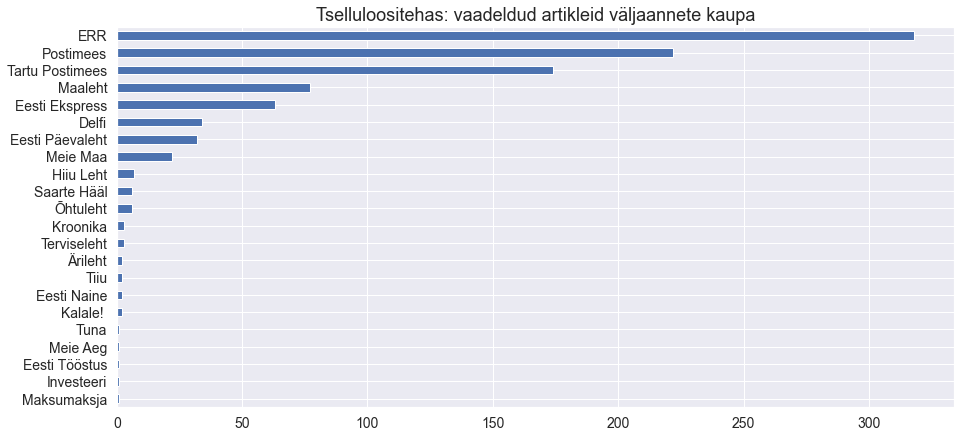

In [18]:
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(15,7))
plt.title(konflikt + ": vaadeldud artikleid väljaannete kaupa", size=18)
data['subject'].value_counts(ascending = True).plot(ax=ax, kind='barh', fontsize=14)
plt.savefig("tulemused_" + konflikt +"/" + konflikt + " joonis1_Väljaanded.png")
plt.show()

## 3. Sõnapilvede loomine

In [19]:
#https://et.wikipedia.org/wiki/Sides%C3%B5na
#https://www.taskutark.ee/m/asesonad/
#sidesõnad
stopsõnad = ['ja', 'ning', 'ega', 'ehk', 'või', 'aga', 'kuid', 'ent', 'vaid', 'et', 'kui', 'kuna', 'sest', 'kuni', 'kuigi', 
             'ehkki', 'nagu', 'saati', 'elik', 'justkui', 'otsekui', 'seni']
#sidesõnad ja asesõnad
stopsõnad_uus = ['ja', 'ning', 'ega', 'ehk', 'või', 'aga', 'kuid', 'ent', 'vaid', 'et', 'kui', 'kuna', 'sest', 'kuni', 'kuigi', 
             'ehkki', 'nagu', 'saati', 'elik', 'justkui', 'otsekui', 'seni', 'siis', 'ka', 'nii', 'kas',
             'mina', 'ma', 'meie', 'me', 'sina', 'sa', 'teie', 'te', 'tema', 'ta', 'nemad', 'nad',
             'enese', 'enda', 'iseenese', 'iseenda', 'oma', 'üksteise', 'teineteise',
             'see', 'too', 'sama', 'seesama', 'toosama', 'teine', 'muu',
             'niisugune', 'samasugune', 'niisamasugune', 'selline', 'seesugune', 'säärane','säherdune', 
             'taoline', 'selletaoline', 'kes', 'mis', 'kumb', 'missugune', 'milline', 'misuke', 'mitu', 'mitmes', 'mitmendik',
             'ise', 'oma', 'iga', 'igaüks', 'igamees', 'kõik', 'mõlemad', 'kumbki', 'emb-kumb', 'kogu', 'terve',
             'keegi', 'miski', 'mingi', 'mingisugune', 'miskisugune', 'ükski', 'mitu', 'mitmes', 'mitu-setu', 'mitmes-setmes',
             'mõni', 'mõningane', 'paljud', 'üks', 'teine', 'oma', 'enese', 'enda', 'omaenese', 'omaenda', 'iseoma', 
             'iseenese', 'iseenda', 'emb', 'mõlema', 'palju']

## 3.1 Nimi- ja omadussõnad

### 3.1.1 Nimi- ja omadussõnad artiklite pealkirjades

EstNLTK vahenditega vaadeldakse uudistes esinevate sõnade lemmasid ja sõnade liike. Edaspidiseks vaatluseks eraldatakse nimisõnad (sõnaliik S) ja  omadussõnad (sõnaliigid A - algvõrre, C - keskvõrre, U - ülivõrre).

In [20]:
# Nimisõnade ja omadussõnade kasutamine

nimi_omadus_sonad = []
for i in tqdm(range (0, len(data))):
    rida = data.iloc[i]
    tekst = Text(rida[1]).tag_layer().morph_analysis['lemma','partofspeech']
    for sona in tekst:
        if sona[0][1] == 'S' or sona[0][1] == 'A' or sona[0][1] == 'C' or sona[0][1] == 'U':
            nimi_omadus_sonad.append(sona[0][0])

nimi_omadus_words = ' '.join(map(str, nimi_omadus_sonad))

100%|███████████████████████████████████████████████████████████████████████████████| 980/980 [00:04<00:00, 199.91it/s]


Tselluloositehas: pealkirjades nimisõnu ja omadussõnu sõnapilves:  3187


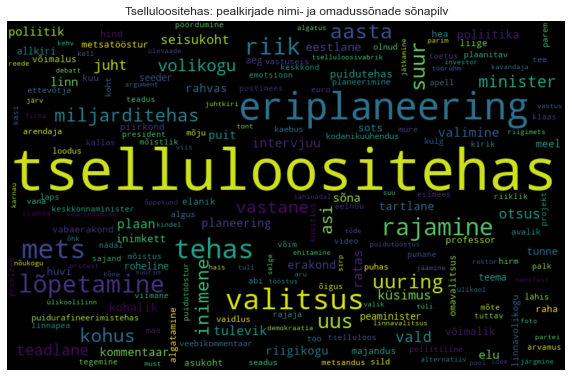

In [21]:
wordcloud_nimi_omadus = WordCloud(stopwords = stopsõnad_uus, width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(nimi_omadus_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_nimi_omadus, interpolation='bilinear')
plt.title(konflikt + ": pealkirjade nimi- ja omadussõnade sõnapilv")
plt.axis("off")
plt.savefig("tulemused_" + konflikt +"/" + konflikt + ' joonis2_Pealkirjad_nimi_omadus_sonapilv.png')

print(konflikt + ": pealkirjades nimisõnu ja omadussõnu sõnapilves: ", len(nimi_omadus_sonad))

### 3.1.2 Nimi- ja omadussõnade esinemissagedus artiklite pealkirjades

In [22]:
jaotus2 =pd.DataFrame(nimi_omadus_sonad, columns=['sõna'])
tabel2 = jaotus2.groupby(['sõna']).size().reset_index(name='esinemissagedus').sort_values(by='esinemissagedus', ascending=False)[:20]
tabel2['osakaal %']= (tabel2['esinemissagedus']/len(nimi_omadus_sonad)*100)
tabel2_1 = tabel2.style.set_caption(konflikt + ": pealkirjade nimi- ja omadussõnade TOP 20")
tabel2.to_excel("tulemused_" + konflikt +"/" + konflikt + " tabel2_Pealkirjad_nimi_omadus_TOP_20.xlsx") 

In [23]:
tabel2_1

### 3.1.3 Nimi- ja omadussõnade kasutamine artiklite tekstides

In [24]:
# Nimisõnade ja omadussõnade kasutamine

nimi_omadus_sonad1 = []
for i in tqdm(range (0, len(data))):
    rida = data.iloc[i]
    tekst = Text(rida[2]).tag_layer().morph_analysis['lemma','partofspeech']
    for sona in tekst:
        if sona[0][1] == 'S' or sona[0][1] == 'A' or sona[0][1] == 'C' or sona[0][1] == 'U':
            nimi_omadus_sonad1.append(sona[0][0])

nimi_omadus_words1 = ' '.join(map(str, nimi_omadus_sonad1))

100%|████████████████████████████████████████████████████████████████████████████████| 980/980 [07:19<00:00,  2.23it/s]


Tselluloositehas: tekstides nimisõnu ja omadussõnu sõnapilves  279363


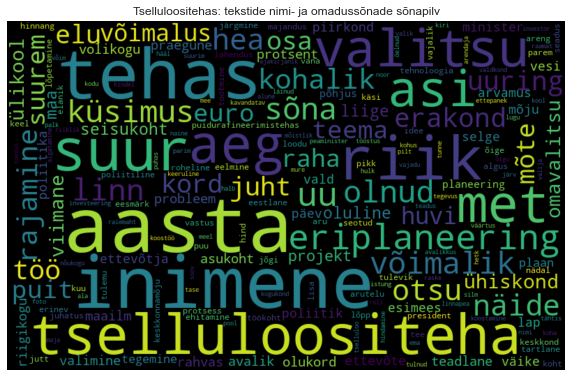

In [25]:
wordcloud_nimi_omadus1 = WordCloud(stopwords = stopsõnad_uus, width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(nimi_omadus_words1)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_nimi_omadus1, interpolation='bilinear')
plt.title(konflikt + ": tekstide nimi- ja omadussõnade sõnapilv")
plt.axis("off")
plt.savefig("tulemused_" + konflikt +"/" + konflikt + ' joonis3_Tekstid_nimi_omadus_sonapilv.png')
print(konflikt + ": tekstides nimisõnu ja omadussõnu sõnapilves ", len(nimi_omadus_sonad1))

### 3.1.4 Nimi- ja omadussõnade esinemissagedus artiklite tekstides

In [26]:
jaotus3 =pd.DataFrame(nimi_omadus_sonad1, columns=['sõna'])
tabel3 = jaotus3.groupby(['sõna']).size().reset_index(name='esinemissagedus').sort_values(by='esinemissagedus', ascending=False)[:20]
tabel3['osakaal %']= (tabel3['esinemissagedus']/len(nimi_omadus_sonad1)*100)
tabel3_1 = tabel3.style.set_caption(konflikt + ": tekstide nimi- ja omadussõnade TOP 20")
tabel3.to_excel("tulemused_" + konflikt +"/" + konflikt + " tabel3_Tekstid_nimi_omadus_TOP_20.xlsx") 

In [27]:
tabel3_1

## 3.2 Verbid

### 3.2.1 Verbid artiklite pealkirjades

100%|███████████████████████████████████████████████████████████████████████████████| 980/980 [00:04<00:00, 200.32it/s]


Tselluloositehas: verbe sõnapilves  1285


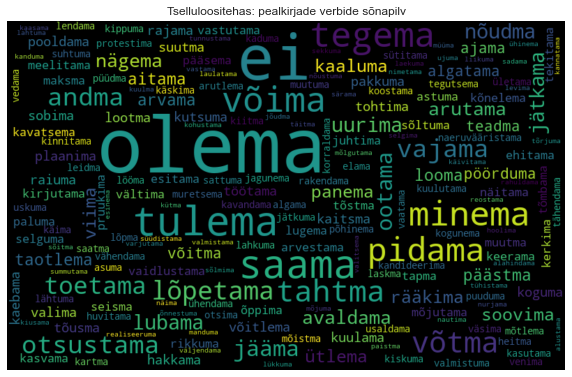

In [28]:
verb_sonad = []
for i in tqdm(range (0, len(data))):
    rida = data.iloc[i]
    tekst = Text(rida[1]).tag_layer().morph_analysis['lemma','partofspeech']
    for sona in tekst:
        if sona[0][1] == 'V':
            verb_sonad.append(sona[0][0])

verb_words = ' '.join(map(str, verb_sonad))

wordcloud_verb = WordCloud(stopwords = stopsõnad_uus, width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(verb_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_verb, interpolation='bilinear')
plt.title(konflikt + ": pealkirjade verbide sõnapilv")
plt.axis("off")
plt.savefig("tulemused_" + konflikt +"/" + konflikt + ' joonis4_Pealkirjad_verbid_sonapilv.png')
print(konflikt + ": verbe sõnapilves ", len(verb_sonad))

### 3.2.2 Verbide esinemissagedus artiklite pealkirjades

In [29]:
jaotus4 =pd.DataFrame(verb_sonad, columns=['sõna'])
tabel4 = jaotus4.groupby(['sõna']).size().reset_index(name='esinemissagedus').sort_values(by='esinemissagedus', ascending=False)[:20]
tabel4['osakaal %']= (tabel4['esinemissagedus']/len(verb_sonad)*100)
tabel4_1 = tabel4.style.set_caption(konflikt + ": pealkirjade verbide TOP 20")
tabel4.to_excel("tulemused_" + konflikt +"/" + konflikt + " tabel4_Pealkirjad_verbid_TOP_20.xlsx")

In [30]:
tabel4_1

### 3.2.3 Verbid artiklite tekstides

100%|████████████████████████████████████████████████████████████████████████████████| 980/980 [07:21<00:00,  2.22it/s]


Tselluloositehas: verbe sõnapilves:  160792


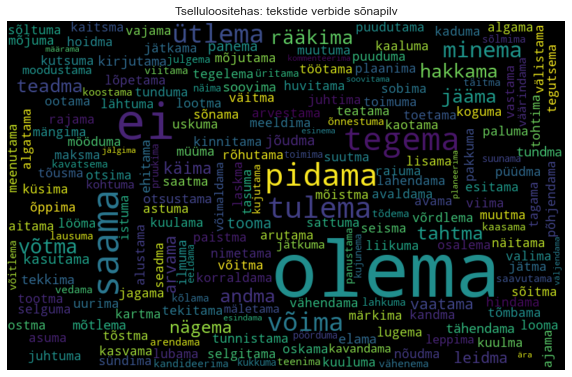

In [31]:
verb_sonad1 = []
for i in tqdm(range (0, len(data))):
    rida = data.iloc[i]
    tekst = Text(rida[2]).tag_layer().morph_analysis['lemma','partofspeech']
    for sona in tekst:
        if sona[0][1] == 'V':
            verb_sonad1.append(sona[0][0])

verb_words1 = ' '.join(map(str, verb_sonad1))

wordcloud_verb1 = WordCloud(stopwords = stopsõnad_uus, width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(verb_words1)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_verb1, interpolation='bilinear')
plt.title(konflikt + ": tekstide verbide sõnapilv")
plt.axis("off")
plt.savefig("tulemused_" + konflikt +"/" + konflikt + ' joonis5_Tekstid_verbid_sonapilv.png')
print(konflikt + ": verbe sõnapilves: ", len(verb_sonad1))

### 3.2.4 Verbide esinemissagedus artiklite tekstides

In [32]:
jaotus5 =pd.DataFrame(verb_sonad1, columns=['sõna'])
tabel5 = jaotus5.groupby(['sõna']).size().reset_index(name='esinemissagedus').sort_values(by='esinemissagedus', ascending=False)[:20]
tabel5['osakaal %']= (tabel5['esinemissagedus']/len(verb_sonad1)*100)
tabel5_1 = tabel5.style.set_caption(konflikt + ": tekstide verbide TOP 20")
tabel5.to_excel("tulemused_" + konflikt +"/" + konflikt +  " tabel5_Tekstid_verbid_TOP_20.xlsx")

In [33]:
tabel5_1

# 4. Meediakajastus ajalisel skaalal

In [34]:
jaotus6 = data['aasta'].value_counts().sort_index()
tabel6 = pd.DataFrame({'Aasta':jaotus6.index, 'Artikleid':jaotus6.values})
tabel6['Osakaal, %'] = round((tabel6['Artikleid'] / 
                      tabel6['Artikleid'].sum() )* 100, 1)
tabel6_1 = tabel6.style.set_caption(konflikt + ": vaadeldud artikleid aastate lõikes")
tabel6.to_excel("tulemused_" + konflikt +"/" + konflikt + " tabel6_Aastate_lõikes.xlsx") 

In [35]:
tabel6_1

C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


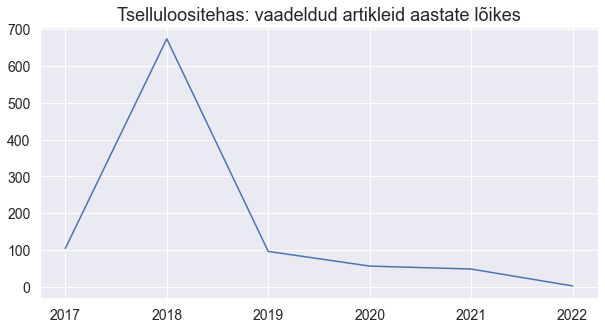

In [36]:
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10,5))
plt.title(konflikt + ": vaadeldud artikleid aastate lõikes", size=18)
data['aasta'].value_counts().sort_index().plot(ax=ax, kind='line', fontsize=14)
plt.savefig("tulemused_" + konflikt +"/" + konflikt + " joonis6_Aastate_lõikes.png")
plt.show()

In [37]:
jaotus7 = data['aasta_kuu'].value_counts().sort_index()
tabel7 = pd.DataFrame({'Aasta':jaotus7.index, 'Artikleid':jaotus7.values})
tabel7['Osakaal, %'] = round((tabel7['Artikleid'] / 
                      tabel7['Artikleid'].sum() )* 100, 1)
tabel7_1 = tabel7.style.set_caption(konflikt + ": vaadeldud artikleid aastate ja kuude lõikes")
tabel7.to_excel("tulemused_" + konflikt +"/" + konflikt + " tabel7_Aastate_kuude_lõikes.xlsx") 

In [38]:
tabel7_1

In [66]:
type(jaotus7)

pandas.core.series.Series

In [63]:
type(tabel7.Aasta)

pandas.core.series.Series

In [59]:
from datetime import datetime
dates = [datetime.strptime(ii, "%Y-%m-%d") for ii in date]

In [60]:
dates

[datetime.datetime(2021, 9, 8, 0, 0),
 datetime.datetime(2020, 10, 27, 0, 0),
 datetime.datetime(2020, 8, 26, 0, 0),
 datetime.datetime(2018, 12, 30, 0, 0),
 datetime.datetime(2018, 12, 4, 0, 0),
 datetime.datetime(2018, 11, 29, 0, 0),
 datetime.datetime(2018, 11, 28, 0, 0),
 datetime.datetime(2018, 11, 14, 0, 0),
 datetime.datetime(2018, 11, 13, 0, 0),
 datetime.datetime(2018, 11, 7, 0, 0),
 datetime.datetime(2018, 11, 7, 0, 0),
 datetime.datetime(2018, 10, 31, 0, 0),
 datetime.datetime(2018, 10, 30, 0, 0),
 datetime.datetime(2018, 10, 23, 0, 0),
 datetime.datetime(2018, 10, 17, 0, 0),
 datetime.datetime(2018, 9, 13, 0, 0),
 datetime.datetime(2018, 8, 30, 0, 0),
 datetime.datetime(2018, 7, 17, 0, 0),
 datetime.datetime(2018, 6, 22, 0, 0),
 datetime.datetime(2018, 6, 21, 0, 0),
 datetime.datetime(2018, 6, 21, 0, 0),
 datetime.datetime(2018, 6, 20, 0, 0),
 datetime.datetime(2018, 6, 19, 0, 0),
 datetime.datetime(2018, 6, 19, 0, 0),
 datetime.datetime(2018, 6, 13, 0, 0),
 datetime.dateti

C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


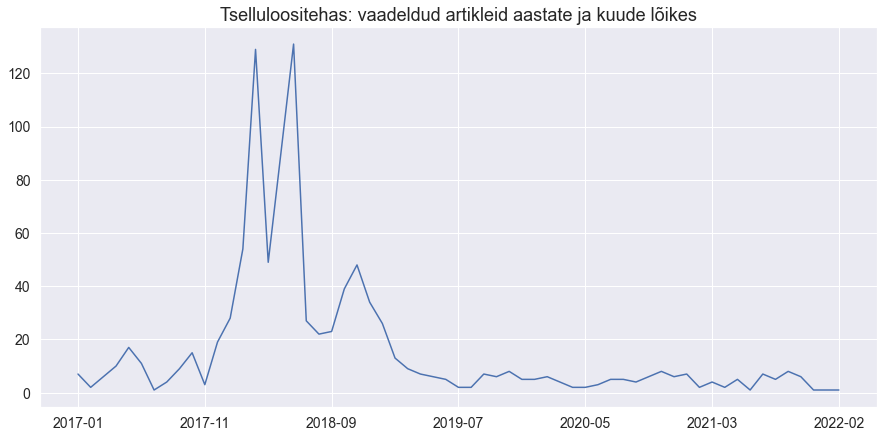

In [64]:
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(15,7))
plt.title(konflikt + ": vaadeldud artikleid aastate ja kuude lõikes", size=18)
jaotus7.plot(ax=ax, kind='line', fontsize=14)
#data['aasta_kuu'].value_counts().sort_index().plot(ax=ax, kind='line', fontsize=14)
#plt.savefig("tulemused_" + konflikt +"/" + konflikt + " joonis7_Aastate_kuude_lõikes.png")
plt.show()

In [40]:
jaotus7_a = data['kuupäev'].value_counts().sort_index()
tabel7_a = pd.DataFrame({'Kuupäev':jaotus7_a.index, 'Artikleid':jaotus7_a.values})
tabel7_a['Osakaal, %'] = round((tabel7_a['Artikleid'] / 
                      tabel7_a['Artikleid'].sum() )* 100, 1)
tabel7_a_1 = tabel7_a.style.set_caption(konflikt + ": vaadeldud artikleid kuupäevade lõikes")
tabel7_a.to_excel("tulemused_" + konflikt +"/" + konflikt + " tabel7_a_Kuupäevade_lõikes.xlsx") 

In [41]:
tabel7_a_1

C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


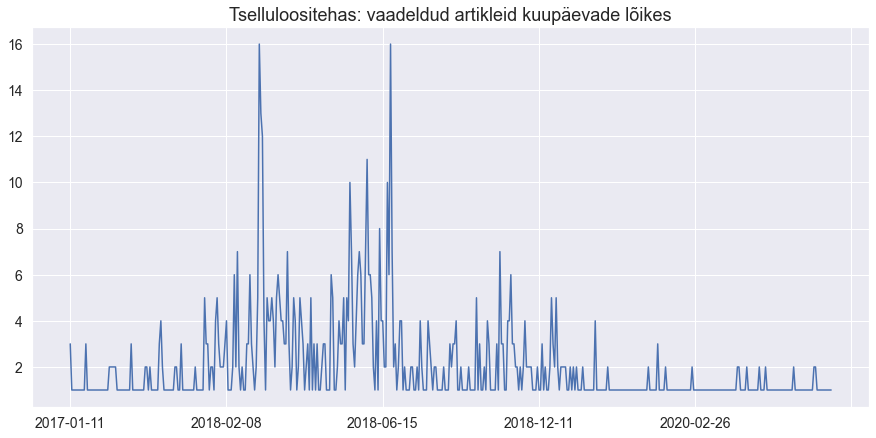

In [42]:
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(15,7))
plt.title(konflikt + ": vaadeldud artikleid kuupäevade lõikes", size=18)
data['kuupäev'].value_counts().sort_index().plot(ax=ax, kind='line', fontsize=14)
plt.savefig("tulemused_" + konflikt +"/" + konflikt + " joonis7_a_Kuupäevade_lõikes.png")
plt.show()

In [43]:
konfl = data[data.code == 1]

In [44]:
data['code'].value_counts()

2    499
1    481
Name: code, dtype: int64

In [45]:
muu = data[data.code == 2]

In [46]:
jaotus7_b = konfl['aasta'].value_counts().sort_index()
tabel7_b = pd.DataFrame({'Aasta':jaotus7_b.index, 'Artikleid':jaotus7_b.values})
tabel7_b['Osakaal, %'] = round((tabel7_b['Artikleid'] / 
                      tabel7_b['Artikleid'].sum() )* 100, 1)
tabel7_b_1 = tabel7_b.style.set_caption(konflikt + ": (konflikt) vaadeldud artikleid aastate lõikes")
tabel7_b.to_excel("tulemused_" + konflikt +"/" + konflikt + " tabel7_b_Aastate_lõikes_konflikt.xlsx") 

In [47]:
tabel7_b_1

C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


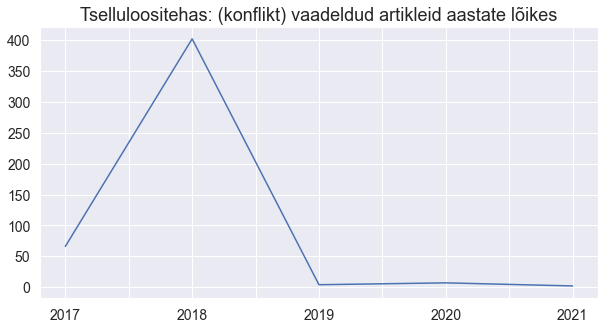

In [48]:
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10,5))
plt.title(konflikt + ": (konflikt) vaadeldud artikleid aastate lõikes", size=18)
konfl['aasta'].value_counts().sort_index().plot(ax=ax, kind='line', fontsize=14)
plt.savefig("tulemused_" + konflikt +"/" + konflikt + " joonis7_b_Aastate_lõikes_konflikt.png")
plt.show()

In [49]:
jaotus7_c = konfl['aasta_kuu'].value_counts().sort_index()
tabel7_c = pd.DataFrame({'Aasta':jaotus7_c.index, 'Artikleid':jaotus7_c.values})
tabel7_c['Osakaal, %'] = round((tabel7_c['Artikleid'] / 
                      tabel7_c['Artikleid'].sum() )* 100, 1)
tabel7_c_1 = tabel7_c.style.set_caption(konflikt + ": (konflikt) vaadeldud artikleid aastate ja kuude lõikes")
tabel7_c.to_excel("tulemused_" + konflikt +"/" + konflikt + " tabel7_c_Aastate_kuude_lõikes_konflikt.xlsx") 

In [50]:
tabel7_c_1

C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


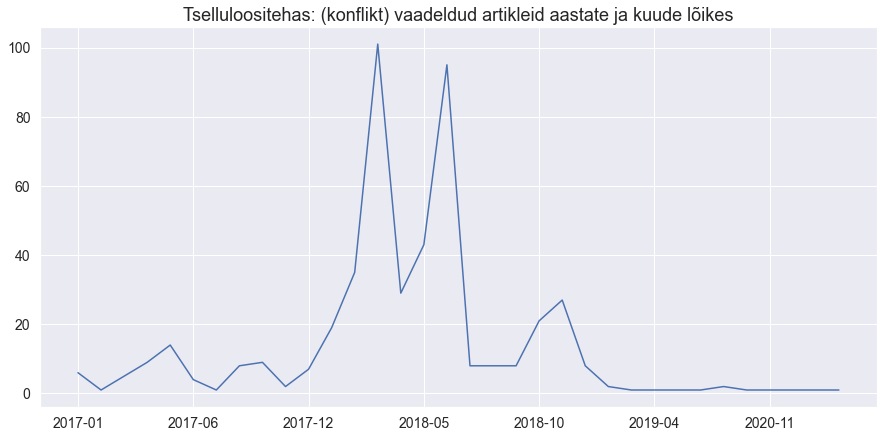

In [51]:
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(15,7))
plt.title(konflikt + ": (konflikt) vaadeldud artikleid aastate ja kuude lõikes", size=18)
konfl['aasta_kuu'].value_counts().sort_index().plot(ax=ax, kind='line', fontsize=14)
plt.savefig("tulemused_" + konflikt +"/" + konflikt + " joonis7_c_Aastate_kuude_lõikes_konflikt.png")
plt.show()

In [52]:
jaotus7_d = konfl['kuupäev'].value_counts().sort_index()
tabel7_d = pd.DataFrame({'Kuupäev':jaotus7_d.index, 'Artikleid':jaotus7_d.values})
tabel7_d['Osakaal, %'] = round((tabel7_d['Artikleid'] / 
                      tabel7_d['Artikleid'].sum() )* 100, 1)
tabel7_d_1 = tabel7_d.style.set_caption(konflikt + ": (konflikt) vaadeldud artikleid kuupäevade lõikes")
tabel7_d.to_excel("tulemused_" + konflikt +"/" + konflikt + " tabel7_d_Kuupäevade_lõikes_konflikt.xlsx") 

In [53]:
tabel7_d_1

C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


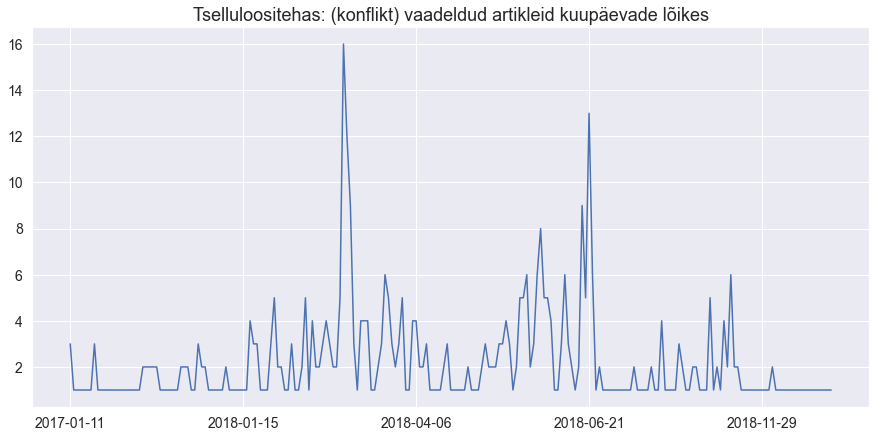

In [54]:
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(15,7))
plt.title(konflikt + ": (konflikt) vaadeldud artikleid kuupäevade lõikes", size=18)
konfl['kuupäev'].value_counts().sort_index().plot(ax=ax, kind='line', fontsize=14)
plt.savefig("tulemused_" + konflikt +"/" + konflikt + " joonis7_d_Kuupäevade_lõikes_konflikt.png")
plt.show()

# 5. Nimed

In [55]:
# Loome uue nimeüksuste tuvastaja 
from estnltk.taggers import NerTagger
ner_tagger = NerTagger()
# Milliseid kihte ner_tagger vajab?
ner_tagger.input_layers

('morph_analysis',)

In [56]:
tekst = data['text'].to_list()

In [57]:
# Otsitakse tekstist nimesid
nimed_labels_d = {}
nimed_texts = []
nimed_labels = []
from estnltk import Text

for k in tekst:
    t= Text(k).tag_layer('morph_analysis')
    # lisame nimeüksuste märgenduse
    ner_tagger.tag(t)
    # leia nimeüksuste liigid
    entity_labels = t.ner[['nertag']]
    # leia nimeüksuste tekstijupid
    entity_texts = [ne.enclosing_text for ne in t.ner]
    # leia nimeüksuste asukohad
    entity_spans = [(ne.start, ne.end) for ne in t.ner]

    # väljastab tuvastatud nimeüksused koos nende asukohtade, tekstijuppide ja liikidega:
    for ne_phrase, ne_label, ne_span in zip(entity_texts, entity_labels, entity_spans):
        print( ne_span, ne_phrase, ne_label )
    nimed_texts.append(entity_texts)
    nimed_labels.append(entity_labels)

(20, 27) Maalehe ['ORG']
(82, 94) Kohtla-Nõmme ['LOC']
(144, 147) VKG ['ORG']
(230, 242) Ahti Asmanni ['PER']
(9, 14) Eesti ['LOC']
(24, 39) Kristina Kallas ['PER']
(80, 87) EKRE-ga ['ORG']
(131, 140) Tallinnas ['LOC']
(141, 153) Keskerakonda ['ORG']
(164, 169) Eesti ['LOC']
(244, 249) Eesti ['LOC']
(317, 322) Poola ['LOC']
(144, 150) Isamaa ['ORG']
(151, 156) Tartu ['LOC']
(290, 298) Isamaale ['ORG']
(46, 61) Marju Lauristin ['PER']
(105, 114) Lääne Elu ['ORG']
(137, 146) Lauristin ['PER']
(625, 631) Tartus ['LOC']
(723, 728) NIMBY ['PER']
(1052, 1060) Tartusse ['LOC']
(1082, 1090) Emajõkke ['LOC']
(1095, 1100) Eesti ['LOC']
(1467, 1472) NIMBY ['PER']
(1482, 1487) NIMBY ['PER']
(1620, 1626) Emajõe ['LOC']
(1719, 1734) Tartu ülikoolis ['ORG']
(2150, 2159) Lauristin ['PER']
(0, 5) TARTU ['PER']
(17, 28) Tartu valla ['LOC']
(90, 102) Tauno Kangro ['PER']
(142, 146) Äksi ['LOC']
(250, 259) Tartumaal ['LOC']
(295, 301) Eestis ['LOC']
(507, 518) Indrek Saar ['PER']
(528, 537) Õhtulehes ['OR

(20, 33) Janek Mäggiga ['PER']
(75, 87) Indrek Vainu ['PER']
(95, 104) Maalehele ['ORG']
(156, 161) Tartu ['LOC']
(187, 199) Indrek Vainu ['PER']
(264, 272) Eestisse ['LOC']
(372, 376) SVEN ['PER']
(377, 382) ARBET ['PER']
(480, 485) Tartu ['LOC']
(1171, 1181) Mati Polli ['PER']
(1182, 1185) RMK ['ORG']
(1262, 1272) Aadu Polli ['PER']
(1278, 1293) Margus Kohavaga ['PER']
(1303, 1313) Mati Polli ['PER']
(1587, 1592) Sampo ['LOC']
(1644, 1661) Est-For Invest OÜ ['ORG']
(1915, 1930) Siim Kiisleriga ['PER']
(2039, 2046) Kiisler ['PER']
(2124, 2134) Kiislerile ['PER']
(2239, 2251) Vabaerakonna ['ORG']
(2312, 2321) Kiisleril ['PER']
(2424, 2435) Janek Mäggi ['PER']
(3682, 3696) Graanul Invest ['ORG']
(3700, 3705) Eesti ['LOC']
(3869, 3880) Janek Mäggi ['PER']
(3916, 3921) Mäggi ['PER']
(4217, 4222) Mäggi ['PER']
(4465, 4470) Mäggi ['PER']
(4494, 4507) Indrek Vainut ['PER']
(4941, 4953) Tartu linnal ['LOC']
(4983, 4988) Tartu ['LOC']
(5125, 5137) Tartu linnal ['LOC']
(5200, 5212) Tartu linnal

(16, 21) Eesti ['LOC']
(35, 38) EMA ['ORG']
(92, 100) Est-Fori ['ORG']
(635, 641) Tartus ['LOC']
(647, 656) Tabiveres ['LOC']
(685, 691) Emajõe ['LOC']
(710, 718) Tabivere ['LOC']
(1175, 1188) Ida-Virumaale ['LOC']
(1234, 1237) EMA ['PER']
(1283, 1291) Eestimaa ['LOC']
(1456, 1462) Emajõe ['LOC']
(1510, 1516) Eestis ['LOC']
(1551, 1566) Est-Fori tehase ['ORG']
(1582, 1595) Margus Kohava ['PER']
(1620, 1634) Estonian Celli ['ORG']
(1643, 1648) Kunda ['LOC']
(1755, 1760) Eesti ['LOC']
(2161, 2166) Kunda ['LOC']
(2409, 2412) EMA ['PER']
(2901, 2907) Eestis ['LOC']
(12, 23) Jüri Ratase ['PER']
(210, 215) Ratas ['PER']
(272, 281) Tartumaal ['LOC']
(416, 422) Emajõe ['LOC']
(861, 866) Ratas ['PER']
(1111, 1119) Eestisse ['LOC']
(1293, 1298) Ratas ['PER']
(112, 118) Isamaa ['ORG']
(160, 171) Keskerakond ['ORG']
(207, 218) Mailis Reps ['PER']
(311, 322) Jüri Ratase ['PER']
(773, 787) Urmas Reinsalu ['PER']
(898, 909) Janek Mäggi ['PER']
(966, 971) Mäggi ['PER']
(1075, 1081) Eestis ['LOC']
(113

(253, 261) Isamaale ['ORG']
(265, 279) Keskerakonnale ['ORG']
(325, 332) Pikhofi ['PER']
(899, 905) Emajõe ['LOC']
(1277, 1283) Isamaa ['ORG']
(1292, 1297) IRL-i ['ORG']
(1306, 1325) Helir Valdor Seeder ['PER']
(1409, 1412) IRL ['ORG']
(1510, 1522) Helju Pikhof ['PER']
(1557, 1563) Seeder ['PER']
(1648, 1653) Tartu ['LOC']
(1789, 1795) Seeder ['PER']
(1863, 1869) Seeder ['PER']
(1895, 1907) Keskerakonna ['ORG']
(1946, 1957) Mailis Reps ['PER']
(1968, 1981) Keskerakonnas ['ORG']
(6, 11) Soome ['LOC']
(305, 317) Lappeenranta ['LOC']
(396, 402) Soomes ['LOC']
(410, 414) Arvo ['PER']
(889, 893) Arvo ['PER']
(905, 917) Lappeenranta ['LOC']
(1140, 1152) Lappeenranta ['LOC']
(1207, 1213) Saimaa ['LOC']
(1290, 1296) Eestis ['LOC']
(1614, 1620) Emajõe ['LOC']
(1674, 1678) Arvo ['PER']
(1680, 1692) Lappeenranta ['LOC']
(1806, 1818) Lappeenranta ['LOC']
(2139, 2143) Arvo ['PER']
(2200, 2204) Arvo ['PER']
(2348, 2353) Rauma ['LOC']
(2395, 2399) Arvo ['PER']
(2736, 2742) Raumal ['LOC']
(2999, 3011)

(12, 31) Helir-Valdor Seeder ['PER']
(408, 413) Eesti ['LOC']
(422, 427) Eesti ['LOC']
(485, 490) Eesti ['LOC']
(613, 618) Eesti ['LOC']
(646, 653) Eestile ['LOC']
(668, 674) Seeder ['PER']
(956, 962) Isamaa ['ORG']
(993, 998) Delfi ['ORG']
(1007, 1014) Seederi ['PER']
(1040, 1052) HELIR-VALDOR ['PER']
(1053, 1060) SEEDERI ['PER']
(1097, 1108) Viljandisse ['LOC']
(1117, 1125) Eestisse ['LOC']
(1438, 1443) Eesti ['LOC']
(1444, 1446) EL ['ORG']
(2147, 2151) IRLi ['ORG']
(2392, 2403) Jüri Ratase ['PER']
(2457, 2463) Eestit ['LOC']
(2492, 2495) IRL ['ORG']
(2608, 2613) Eesti ['LOC']
(2888, 2893) Eesti ['LOC']
(2954, 2961) Venemaa ['LOC']
(2998, 3000) EL ['ORG']
(3364, 3368) IRLi ['ORG']
(3469, 3474) Eesti ['LOC']
(3502, 3509) Eestile ['LOC']
(3559, 3563) IRLi ['ORG']
(3797, 3807) Eesti riik ['LOC']
(4307, 4312) Eesti ['LOC']
(4982, 4988) Eestis ['LOC']
(5176, 5181) Eesti ['LOC']
(5294, 5299) Eesti ['LOC']
(5421, 5426) Eesti ['LOC']
(5474, 5480) Eestit ['LOC']
(5489, 5497) Euroopat ['LOC']


(161, 167) Emajõe ['LOC']
(208, 216) Emajõele ['LOC']
(220, 234) Peipsi järvele ['LOC']
(237, 240) ENN ['PER']
(241, 246) LOIGU ['PER']
(633, 648) Soome Äänekoski ['ORG']
(1393, 1406) Eesti jõgesid ['LOC']
(1441, 1453) Peipsi järve ['LOC']
(1664, 1673) Peipsisse ['LOC']
(2141, 2147) Emajõe ['LOC']
(3105, 3113) Emajõele ['LOC']
(3321, 3327) Eestis ['LOC']
(3491, 3494) BHT ['ORG']
(3525, 3539) Eesti jõgedele ['LOC']
(3552, 3560) Emajõele ['LOC']
(3588, 3600) Peipsi järve ['LOC']
(3712, 3719) Emajõge ['LOC']
(3867, 3870) BHT ['ORG']
(3928, 3939) Tartu linna ['LOC']
(4324, 4329) Eesti ['LOC']
(4351, 4357) Emajõe ['LOC']
(4379, 4393) Peipsi järvele ['LOC']
(4394, 4401) Kavastu ['LOC']
(4698, 4704) Emajõe ['LOC']
(4787, 4801) Peipsi järvest ['LOC']
(4817, 4827) Narva jões ['LOC']
(4851, 4861) Vasknarvas ['LOC']
(4907, 4919) Pihkva järve ['LOC']
(4963, 4975) Peipsi järve ['LOC']
(5061, 5068) Emajõgi ['LOC']
(5429, 5440) Tartu linna ['LOC']
(5509, 5517) Emajõele ['LOC']
(5591, 5597) Emajõe ['L

(6, 11) Tartu ['LOC']
(60, 72) Eestis linnu ['LOC']
(182, 188) Soomes ['LOC']
(189, 199) Äänekoskis ['LOC']
(238, 246) Eestisse ['LOC']
(261, 274) Mustvee valda ['LOC']
(454, 463) Maalehest ['ORG']
(583, 595) Peipsi järve ['LOC']
(602, 615) Mustvee valla ['LOC']
(627, 639) Jüri Morozov ['PER']
(679, 687) Eestisse ['LOC']
(702, 715) Mustvee valda ['LOC']
(733, 740) Eestist ['LOC']
(824, 831) Rootsis ['LOC']
(833, 839) Soomes ['LOC']
(916, 923) Morozov ['PER']
(1142, 1152) Lämmijärve ['LOC']
(1159, 1173) Setomaa vallas ['LOC']
(1197, 1211) Rein Järvelill ['PER']
(1259, 1266) Setomaa ['LOC']
(1345, 1354) Järvelill ['PER']
(1611, 1616) Valga ['LOC']
(1628, 1640) Margus Lepik ['PER']
(1956, 1961) Lepik ['PER']
(2040, 2045) Pärnu ['LOC']
(2046, 2055) Pärnumaal ['LOC']
(2133, 2152) Pärnu linnavolikogu ['ORG']
(2161, 2175) Andres Metsoja ['PER']
(2190, 2195) Pärnu ['LOC']
(2504, 2514) Tartumaale ['LOC']
(2547, 2554) Metsoja ['PER']
(2595, 2600) Eesti ['LOC']
(2703, 2708) Pärnu ['LOC']
(2718, 2

(19, 24) Tartu ['LOC']
(73, 78) Tartu ['LOC']
(215, 234) Tartu linnavolikogu ['ORG']
(319, 327) Emajõele ['LOC']
(56, 61) Tartu ['LOC']
(370, 375) Klaas ['ORG']
(419, 424) Tartu ['LOC']
(520, 525) Tartu ['LOC']
(573, 578) Tartu ['LOC']
(618, 623) Klaas ['PER']
(768, 773) Tartu ['LOC']
(783, 788) Klaas ['PER']
(971, 976) Tartu ['LOC']
(1111, 1122) Tartu linna ['LOC']
(1316, 1321) Klaas ['PER']
(1327, 1344) Eesti Päevalehele ['ORG']
(1364, 1369) Tartu ['LOC']
(1479, 1484) Klaas ['PER']
(1577, 1583) Emajõe ['LOC']
(1587, 1593) Peipsi ['LOC']
(1686, 1706) The Baltic Times’ile ['ORG']
(1731, 1736) Klaas ['PER']
(1758, 1763) Tartu ['LOC']
(31, 37) Eestis ['LOC']
(81, 86) Eesti ['LOC']
(161, 169) Eestisse ['LOC']
(213, 218) Tartu ['LOC']
(314, 319) Eesti ['LOC']
(1, 12) Luunja vald ['LOC']
(134, 142) Anderson ['PER']
(143, 150) Delfile ['ORG']
(153, 166) Tartu linnaga ['LOC']
(308, 316) Anderson ['PER']
(913, 921) Anderson ['PER']
(1373, 1381) Anderson ['PER']
(1383, 1388) Tartu ['LOC']
(1400

(0, 5) Eesti ['LOC']
(137, 146) Tartumaal ['LOC']
(147, 152) Rõngu ['LOC']
(172, 178) Otepää ['LOC']
(182, 188) Kanepi ['LOC']
(221, 226) Eesti ['LOC']
(290, 295) Tartu ['LOC']
(297, 302) Valga ['LOC']
(304, 309) Põlva ['LOC']
(313, 317) Võru ['LOC']
(524, 535) Lõuna-Eesti ['LOC']
(738, 767) Riigimetsa Majandamise Keskus ['ORG']
(769, 772) RMK ['ORG']
(996, 1002) Peeter ['PER']
(1003, 1012) Kroonberg ['PER']
(1064, 1075) Ekspressile ['ORG']
(1092, 1108) Peeter Kroonberg ['PER']
(1110, 1119) Kroonberg ['PER']
(1380, 1389) Kroonberg ['PER']
(1488, 1495) Excelis ['LOC']
(1572, 1578) Peeter ['PER']
(1579, 1588) Kroonberg ['PER']
(1616, 1621) Eesti ['LOC']
(1721, 1724) RMK ['ORG']
(1742, 1753) Kagu-Eestis ['LOC']
(1852, 1864) Kagu-Eestist ['LOC']
(1989, 1995) Eestis ['LOC']
(2063, 2069) Otepää ['LOC']
(2142, 2158) Peeter Kroonberg ['PER']
(2438, 2449) Ekspressiga ['ORG']
(3215, 3225) Valgamaalt ['LOC']
(3226, 3236) Paluperast ['LOC']
(3647, 3650) RMK ['ORG']
(3973, 3976) RMK ['ORG']
(4066, 

(84, 90) Emajõe ['LOC']
(227, 241) Tartu Ülikooli ['ORG']
(252, 264) Urmas Pappel ['PER']
(268, 285) Eesti Maaülikooli ['ORG']
(296, 310) Grete Tõnisalu ['PER']
(341, 351) Tartu linn ['LOC']
(361, 380) Vabariigi Valitsuse ['ORG']
(591, 601) Tartu linn ['LOC']
(1035, 1044) Äänekoski ['ORG']
(1060, 1074) Est-For Invest ['ORG']
(0, 14) Tartu Ülikooli ['ORG']
(18, 35) Eesti Maaülikooli ['ORG']
(155, 167) Tartu linnas ['LOC']
(192, 208) Tartu ülikoolide ['ORG']
(245, 250) Tartu ['LOC']
(262, 268) Emajõe ['LOC']
(412, 417) Tartu ['LOC']
(561, 575) EstFor Investi ['ORG']
(818, 836) Vabariigi Valitsus ['ORG']
(1058, 1065) Tartule ['LOC']
(1069, 1076) Eestile ['LOC']
(1316, 1323) Oxfordi ['LOC']
(1325, 1336) Cambridge`i ['LOC']
(1341, 1348) Uppsala ['LOC']
(1496, 1501) Tartu ['LOC']
(1527, 1538) Eesti riigi ['LOC']
(1587, 1600) Tartu Ülikool ['ORG']
(1604, 1620) Eesti Maaülikool ['ORG']
(1868, 1882) EstFor Investi ['PER']
(1915, 1932) Äänekoski tehases ['ORG']
(2128, 2141) EstFor Invest ['PER']

(46, 49) EMA ['PER']
(446, 456) Sven Anton ['PER']
(524, 541) Est-For Investile ['ORG']
(853, 858) Eesti ['LOC']
(1325, 1347) Keskkonnaministeeriumi ['ORG']
(1644, 1658) Est-For Invest ['ORG']
(0, 15) Est-For Investi ['ORG']
(29, 44) Kodanikuühendus ['ORG']
(45, 50) Eesti ['LOC']
(81, 104) Tallinna halduskohtusse ['ORG']
(173, 187) Est-For Invest ['PER']
(472, 483) ERR Uudised ['ORG']
(657, 664) Est-For ['ORG']
(46, 57) Tartu linna ['LOC']
(137, 142) Kunda ['LOC']
(208, 213) Eesti ['LOC']
(355, 361) Emajõe ['LOC']
(529, 543) Peipsi järveni ['LOC']
(577, 582) Eesti ['LOC']
(789, 806) Eesti Metsa Abiks ['ORG']
(866, 872) Tartus ['LOC']
(873, 882) Supilinna ['LOC']
(951, 958) Vorbuse ['LOC']
(995, 1000) Eesti ['LOC']
(1034, 1048) Est-For Invest ['ORG']
(1219, 1232) Margus Kohava ['PER']
(1236, 1246) Aadu Polli ['PER']
(1296, 1302) Emajõe ['LOC']
(1652, 1657) Eesti ['LOC']
(1831, 1852) Keskkonnaministeerium ['ORG']
(1985, 1992) Eestist ['LOC']
(2168, 2182) Riigikontrolli ['ORG']
(2187, 219

(0, 6) Isamaa ['ORG']
(10, 27) Res Publica Liidu ['ORG']
(29, 32) IRL ['ORG']
(44, 53) Mart Laar ['PER']
(120, 131) Sven Sester ['PER']
(160, 165) IRL-i ['ORG']
(304, 308) Laar ['PER']
(325, 331) IRL-il ['ORG']
(417, 436) Helir-Valdor Seeder ['PER']
(500, 505) IRL-i ['ORG']
(680, 683) IRL ['ORG']
(751, 756) IRL-i ['ORG']
(775, 786) Sven Sester ['PER']
(878, 882) Laar ['PER']
(936, 942) Isamaa ['ORG']
(946, 962) Res Publica Liit ['ORG']
(1561, 1568) Eestile ['LOC']
(1621, 1625) Laar ['PER']
(1628, 1647) Helir-Valdor Seeder ['PER']
(1846, 1850) Laar ['PER']
(25, 37) Siim Kiisler ['PER']
(45, 52) ERR-ile ['ORG']
(167, 183) Marko Pomerantsi ['PER']
(211, 226) Marko Pomerants ['PER']
(400, 405) Eesti ['LOC']
(406, 419) Euroopa Liidu ['ORG']
(420, 427) Nõukogu ['LOC']
(702, 708) Eestis ['LOC']
(853, 859) Eestis ['LOC']
(992, 998) Pirita ['LOC']
(1002, 1010) Lasnamäe ['LOC']
(1020, 1033) Põhja-Tallinn ['LOC']
(1042, 1055) Linnavalitsus ['ORG']
(1162, 1168) Emajõe ['LOC']
(1211, 1216) Eesti ['

(0, 6) Isamaa ['ORG']
(10, 26) Res Publica Liit ['ORG']
(28, 31) IRL ['ORG']
(42, 48) Tartus ['LOC']
(70, 83) Aivar Riisalu ['PER']
(134, 146) Keskerakonna ['ORG']
(159, 162) IRL ['ORG']
(189, 195) Tartus ['LOC']
(290, 295) Tartu ['LOC']
(360, 365) Tartu ['LOC']
(392, 406) Margus Tsahkna ['PER']
(558, 577) Tartu linnavolikogu ['ORG']
(584, 597) Aivar Riisalu ['PER']
(764, 770) IRL-is ['ORG']
(1037, 1044) Riisalu ['PER']
(1234, 1239) Tartu ['LOC']
(1310, 1315) IRL-i ['ORG']
(1316, 1321) Tartu ['LOC']
(1340, 1354) Peeter Laurson ['PER']
(1481, 1502) Tartu-Tallinn maantee ['LOC']
(1523, 1528) Tartu ['LOC']
(1595, 1602) Riisalu ['PER']
(1657, 1662) Tartu ['LOC']
(1691, 1696) IRL-i ['ORG']
(1707, 1722) Aivar Riisalule ['PER']
(1735, 1750) Reformierakonna ['ORG']
(1781, 1792) Urmas Klaas ['PER']
(1794, 1828) Sotsiaaldemokraatlikust Erakonnast ['ORG']
(1848, 1858) Jarno Laur ['PER']
(1860, 1874) Keskerakonnast ['ORG']
(1909, 1918) Aadu Must ['PER']
(1924, 1962) Eesti Konservatiivsest Rahvaera

(11, 24) Mart Kivastik ['PER']
(67, 90) Mart Kivastiku jutukogu ['ORG']
(262, 271) Postimehe ['ORG']
(280, 285) Sirbi ['ORG']
(289, 304) Eesti Ekspressi ['ORG']
(373, 383) Postimehes ['ORG']
(658, 667) Kivastiku ['PER']
(1052, 1064) Telefonsõber ['ORG']
(1151, 1161) Kivastikul ['PER']
(1305, 1317) Rail Balticu ['PER']
(1319, 1325) Emajõe ['LOC']
(1553, 1561) Kivastik ['PER']
(1982, 1990) Kivastik ['PER']
(1999, 2004) Eesti ['LOC']
(2181, 2192) Heiki Kähri ['PER']
(2306, 2315) Kivastiku ['PER']
(2753, 2766) Silver Vahtre ['PER']
(2794, 2803) Kivastiku ['PER']
(3133, 3147) Mart Kivastiku ['PER']
(3181, 3195) Klassikaraadio ['PER']
(20, 25) Marju ['PER']
(51, 56) Marju ['PER']
(57, 68) Himma Autor ['ORG']
(78, 92) Kairit Leibold ['ORG']
(93, 96) ERR ['ORG']
(639, 642) USA ['LOC']
(653, 665) Donald Trump ['PER']
(911, 917) Eestis ['LOC']
(1686, 1699) ERR Novaatori ['ORG']
(1794, 1799) Eesti ['LOC']
(1810, 1815) Eesti ['LOC']
(2050, 2056) Eestis ['LOC']
(2086, 2113) Eesti Teaduste Akadeemia

(66, 69) ERR ['ORG']
(70, 75) Tartu ['LOC']
(143, 148) Tartu ['LOC']
(215, 229) Tartu ülikooli ['ORG']
(358, 368) Tartu linn ['LOC']
(523, 533) Aadu Musta ['PER']
(543, 548) Tartu ['LOC']
(689, 708) Tartu linnavolikogu ['ORG']
(816, 821) Tartu ['LOC']
(831, 842) Tartu linna ['LOC']
(901, 905) Must ['PER']
(0, 3) RMK ['ORG']
(54, 57) RMK ['ORG']
(124, 133) Arne Ader ['PER']
(186, 189) RMK ['ORG']
(207, 217) Tartumaale ['LOC']
(316, 319) RMK ['ORG']
(440, 448) Est-Fori ['ORG']
(465, 468) RMK ['ORG']
(607, 610) RMK ['ORG']
(870, 873) RMK ['ORG']
(877, 885) Est-Fori ['ORG']
(903, 906) RMK ['ORG']
(941, 953) Kristi Parro ['PER']
(954, 961) ERR-ile ['ORG']
(66, 78) ERR Est-Fori ['ORG']
(215, 241) Riigi Tugiteenuste Keskuse ['ORG']
(1229, 1241) Tiit Oidjärv ['PER']
(1567, 1574) Oidjärv ['PER']
(2120, 2126) Tartu- ['LOC']
(2130, 2148) Viljandimaal riigi ['LOC']
(2625, 2630) Tartu ['LOC']
(32, 35) RMK ['ORG']
(42, 54) Aigar Kallas ['PER']
(104, 109) Tartu ['LOC']
(154, 171) Est-For Investiga ['

(56, 68) Rainer Vakra ['PER']
(72, 91) Tartumaale Est-Fori ['ORG']
(150, 155) Vakra ['PER']
(263, 278) Jaanus Marrandi ['PER']
(296, 301) Vakra ['PER']
(747, 763) Vakra Facebookis ['PER']
(766, 773) Mõistik ['PER']
(875, 880) Vakra ['PER']
(947, 962) Jaanus Marrandi ['PER']
(985, 990) Vakra ['PER']
(1051, 1057) Rainer ['PER']
(1170, 1178) Marrandi ['PER']
(1325, 1337) Eesti riigis ['LOC']
(1400, 1411) Eesti riigi ['LOC']
(1728, 1736) Marrandi ['PER']
(1738, 1746) Marrandi ['PER']
(1893, 1898) Eesti ['LOC']
(2133, 2141) Marrandi ['PER']
(2143, 2155) Rainer Vakra ['PER']
(2258, 2263) Vakra ['PER']
(2322, 2327) Vakra ['PER']
(2364, 2369) Eesti ['LOC']
(165, 171) Tartus ['LOC']
(431, 437) Tartus ['LOC']
(527, 538) Tartu linna ['LOC']
(656, 668) Tiit Oidjärv ['PER']
(1279, 1289) Tartu linn ['LOC']
(1463, 1470) Oidjärv ['PER']
(1691, 1699) Oidjärve ['PER']
(1801, 1812) Urmas Klaas ['PER']
(1990, 1995) Tartu ['LOC']
(2005, 2016) Urmas Klaas ['PER']
(2627, 2632) Klaas ['PER']
(2645, 2653) Toom

(0, 11) Keskerakond ['ORG']
(89, 99) Jüri Ratas ['PER']
(162, 168) Ratase ['PER']
(201, 210) Stenbocki ['ORG']
(237, 250) Toomas Sildam ['PER']
(400, 411) Keskerakond ['ORG']
(593, 604) Keskerakond ['ORG']
(754, 769) Reformierakonna ['ORG']
(786, 798) Keskerakonna ['ORG']
(848, 863) Reformierakonna ['ORG']
(1315, 1320) IRL-i ['ORG']
(1382, 1387) IRL-i ['ORG']
(1577, 1582) Eesti ['LOC']
(1648, 1658) Haigekassa ['ORG']
(1893, 1898) Eesti ['LOC']
(1945, 1956) Keskerakond ['ORG']
(2184, 2187) EPL ['ORG']
(2216, 2234) Jevgeni Ossinovski ['PER']
(2318, 2338) Jevgeni Ossinovskiga ['PER']
(2567, 2573) Eestis ['LOC']
(3191, 3206) Reformierakonna ['ORG']
(3468, 3473) Eesti ['LOC']
(3544, 3549) IRL-i ['ORG']
(3553, 3565) Keskerakonna ['ORG']
(4199, 4221) Annika Uudelepp Praxis ['ORG']
(4280, 4293) Keskerakonnas ['ORG']
(4871, 4876) Eesti ['LOC']
(4995, 5006) Keskerakond ['ORG']
(5123, 5138) Edgar Savisaare ['PER']
(5184, 5198) Edgar Savisaar ['PER']
(5202, 5207) Eesti ['LOC']
(5355, 5369) Edgar S

(0, 5) Eesti ['LOC']
(25, 33) Saaremaa ['LOC']
(43, 51) Helsingi ['LOC']
(76, 81) Tartu ['LOC']
(131, 143) Rail Balticu ['PER']
(190, 195) ERR-i ['ORG']
(229, 246) Turu-uuringute AS ['ORG']
(467, 472) Tartu ['LOC']
(574, 579) Eesti ['LOC']
(1078, 1083) Eesti ['LOC']
(1093, 1101) Saaremaa ['LOC']
(1124, 1128) Muhu ['PER']
(1266, 1271) Eesti ['LOC']
(1289, 1306) Tallinna-Helsingi ['LOC']
(1435, 1447) Rail Balticu ['PER']
(1575, 1580) Eesti ['LOC']
(1694, 1702) Saaremaa ['LOC']
(1746, 1757) Lääne-Eesti ['LOC']
(1813, 1824) Lääne-Eesti ['LOC']
(1910, 1915) Eesti ['LOC']
(2057, 2065) Saaremaa ['LOC']
(2122, 2139) Tallinna-Helsingi ['LOC']
(2222, 2230) Ida-Viru ['LOC']
(2249, 2260) Lääne-Eesti ['LOC']
(2290, 2298) Tallinna ['LOC']
(2389, 2400) Kesk-Eestis ['LOC']
(2428, 2443) Rail Balticusse ['PER']
(2483, 2494) Kesk-Eestis ['LOC']
(2523, 2535) Lääne-Eestis ['LOC']
(2594, 2603) Tallinnas ['LOC']
(2622, 2634) Ida-Virumaal ['LOC']
(2651, 2663) Rail Balticu ['PER']
(2684, 2693) Tallinnas ['LOC'

(0, 5) Tartu ['LOC']
(42, 57) Marju Lauristin ['PER']
(245, 255) Lauristini ['PER']
(423, 428) Tartu ['LOC']
(582, 591) Lauristin ['PER']
(592, 599) ERR-ile ['ORG']
(772, 775) SDE ['ORG']
(1124, 1131) Tartule ['LOC']
(1275, 1280) Tartu ['LOC']
(1301, 1311) Lauristini ['PER']
(1333, 1342) Lauristin ['PER']
(1380, 1385) Tartu ['LOC']
(1448, 1454) ERR.ee ['PER']
(1497, 1508) Tartu linna ['LOC']
(1676, 1685) Lauristin ['PER']
(1706, 1716) Lauristini ['PER']
(1838, 1844) Emajõe ['LOC']
(1852, 1861) Tartumaal ['LOC']
(1995, 2002) Tartule ['LOC']
(2006, 2014) Emajõele ['LOC']
(2044, 2053) Lauristin ['PER']
(2114, 2122) Emajõkke ['LOC']
(2126, 2131) Tartu ['LOC']
(2154, 2160) Emajõe ['LOC']
(2217, 2223) Peipsi ['LOC']
(2359, 2369) Lauristini ['PER']
(2384, 2389) Tartu ['LOC']
(2434, 2439) Tartu ['LOC']
(2507, 2516) Euroopast ['LOC']
(2597, 2602) Eesti ['LOC']
(2788, 2795) Soomest ['LOC']
(2938, 2947) Lauristin ['PER']
(2996, 3005) Lauristin ['PER']
(3213, 3218) Eesti ['LOC']
(80, 90) Jüri Rata

(22, 30) Jaak Aab ['PER']
(41, 46) Tartu ['LOC']
(229, 234) Tartu ['LOC']
(382, 390) Jaak Aab ['PER']
(570, 573) Aab ['PER']
(729, 739) Tartu linn ['LOC']
(1001, 1008) Tartust ['LOC']
(1483, 1487) Aabi ['PER']
(1682, 1687) Tartu ['LOC']
(1862, 1865) Aab ['PER']
(104, 109) Tartu ['LOC']
(135, 141) Eestit ['LOC']
(189, 194) Eesti ['LOC']
(486, 504) Teaduste Akadeemia ['ORG']
(535, 545) Ülo Mander ['PER']
(631, 637) Tartus ['LOC']
(922, 929) Manderi ['PER']
(964, 978) Urmas Varblane ['PER']
(1005, 1013) Est-Fori ['ORG']
(1034, 1042) Sillamäe ['LOC']
(1044, 1049) Pärnu ['LOC']
(1063, 1073) Narva jõgi ['LOC']
(1121, 1131) Aadu Polli ['PER']
(1145, 1152) Tartule ['LOC']
(1410, 1425) Marju Lauristin ['PER']
(1483, 1488) Tartu ['LOC']
(1515, 1528) Tartu ülikool ['ORG']
(1656, 1664) Tartusse ['LOC']
(1694, 1706) Emajõe linna ['LOC']
(1717, 1722) Tartu ['LOC']
(1928, 1940) Tiit Oidjärv ['PER']
(2106, 2112) Tartut ['LOC']
(32, 35) SDE ['ORG']
(45, 63) Jevgeni Ossinovski ['PER']
(132, 137) Tartu [

(36, 47) Ülle Madise ['PER']
(149, 171) riigikogu ja valitsuse ['ORG']
(255, 268) Toomas Sildam ['PER']
(436, 454) Euroopa Parlamendi ['ORG']
(755, 769) europarlamendi ['ORG']
(875, 883) Tallinna ['LOC']
(1196, 1214) Euroopa Parlamendi ['ORG']
(1433, 1451) Euroopa Parlamendi ['ORG']
(1919, 1930) Eesti riigi ['LOC']
(1988, 1995) Soomega ['LOC']
(2006, 2014) Saaremaa ['LOC']
(2401, 2409) Euroopas ['LOC']
(3258, 3262) ERJK ['ORG']
(3272, 3284) Ardo Ojasalu ['PER']
(3300, 3306) Eestis ['LOC']
(3505, 3520) Holger Roonemaa ['PER']
(3546, 3551) ERR-i ['ORG']
(3562, 3567) Eesti ['LOC']
(3742, 3747) Eesti ['LOC']
(3761, 3766) Eesti ['LOC']
(4942, 4953) Facebook’is ['LOC']
(5003, 5009) ERJK-l ['ORG']
(5069, 5074) Eesti ['LOC']
(5615, 5620) Eesti ['LOC']
(5751, 5762) Jüri Ratase ['PER']
(6807, 6812) Eesti ['LOC']
(6813, 6838) Apostlik-Õigeusu Kirikule ['ORG']
(6856, 6891) Eesti Evangeelse Luterliku Kirikule ['ORG']
(7504, 7509) Eesti ['LOC']
(8952, 8972) Aga Niguliste kiriku ['ORG']
(10286, 10297

(39, 52) Vilja Kiisler ['PER']
(41, 64) ERR Tartu linnavalitsus ['ORG']
(150, 164) Tartu maakonda ['LOC']
(258, 270) Urmas Klaasi ['PER']
(284, 289) Tartu ['LOC']
(663, 668) Klaas ['PER']
(901, 915) Tartu maakonda ['LOC']
(938, 952) Tartu maakonna ['LOC']
(956, 967) Tartu linna ['LOC']
(1239, 1245) Emajõe ['LOC']
(1249, 1255) Peipsi ['LOC']
(1284, 1297) Tartu maakond ['LOC']
(1345, 1364) Tartu Linnavalitsus ['ORG']
(1914, 1933) Tartu Linnavolikogu ['ORG']
(12, 22) Jüri Ratas ['PER']
(39, 44) Tartu ['LOC']
(238, 244) Ratase ['PER']
(269, 288) Tartu linnavolikogu ['ORG']
(577, 582) Tartu ['LOC']
(1201, 1210) Aadu Must ['PER']
(1221, 1233) Keskerakonna ['ORG']
(1234, 1239) Tartu ['LOC']
(1290, 1295) Tartu ['LOC']
(1601, 1612) Tartu linna ['LOC']
(1693, 1709) Reformierakonnal ['ORG']
(1734, 1740) IRL-il ['ORG']
(1742, 1748) EKRE-l ['ORG']
(1769, 1774) Tartu ['LOC']
(1941, 1955) Tartu-Tallinna ['LOC']
(2020, 2025) Tartu ['LOC']
(2029, 2036) Tallinn ['LOC']
(2150, 2165) Eesti vabariigi ['LOC

(0, 26) Kaheksast Tartumaa vallast ['LOC']
(41, 52) Tartu linna ['LOC']
(147, 156) Elva vald ['LOC']
(282, 287) Tartu ['LOC']
(298, 304) Emajõe ['LOC']
(341, 353) Kantar Emori ['PER']
(418, 446) Tartumaa omavalitsuste liidu ['ORG']
(501, 512) Tartu linna ['LOC']
(602, 612) Tartu vald ['LOC']
(622, 627) Tartu ['LOC']
(663, 672) Elva vald ['LOC']
(820, 834) Tartu maakonna ['LOC']
(842, 847) Eesti ['LOC']
(1220, 1238) Elva vallavolikogu ['ORG']
(1250, 1263) Peeter Laasik ['PER']
(1713, 1716) Nõo ['PER']
(1729, 1751) Tartumaa omavalitsuste ['ORG']
(1763, 1778) Rain Sangernebo ['PER']
(2027, 2032) Tartu ['LOC']
(2042, 2053) Urmas Klaas ['PER']
(2067, 2077) Jüri Ratas ['PER']
(0, 11) Alar Karise ['PER']
(83, 91) Tartusse ['LOC']
(93, 113) Eesti Rahva Muuseumi ['ORG']
(115, 118) ERM ['ORG']
(168, 176) Karisele ['PER']
(277, 290) Toomas Sildam ['PER']
(347, 361) Tartu Ülikooli ['ORG']
(408, 422) Tartu Ülikooli ['ORG']
(467, 472) Eesti ['LOC']
(473, 487) Rahva Muuseumi ['ORG']
(829, 834) Tartu 

(87, 108) Rein Sikk Vikerraadio ['ORG']
(148, 153) Eesti ['LOC']
(277, 290) Lõuna-Eestist ['LOC']
(524, 533) Tammsaare ['PER']
(616, 624) Kivirähk ['PER']
(1423, 1431) Tartusse ['LOC']
(1433, 1441) Põlvasse ['LOC']
(1445, 1450) Valga ['LOC']
(1483, 1488) Eesti ['LOC']
(1666, 1669) Aru ['LOC']
(1953, 1961) Kivirähk ['PER']
(624, 636) Artes Terrae ['PER']
(709, 719) OÜ Skepast ['ORG']
(722, 728) Puhkim ['PER']
(972, 991) OÜ Keskkonnaprojekt ['ORG']
(1024, 1036) Artes Terrae ['PER']
(1077, 1086) Mart Hiob ['PER']
(1250, 1257) Skepast ['LOC']
(1260, 1267) Puhkimi ['PER']
(1700, 1704) Hiob ['PER']
(1959, 1976) Osaühingu Skepast ['PER']
(1979, 1985) Puhkim ['PER']
(2001, 2015) Hendrik Puhkim ['PER']
(2485, 2491) Puhkim ['PER']
(2550, 2562) Tiit Oidjärv ['PER']
(2574, 2581) Skepast ['PER']
(2584, 2590) Puhkim ['PER']
(2832, 2839) Oidjärv ['PER']
(2883, 2895) Tiit Oidjärv ['PER']
(3351, 3358) Oidjärv ['PER']
(3360, 3369) Mart Hiob ['PER']
(3623, 3641) AS Infragate Eesti ['ORG']
(52, 60) Tartum

(198, 204) Invest ['PER']
(297, 311) Est-For Invest ['ORG']
(357, 371) Tartu Ülikooli ['ORG']
(395, 408) Tartu Ülikool ['ORG']
(435, 449) Tartu Ülikooli ['ORG']
(451, 468) Eesti Maaülikooli ['ORG']
(472, 496) Tallinna Tehnikaülikooli ['ORG']
(661, 669) Est-Fori ['ORG']
(679, 693) Tartu ülikooli ['ORG']
(1169, 1174) Eesti ['LOC']
(1283, 1297) Tartu Ülikooli ['ORG']
(1305, 1316) Virve Sõber ['ORG']
(1449, 1463) Tartu Ülikooli ['ORG']
(1542, 1555) Margit Sutrop ['PER']
(1560, 1572) Toomas Asser ['PER']
(1577, 1592) Tartu Ülikoolil ['ORG']
(1647, 1661) Tartu Ülikooli ['ORG']
(1695, 1709) Tartu Ülikooli ['ORG']
(1862, 1872) Volli Kalm ['ORG']
(2046, 2052) Sutrop ['PER']
(2064, 2077) Mirko Ojakivi ['PER']
(2084, 2099) Toomas Asserilt ['PER']
(2215, 2227) Toomas Asser ['PER']
(2498, 2512) Est-For Invest ['ORG']
(2695, 2706) Maaülikooli ['ORG']
(2751, 2762) Henn Korjus ['PER']
(2841, 2848) Est-For ['ORG']
(3218, 3224) Korjus ['PER']
(3254, 3270) Tartu Ülikoolita ['ORG']
(3437, 3450) Tartu Ülik

(98, 102) Meky ['ORG']
(164, 179) Graanul Investi ['ORG']
(192, 201) Peep Pitk ['PER']
(344, 353) Peep Pitk ['PER']
(363, 374) Vikerraadio ['ORG']
(1171, 1175) Pitk ['PER']
(1418, 1433) Graanul Investi ['ORG']
(1488, 1491) USA ['LOC']
(1517, 1534) Sweetwater Energy ['ORG']
(1567, 1572) Pitki ['PER']
(1825, 1830) USA-s ['LOC']
(1869, 1874) Eesti ['LOC']
(2008, 2012) Pitk ['PER']
(2400, 2415) Graanul Investi ['PER']
(2486, 2491) Pitki ['PER']
(2814, 2818) Pitk ['PER']
(2935, 2950) Est-For Investi ['ORG']
(3077, 3082) Tartu ['LOC']
(3528, 3532) Pitk ['PER']
(3576, 3590) Graanul Invest ['PER']
(3639, 3647) Imaverre ['LOC']
(0, 9) Riigikogu ['ORG']
(86, 96) Jüri Ratas ['PER']
(111, 124) Andres Anvelt ['PER']
(146, 158) Siim Kiisler ['PER']
(210, 216) ERR.ee ['PER']
(241, 246) Ratas ['PER']
(248, 259) Keskerakond ['ORG']
(333, 346) Euroopa Liidu ['ORG']
(422, 439) Tallinna-Helsingi ['LOC']
(476, 482) Anvelt ['PER']
(484, 487) SDE ['ORG']
(640, 649) Tallinnas ['LOC']
(669, 676) Kiisler ['PER'

(22, 33) Janek Mäggi ['PER']
(52, 57) Tartu ['LOC']
(532, 537) Mäggi ['PER']
(561, 566) Mäggi ['PER']
(869, 874) Eesti ['LOC']
(1280, 1285) Mäggi ['PER']
(1303, 1308) Tartu ['LOC']
(1528, 1547) Tartu linnavalitsus ['ORG']
(1572, 1595) Tallinna halduskohtusse ['ORG']
(1625, 1632) Est-For ['ORG']
(1740, 1745) Tartu ['LOC']
(1795, 1806) Jaak Aabile ['PER']
(1830, 1845) Siim Kiislerile ['PER']
(2161, 2167) Tartu- ['LOC']
(2171, 2189) Viljandimaal riigi ['LOC']
(18, 30) Siim Kiisler ['PER']
(32, 35) IRL ['ORG']
(61, 67) Tartus ['LOC']
(177, 182) IRL-i ['ORG']
(183, 188) Tartu ['LOC']
(211, 225) Peeter Laurson ['PER']
(252, 259) ERR-ile ['ORG']
(264, 272) Kiisleri ['PER']
(482, 489) Laurson ['PER']
(508, 513) IRL-i ['ORG']
(599, 605) Tartus ['LOC']
(650, 657) Laurson ['PER']
(811, 816) IRL-i ['ORG']
(987, 1002) Tartu Postimehe ['ORG']
(1073, 1082) Kiislerit ['PER']
(1095, 1102) Kiisler ['PER']
(1165, 1172) Emajõge ['LOC']
(1194, 1199) Eesti ['LOC']
(1386, 1394) Kiisleri ['PER']
(1413, 1420) 

(0, 6) Isamaa ['ORG']
(10, 27) Res Publica Liidu ['ORG']
(36, 55) Helir-Valdor Seeder ['PER']
(99, 104) Tartu ['LOC']
(207, 210) IRL ['ORG']
(342, 360) Jevgeni Ossinovski ['PER']
(426, 440) Indrek Kiisler ['PER']
(459, 472) Jüri Rataselt ['PER']
(79, 88) Urve Palo ['PER']
(122, 130) Tartusse ['LOC']
(272, 278) Eestis ['LOC']
(334, 338) Palo ['PER']
(339, 346) BNS-ile ['ORG']
(963, 967) Palo ['PER']
(1428, 1458) Sotsiaaldemokraatliku Erakonna ['ORG']
(1467, 1485) Jevgeni Ossinovski ['PER']
(1504, 1511) ERR-ile ['ORG']
(1556, 1561) Tartu ['LOC']
(1652, 1657) IRL-i ['ORG']
(1666, 1685) Helir-Valdor Seeder ['PER']
(1730, 1735) Tartu ['LOC']
(0, 5) Tartu ['LOC']
(293, 308) Est-For Investi ['ORG']
(324, 337) Margus Kohava ['PER']
(338, 345) ERR-ile ['ORG']
(507, 513) Kohava ['PER']
(527, 537) Jüri Ratas ['PER']
(650, 656) Ratase ['PER']
(738, 744) Ratase ['PER']
(833, 852) Helir-Valdor Seeder ['PER']
(871, 878) ERR-ile ['ORG']
(883, 888) IRL-i ['ORG']
(962, 967) Tartu ['LOC']
(1074, 1092) Je

(0, 3) ERR ['ORG']
(45, 59) Est-For Invest ['PER']
(61, 66) Tartu ['LOC']
(611, 616) Tartu ['LOC']
(836, 841) Tartu ['LOC']
(1142, 1147) Tartu ['LOC']
(1186, 1191) Eesti ['LOC']
(1216, 1221) Eesti ['LOC']
(1451, 1466) Eesti Vabariigi ['LOC']
(1470, 1483) Euroopa Liidu ['ORG']
(1496, 1517) Keskkonnaministeerium ['ORG']
(1546, 1559) Euroopa Liidu ['ORG']
(1597, 1599) EÜ ['ORG']
(1701, 1707) Eestit ['LOC']
(2142, 2154) Andrus Ansip ['PER']
(2558, 2573) Tartu, Tartumaa ['LOC']
(2859, 2874) Eesti Vabariigi ['LOC']
(2885, 2901) Kersti Kaljulaid ['PER']
(3127, 3137) Alar Karis ['PER']
(3346, 3351) Tartu ['LOC']
(3392, 3397) Tartu ['LOC']
(3570, 3583) Euroopa Liidu ['ORG']
(3620, 3633) Eestit Emajõe ['LOC']
(3637, 3643) Peipsi ['LOC']
(3881, 3887) Emajõe ['LOC']
(4015, 4032) Est-For Invest OÜ ['ORG']
(4043, 4053) Aadu Polli ['PER']
(4057, 4070) Margus Kohava ['PER']
(4081, 4086) EPL-s ['ORG']
(4190, 4196) Soomes ['LOC']
(4232, 4249) Est-For Invest OÜ ['ORG']
(4355, 4368) Tartu linnast ['LOC']


(13, 19) Emajõe ['LOC']
(105, 110) Tartu ['LOC']
(348, 359) Karel Hanni ['PER']
(369, 376) ERR-ile ['ORG']
(520, 548) Riigi Tugiteenuste Keskusega ['ORG']
(634, 639) Hanni ['PER']
(674, 691) Skepast&Puhkim OÜ ['ORG']
(806, 811) Tartu ['LOC']
(890, 901) Karel Hanni ['PER']
(1324, 1330) Emajõe ['LOC']
(1343, 1348) Tartu ['LOC']
(1352, 1372) Viljandi maakondades ['LOC']
(12, 25) Andrus Karnau ['PER']
(68, 78) Jüri Ratas ['PER']
(115, 123) Est-Fori ['ORG']
(184, 190) Raadio ['ORG']
(254, 259) Ratas ['PER']
(490, 495) Ratas ['PER']
(599, 610) Keskerakond ['ORG']
(736, 742) Karnau ['PER']
(799, 807) Est-Fori ['ORG']
(869, 879) Tartumaale ['LOC']
(907, 920) Ahto Lobjakas ['PER']
(1193, 1203) Jüri Ratas ['PER']
(1428, 1436) Lobjakas ['PER']
(0, 14) Mihkel Pärnoja ['PER']
(75, 78) ERR ['ORG']
(230, 240) Mart Laari ['PER']
(242, 252) Isamaaliit ['ORG']
(334, 342) Eestisse ['LOC']
(395, 401) Kundat ['LOC']
(468, 482) Mihkel Pärnoja ['PER']
(484, 492) Mõõdukad ['ORG']
(579, 588) Pärnojale ['PER']


(0, 20) Tallinna halduskohus ['ORG']
(30, 41) Tartu linna ['LOC']
(105, 113) Viljandi ['LOC']
(117, 132) Tartu maakonnas ['LOC']
(315, 327) Tartu linnal ['LOC']
(364, 374) Tartu linn ['LOC']
(624, 635) Tartu linna ['LOC']
(746, 758) Tartu linnas ['LOC']
(1158, 1170) Tartu linnal ['LOC']
(1281, 1293) Tartu linnal ['LOC']
(1490, 1501) Tartu linna ['LOC']
(1800, 1819) Tartu linnavalitsus ['ORG']
(1853, 1858) Tartu ['LOC']
(1873, 1893) Tallinna halduskohtu ['ORG']
(1962, 1973) Jüri Mölder ['PER']
(2009, 2030) Tallinnas halduskohus ['ORG']
(2430, 2437) Mölderi ['PER']
(2457, 2467) Tartu linn ['LOC']
(2681, 2702) MTÜ Eesti Metsa Abiks ['ORG']
(2706, 2728) MTÜ Emajõe Kaitseselts ['ORG']
(2863, 2887) Tallinna ringkonnakohtus ['ORG']
(13, 19) Emajõe ['LOC']
(31, 51) Tallinna halduskohus ['ORG']
(89, 100) Tartu linna ['LOC']
(164, 173) Viljandi- ['LOC']
(177, 186) Tartumaal ['LOC']
(0, 12) Madis Hindre ['PER']
(33, 45) Jüri Mölderi ['PER']
(0, 12) Anvar Samost ['PER']
(16, 29) Toomas Sildam ['PE

(61, 75) Lõuna-Eestisse ['LOC']
(184, 189) Tartu ['LOC']
(636, 648) Heljo Pikhof ['PER']
(650, 657) Pikhofi ['PER']
(975, 981) Emajõe ['LOC']
(1303, 1309) Pikhof ['PER']
(1311, 1323) Keskerakonna ['ORG']
(1345, 1356) Jüri Ratase ['PER']
(1438, 1452) Lõuna-Eestisse ['LOC']
(1565, 1576) Janek Mäggi ['PER']
(1665, 1670) Ratas ['PER']
(1690, 1696) Ratase ['PER']
(1886, 1891) Ratas ['PER']
(0, 9) Tabiveres ['LOC']
(13, 22) Tabiveres ['LOC']
(48, 57) Tabiveres ['LOC']
(174, 183) Tabiveres ['LOC']
(193, 198) ERR-i ['ORG']
(211, 221) Heleri All ['PER']
(501, 506) Tõnis ['PER']
(621, 629) Emajõest ['LOC']
(645, 650) Maria ['PER']
(675, 682) Eestile ['LOC']
(854, 860) Eestis ['LOC']
(1016, 1019) Eve ['PER']
(1072, 1110) Isamaa ja Sotsiaaldemokraatlik Erakond ['ORG']
(1229, 1240) Janek Mäggi ['PER']
(1608, 1618) Aadu Polli ['PER']
(1622, 1635) Margus Kohava ['PER']
(1781, 1787) Tartu- ['LOC']
(1791, 1803) Viljandimaad ['LOC']
(2058, 2069) Tartu linna ['LOC']
(2200, 2206) Emajõe ['LOC']
(2298, 230

(50, 64) Est-For Invest ['PER']
(195, 200) Tartu ['LOC']
(210, 222) Urmas Klaasi ['PER']
(275, 282) Tartust ['LOC']
(290, 302) Madis Hindre ['PER']
(0, 5) Tartu ['LOC']
(20, 34) Tartu ülikooli ['ORG']
(45, 55) Ülo Mander ['PER']
(100, 108) Eestisse ['LOC']
(256, 261) Tartu ['LOC']
(450, 455) Eesti ['LOC']
(472, 477) Eesti ['LOC']
(552, 557) Eesti ['LOC']
(694, 709) Eesti Vabariigi ['LOC']
(786, 794) Eestisse ['LOC']
(841, 846) Tartu ['LOC']
(855, 861) Emajõe ['LOC']
(865, 871) Peipsi ['LOC']
(1227, 1234) Eestile ['LOC']
(1248, 1255) Manderi ['PER']
(1591, 1597) Eestis ['LOC']
(0, 5) Eesti ['LOC']
(188, 196) Eestisse ['LOC']
(295, 307) Skandinaavia ['LOC']
(442, 457) Skandinaaviasse ['LOC']
(484, 496) Henrik Välja ['PER']
(591, 604) Damon Centola ['PER']
(645, 666) Pennsylvania ülikooli ['ORG']
(973, 980) Cantola ['PER']
(1135, 1144) Saksamaal ['LOC']
(1209, 1216) Cantola ['LOC']
(1776, 1788) Alternatiivi ['PER']
(2648, 2670) Ameerika Ühendriikides ['LOC']
(2746, 2752) Eestis ['LOC']
(3

(0, 5) Eesti ['LOC']
(46, 58) Henrik Välja ['PER']
(86, 97) Vikerraadio ['ORG']
(114, 119) Eesti ['LOC']
(279, 285) Eestis ['LOC']
(540, 545) Eesti ['LOC']
(575, 588) Skandinaavias ['LOC']
(870, 885) Skandinaaviasse ['LOC']
(887, 899) Skandinaavia ['LOC']
(920, 925) Eesti ['LOC']
(1180, 1193) Skandinaavias ['LOC']
(1354, 1359) Eesti ['LOC']
(1422, 1434) Skandinaavia ['LOC']
(1467, 1474) Eestist ['LOC']
(1512, 1517) Eesti ['LOC']
(1841, 1854) Skandinaavias ['LOC']
(2014, 2026) Skandinaavia ['LOC']
(2054, 2060) Eestis ['LOC']
(2117, 2132) Skandinaaviasse ['LOC']
(2386, 2394) Eestisse ['LOC']
(2769, 2781) Skandinaavia ['LOC']
(2790, 2803) Skandinaavias ['LOC']
(3199, 3203) IKEA ['ORG']
(3207, 3212) Neste ['ORG']
(3352, 3357) Neste ['ORG']
(3589, 3599) Soome riik ['LOC']
(4046, 4069) Skandinaavia riikidesse ['LOC']
(4418, 4426) Eestisse ['LOC']
(4525, 4530) Neste ['ORG']
(4534, 4538) IKEA ['ORG']
(5158, 5164) Eestis ['LOC']
(5542, 5548) Eestis ['LOC']
(5598, 5611) Skandinaavias ['LOC']
(56

(14, 26) Hans H. Luik ['PER']
(47, 63) Kersti Kaljulaid ['PER']
(338, 356) Kersti Kaljulaidil ['PER']
(369, 381) Üheslaulmise ['LOC']
(702, 706) Luik ['PER']
(822, 838) Kersti Kaljulaid ['PER']
(1036, 1041) Eesti ['LOC']
(1073, 1077) Luik ['PER']
(1494, 1498) Luik ['PER']
(181, 188) ERR-ile ['ORG']
(215, 226) Janek Mäggi ['PER']
(622, 636) Lõuna-Eestisse ['LOC']
(660, 675) Est-For Investi ['ORG']
(691, 704) Margus Kohava ['PER']
(733, 740) Est-For ['ORG']
(997, 1003) Kohava ['PER']
(1009, 1017) ERR-ile. ['ORG']
(1061, 1066) Tartu ['LOC']
(1132, 1137) Mäggi ['PER']
(1159, 1170) Postimehele ['ORG']
(1326, 1334) Eestisse ['LOC']
(1431, 1436) Mäggi ['PER']
(0, 9) Riigikogu ['ORG']
(16, 31) Marko Pomerants ['PER']
(33, 39) Isamaa ['ORG']
(46, 74) Eesti Energia keskkonnapäeva ['ORG']
(145, 165) Tartu ja Lõuna-Eesti ['LOC']
(261, 271) Pomerantsi ['PER']
(300, 311) Ida-Virumaa ['LOC']
(418, 428) Tartu linn ['LOC']
(432, 443) Lõuna-Eesti ['LOC']
(478, 491) Ida-Virumaale ['LOC']
(522, 535) Tartu

(0, 14) Est-For Invest ['ORG']
(135, 150) Est-For Investi ['ORG']
(166, 176) Aadu Polli ['PER']
(595, 605) Kikka küla ['LOC']
(640, 646) Räpina ['LOC']
(648, 655) Setomaa ['LOC']
(659, 668) Võru vald ['LOC']
(763, 773) Lämmijärve ['LOC']
(860, 865) Polli ['PER']
(915, 925) Kikka küla ['LOC']
(1105, 1114) Lämmijärv ['LOC']
(1404, 1409) Polli ['PER']
(1704, 1718) Rein Järvelill ['PER']
(1779, 1789) Raul Kudre ['PER']
(1811, 1826) Est-For Investi ['ORG']
(1978, 1990) Räpina, Võru ['LOC']
(1994, 2007) Setomaa valla ['LOC']
(2236, 2245) Järvelill ['PER']
(2342, 2355) Setomaa valla ['LOC']
(2444, 2453) Järvelill ['PER']
(2602, 2612) Võru valla ['LOC']
(2624, 2638) Kalmer Puusepp ['PER']
(2652, 2662) Jüri Ratas ['PER']
(2861, 2868) Est-For ['ORG']
(2902, 2910) Eestimaa ['LOC']
(3245, 3250) Ratas ['PER']
(3308, 3316) Eestisse ['LOC']
(3509, 3520) Janek Mäggi ['PER']
(3562, 3570) Eestisse ['LOC']
(49, 63) Est-For Invest ['ORG']
(95, 105) Pärnumaale ['LOC']
(106, 118) Saarde valda ['LOC']
(134, 

(32, 37) Pärnu ['LOC']
(73, 86) Indrek Tarand ['PER']
(93, 100) ERR-ile ['ORG']
(144, 161) Euroopa Komisjoni ['ORG']
(379, 385) Eestis ['LOC']
(1079, 1084) Pärnu ['LOC']
(1231, 1236) Pärnu ['LOC']
(1515, 1520) Pärnu ['LOC']
(1522, 1526) Võru ['LOC']
(1531, 1536) Narva ['LOC']
(1611, 1622) Eesti riigi ['LOC']
(1662, 1677) Eesti Vabariigi ['LOC']
(1734, 1752) Euroopa Parlamendi ['ORG']
(1782, 1789) Holland ['LOC']
(1791, 1797) Kreeka ['LOC']
(1802, 1810) Portugal ['LOC']
(1881, 1896) Euroopa Liidule ['LOC']
(2512, 2519) Euroopa ['LOC']
(2633, 2640) Euroopa ['LOC']
(3186, 3197) Saarde vald ['LOC']
(3202, 3213) Viru-Nigula ['LOC']
(3957, 3966) Einsteini ['PER']
(4303, 4308) Eesti ['LOC']
(4719, 4727) Twitteri ['ORG']
(5040, 5058) Euroopa Parlamenti ['ORG']
(5244, 5261) Euroopa Komisjoni ['ORG']
(5401, 5411) Riigikokku ['ORG']
(5564, 5574) Riigikokku ['ORG']
(5623, 5628) Eesti ['LOC']
(5797, 5805) Euroopas ['LOC']
(5830, 5836) Eestis ['LOC']
(0, 11) Viru-Nigula ['LOC']
(84, 99) Est-For Inve

(0, 5) ERR-i ['ORG']
(23, 36) Toomas Sildam ['PER']
(360, 374) Est-For Invest ['PER']
(481, 495) Toomas Sildami ['PER']
(505, 513) Est-Fori ['ORG']
(802, 814) Andrus Ansip ['PER']
(816, 827) Jüri Ratase ['PER']
(876, 882) Sildam ['PER']
(925, 932) Sildami ['PER']
(1303, 1309) Sildam ['PER']
(1356, 1384) Sotsiaaldemokraatlik Erakond ['ORG']
(1437, 1448) Keskerakond ['ORG']
(1575, 1581) Isamaa ['ORG']
(1639, 1651) Siim Kiisler ['PER']
(1743, 1749) Sildam ['PER']
(1882, 1900) Euroopa Parlamendi ['ORG']
(2168, 2174) Sildam ['PER']
(2228, 2234) Eestis ['LOC']
(0, 5) Eesti ['LOC']
(145, 154) Mati Sepp ['PER']
(172, 183) Lõuna-Eesti ['LOC']
(336, 348) Lõuna-Eestis ['LOC']
(569, 581) Lääne-Eestis ['LOC']
(700, 705) Soome ['LOC']
(887, 892) Eesti ['LOC']
(1005, 1018) Lääne-Eestist ['LOC']
(1385, 1391) Eestis ['LOC']
(1516, 1523) Soomega ['LOC']
(1684, 1690) Eestis ['LOC']
(1819, 1841) Lõuna-Eesti piirkonnas ['LOC']
(1891, 1897) Emajõe ['LOC']
(1959, 1983) Eesti Teaduste Akadeemia ['ORG']
(1994,

(66, 93) Finest Bay Area Development ['ORG']
(94, 105) Oy Valitsus ['ORG']
(160, 177) Tallinna-Helsingi ['LOC']
(331, 336) Janek ['PER']
(337, 342) Mäggi ['PER']
(349, 356) ERR-ile ['ORG']
(705, 710) Mäggi ['PER']
(783, 792) Soraineni ['PER']
(927, 932) Eesti ['LOC']
(942, 947) Soome ['LOC']
(1052, 1082) Finest Bay Area Development Oy ['ORG']
(1433, 1438) Mäggi ['PER']
(1474, 1479) Mäggi ['PER']
(1532, 1540) Est-Fori ['ORG']
(1590, 1595) Eesti ['LOC']
(1678, 1684) Eestis ['LOC']
(2109, 2114) Mäggi ['PER']
(2125, 2135) Finest Bay ['PER']
(2136, 2140) Area ['LOC']
(2298, 2303) Soome ['LOC']
(2485, 2490) Mäggi ['PER']
(2676, 2683) Eestile ['LOC']
(2687, 2694) Soomele ['LOC']
(2956, 2966) Finest Bay ['PER']
(2967, 2971) Area ['LOC']
(3021, 3032) FinEst Link ['PER']
(3076, 3084) Helsingi ['LOC']
(3088, 3101) Tallinna linn ['LOC']
(3103, 3108) Eesti ['LOC']
(3112, 3117) Soome ['LOC']
(3148, 3153) Harju ['LOC']
(3157, 3174) Uusimaa maakonnad ['LOC']
(3205, 3243) Dubaist Finest Bay Area Develo

(213, 226) Maia Tammjärv ['PER']
(232, 242) Müürilehes ['ORG']
(262, 279) Kristiina Ehiniga ['PER']
(289, 300) Kristiinaga ['PER']
(322, 328) Tartus ['LOC']
(569, 578) Kristiina ['PER']
(959, 967) Tartusse ['LOC']
(1084, 1090) Raplat ['LOC']
(1132, 1138) Tartut ['LOC']
(1186, 1192) Tartut ['LOC']
(1308, 1313) Rapla ['LOC']
(1414, 1419) Rapla ['LOC']
(1448, 1453) Tartu ['LOC']
(1489, 1497) Viljandi ['LOC']
(1521, 1530) Viljandis ['LOC']
(1538, 1543) Tartu ['LOC']
(1810, 1828) Viljandi Kristiina ['ORG']
(1849, 1854) Tartu ['LOC']
(1855, 1864) Kristiina ['PER']
(1893, 1911) Viljandi Kristiina ['PER']
(1935, 1940) Tartu ['LOC']
(1971, 1977) Tartus ['LOC']
(3515, 3525) Mohni saar ['LOC']
(3713, 3720) Mohnile ['PER']
(3824, 3831) Tartust ['LOC']
(3931, 3939) Ülikooli ['ORG']
(3943, 3949) Küütri ['ORG']
(4245, 4258) Mohni saarele ['LOC']
(5222, 5237) Mehis Heinsaare ['PER']
(6115, 6127) Kalju Kruusa ['PER']
(6129, 6139) Aare Pilve ['PER']
(6141, 6148) Sommeri ['PER']
(6150, 6159) Heinsaare ['

(26, 35) riigikogu ['ORG']
(223, 232) Venemaaga ['LOC']
(526, 549) Taavi Rõivase valitsuse ['ORG']
(560, 565) Eesti ['LOC']
(1415, 1420) Eesti ['LOC']
(1439, 1442) HIV ['ORG']
(1723, 1735) Vabaerakonna ['ORG']
(1751, 1763) Keskerakonna ['ORG']
(1893, 1927) Eesti Konservatiivse Rahvaerakonna ['ORG']
(1929, 1933) EKRE ['ORG']
(2139, 2142) ÜRO ['ORG']
(2188, 2203) Reformierakonna ['ORG']
(2740, 2750) Riigikogus ['ORG']
(2893, 2903) Riigikogus ['ORG']
(2961, 2971) Riigikogus ['ORG']
(120, 125) Hegel ['PER']
(248, 256) SAPTKist ['ORG']
(304, 328) Martin Luiga Müürilehele ['PER']
(348, 372) Eesti Vabaühenduste Liit ['ORG']
(616, 633) Eesti Metsa Abiks ['ORG']
(721, 734) Martin Luigat ['PER']
(750, 756) Eestis ['LOC']
(1127, 1132) ZA/UM ['ORG']
(1185, 1190) Eesti ['LOC']
(1347, 1352) Luiga ['PER']
(1500, 1505) Luiga ['PER']
(1554, 1563) Müürilehe ['ORG']
(1603, 1608) Luiga ['PER']
(3820, 3844) Eesti Looduskaitse Selts ['ORG']
(5588, 5607) Family and Property ['ORG']
(5609, 5612) TFP ['ORG']
(

(193, 200) Eestile ['LOC']
(314, 332) Tuulepark Hiiumaal ['LOC']
(346, 355) Harjumaal ['LOC']
(374, 383) Tartumaal ['LOC']
(420, 426) Eestis ['LOC']
(621, 626) Eesti ['LOC']
(1125, 1134) Rene Kokk ['PER']
(1136, 1149) Eesti Energia ['ORG']
(1161, 1173) Enefit Green ['ORG']
(1312, 1323) Aavo Kärmas ['PER']
(1601, 1607) Kärmas ['PER']
(2051, 2063) Tiit Oidjärv ['PER']
(2303, 2310) Kärmase ['PER']
(2695, 2701) Kärmas ['PER']
(274, 283) Mati Sepp ['PER']
(285, 290) Eesti ['LOC']
(410, 417) Eestist ['LOC']
(620, 625) Eesti ['LOC']
(734, 748) Lõuna-Eestisse ['LOC']
(1784, 1789) Eesti ['LOC']
(2250, 2256) Eestis ['LOC']
(2378, 2384) Eestis ['LOC']
(2872, 2878) Eestis ['LOC']
(2999, 3002) RMK ['ORG']
(3013, 3018) RMK-s ['ORG']
(3035, 3040) Eesti ['LOC']
(3089, 3092) RMK ['ORG']
(3135, 3140) ERR-i ['ORG']
(3153, 3171) Lääne-Harju vallas ['LOC']
(3179, 3189) Ohtu külas ['LOC']
(3210, 3213) RMK ['ORG']
(3405, 3408) RMK ['ORG']
(3581, 3587) RMK-le ['ORG']
(3697, 3700) RMK ['ORG']
(3805, 3810) RMK-

(166, 177) Rail Baltic ['PER']
(304, 317) Illar Lemetti ['PER']
(425, 431) Meelis ['PER']
(432, 439) Oidsalu ['PER']
(440, 451) Vikerkaares ['ORG']
(549, 562) Illar Lemetti ['PER']
(654, 659) Eesti ['LOC']
(811, 824) Donald Trumpi ['PER']
(889, 913) Ameerika Ühendriikideski ['LOC']
(1277, 1283) Eestis ['LOC']
(1407, 1426) Vabariigi Valitsuse ['ORG']
(1479, 1498) Vabariigi Valitsuse ['ORG']
(1690, 1696) Eestis ['LOC']
(1739, 1744) Eesti ['LOC']
(2048, 2057) Sir Humph ['PER']
(2062, 2069) Appleby ['PER']
(2108, 2128) Sir Humphrey Appleby ['PER']
(2293, 2298) Eesti ['LOC']
(2545, 2551) Eestis ['LOC']
(3119, 3132) Illar Lemetti ['PER']
(3635, 3640) Eesti ['LOC']
(3951, 3956) Eesti ['LOC']
(3983, 3987) NATO ['ORG']
(3992, 4007) Euroopa Liiduga ['ORG']
(4100, 4113) Euroopa Liidu ['ORG']
(5221, 5232) Prokrustese ['ORG']
(5538, 5545) Lemetti ['PER']
(6198, 6204) Eestis ['LOC']
(7429, 7434) Eesti ['LOC']
(10495, 10503) Pyrrhose ['PER']
(10512, 10525) Illar Lemetti ['PER']
(15512, 15519) Lemetti

(37, 45) Ameerika ['LOC']
(206, 228) Ameerika Ühendriikides ['LOC']
(229, 234) Ohios ['LOC']
(242, 251) Epp Annus ['PER']
(288, 303) Eesti Päevalehe ['ORG']
(402, 415) Minneapolises ['LOC']
(436, 439) USA ['LOC']
(609, 618) Bagdadist ['LOC']
(623, 633) Muqdishost ['LOC']
(641, 655) Los Angelesest ['ORG']
(660, 674) Minneapolisest ['LOC']
(1014, 1017) USA ['LOC']
(1192, 1209) Harvardi ülikooli ['ORG']
(1220, 1231) Cornel West ['PER']
(1254, 1259) CNN-i ['ORG']
(1499, 1505) Eestis ['LOC']
(1686, 1691) USA-s ['LOC']
(1720, 1726) Eestis ['LOC']
(2036, 2043) Emajõge ['LOC']
(2149, 2157) Saaremaa ['LOC']
(2217, 2230) George Floydi ['PER']
(2361, 2364) USA ['LOC']
(2543, 2551) Eestisse ['LOC']
(2616, 2629) Ohio osariigi ['LOC']
(2639, 2651) Columbusesse ['LOC']
(2793, 2804) Minneapolis ['LOC']
(2924, 2927) USA ['LOC']
(2965, 2970) Ohios ['LOC']
(3080, 3090) Columbuses ['LOC']
(3450, 3465) Ohio Riigihoone ['ORG']
(3467, 3483) Ohio State House ['ORG']
(3572, 3576) Free ['PER']
(5767, 5775) Amee

(236, 249) Jaak Aaviksoo ['PER']
(503, 506) USA ['LOC']
(5, 8) MTÜ ['ORG']
(9, 14) Eesti ['LOC']
(50, 55) Sakus ['LOC']
(185, 193) Tallinna ['LOC']
(218, 227) Ivar Raig ['PER']
(261, 280) Eesti Kultuuri Koda ['ORG']
(303, 320) Eesti Metsa Abiks ['ORG']
(378, 383) Eesti ['LOC']
(589, 599) Saku Valla ['LOC']
(640, 645) Eesti ['LOC']
(765, 769) Saku ['LOC']
(1022, 1027) Eesti ['LOC']
(1183, 1188) Tartu ['LOC']
(1254, 1259) Eesti ['LOC']
(1330, 1349) Emajõe Elu Hoieldes ['ORG']
(1391, 1396) Tartu ['LOC']
(1481, 1510) EMA-le keskkonnaministeeriumi ['ORG']
(1655, 1660) Eesti ['LOC']
(1802, 1813) Harku järve ['LOC']
(1821, 1829) Lohusalu ['LOC']
(1838, 1844) Kurgja ['LOC']
(1870, 1876) Eestis ['LOC']
(1932, 1962) Riigimetsa Majandamise Keskuse ['ORG']
(1975, 1983) Kuusalus ['LOC']
(1985, 1990) Kosel ['LOC']
(1992, 2000) Suurupis ['LOC']
(2059, 2064) Eesti ['LOC']
(2104, 2117) Keskkonnaamet ['ORG']
(2357, 2362) Eesti ['LOC']
(2491, 2504) Keskkonnaamet ['ORG']
(2796, 2802) Alliku ['PER']
(3076,

(329, 334) Eesti ['LOC']
(569, 580) Maaülikooli ['ORG']
(607, 620) Rein Drenkhan ['PER']
(921, 929) Drenkhan ['PER']
(949, 961) Tõnis Mölder ['PER']
(963, 974) Keskerakond ['ORG']
(1309, 1315) Mölder ['PER']
(1392, 1398) Eestis ['LOC']
(1418, 1426) Drenkhan ['PER']
(1663, 1671) Drenkhan ['PER']
(2184, 2192) Drenkhan ['PER']
(0, 5) Eesti ['LOC']
(142, 147) Soome ['LOC']
(151, 157) Rootsi ['LOC']
(187, 217) ERR-ile keskkonnaministeeriumi ['ORG']
(241, 254) Meelis Seedre ['PER']
(263, 282) Euroopa Komisjonilt ['ORG']
(301, 308) Euroopa ['LOC']
(733, 739) Seedre ['PER']
(1154, 1159) Eesti ['LOC']
(1282, 1288) Seedre ['PER']
(1290, 1296) Seedre ['PER']
(1318, 1324) Eestis ['LOC']
(1539, 1545) Eestis ['LOC']
(1751, 1757) Soomes ['LOC']
(1761, 1768) Rootsis ['LOC']
(1896, 1902) Seedre ['PER']
(1944, 1952) Euroopas ['LOC']
(2108, 2115) Euroopa ['LOC']
(2277, 2283) Seedre ['PER']
(2285, 2291) Seedre ['PER']
(2397, 2403) Eestis ['LOC']
(2675, 2681) Seedre ['PER']
(17, 20) VKG ['ORG']
(48, 61) Lü

(61, 68) LEPAJÕE ['PER']
(79, 106) AKADEEMIA ILMUNUD KIRJUTISE ['ORG']
(303, 309) Eestis ['LOC']
(1254, 1272) Bingeni Hildegardi ['ORG']
(1367, 1372) Eesti ['LOC']
(1865, 1870) Eesti ['LOC']
(1984, 1991) Marsile ['LOC']
(2509, 2511) IT ['ORG']
(2698, 2704) Eestis ['LOC']
(2978, 2984) Süüria ['LOC']
(3296, 3305) Postimees ['ORG']
(3330, 3342) Avatud Eesti ['ORG']
(3463, 3476) Arthur Võõbus ['PER']
(3481, 3499) Adolph von Harnack ['PER']
(3523, 3529) Tartus ['LOC']
(4069, 4081) Aristotelest ['PER']
(6046, 6051) Eesti ['LOC']
(7081, 7095) Suurbritannias ['LOC']
(7885, 7891) Eestil ['LOC']
(7989, 7996) Teaduse ['ORG']
(8133, 8142) Postimehe ['ORG']
(8509, 8514) Eesti ['LOC']
(8638, 8653) Eesti Vabariigi ['LOC']
(8697, 8702) Eesti ['LOC']
(8930, 8942) Rail Balticu ['PER']
(9024, 9030) Emajõe ['LOC']
(9171, 9176) Marju ['PER']
(9177, 9184) Lepajõe ['PER']
(9229, 9243) Tartu Ülikooli ['ORG']
(9348, 9361) Leningradi RÜ ['ORG']
(9432, 9446) Tartu Ülikooli ['ORG']
(9497, 9511) Tartu Ülikooli ['O

(0, 5) Allar ['PER']
(6, 10) Jõks ['PER']
(11, 24) Toomas Tamsar ['PER']
(87, 113) Eesti Tööandjate Keskliidu ['ORG']
(171, 176) Eesti ['LOC']
(286, 303) Turu-uuringute AS ['ORG']
(467, 476) Riigikogu ['ORG']
(599, 611) Taavi Rõivas ['PER']
(654, 663) Riigikogu ['ORG']
(933, 945) Raul Rebase1 ['PER']
(1313, 1318) Eesti ['LOC']
(1514, 1529) Muinas-Eestisse ['LOC']
(1924, 1929) Eesti ['LOC']
(2051, 2056) Eesti ['LOC']
(2302, 2309) Eestile ['LOC']
(3176, 3185) Riigikogu ['ORG']
(4176, 4195) Illimar Pärnamäega2 ['PER']
(4219, 4225) Eestis ['LOC']
(4919, 4928) Riigikogu ['ORG']
(4993, 4995) EL ['ORG']
(5870, 5875) Eesti ['LOC']
(5924, 5929) Eesti ['LOC']
(6028, 6033) Eesti ['LOC']
(6340, 6349) Lääne Elu ['ORG']
(6803, 6819) Taavi Veskimäel3 ['ORG']
(6881, 6890) Riigikogu ['ORG']
(7225, 7234) Postimehe ['ORG']
(7317, 7323) Eestis ['LOC']
(7381, 7392) Raul Rebane ['PER']
(7460, 7469) Postimees ['ORG']
(7501, 7518) Illimar Pärnamägi ['PER']
(7524, 7529) Eesti ['LOC']
(7554, 7563) Postimees ['O

(19, 32) Võsult Tapale ['ORG']
(253, 257) Tapa ['LOC']
(389, 399) Angkor Wat ['PER']
(476, 487) Paul Ariste ['PER']
(541, 547) Ariste ['PER']
(730, 738) Eestisse ['LOC']
(946, 952) Ariste ['ORG']
(1181, 1195) Nõukogude Liit ['LOC']
(1561, 1572) Rail Baltic ['PER']
(1619, 1624) Eesti ['LOC']
(1640, 1645) Tartu ['LOC']
(1683, 1687) Riia ['LOC']
(1703, 1707) Läti ['LOC']
(1748, 1755) Tallinn ['LOC']
(1763, 1775) Rail Balticu ['PER']
(1789, 1796) Eestist ['LOC']
(1814, 1821) Euroopa ['LOC']
(1825, 1832) Soomega ['LOC']
(1912, 1924) Rail Balticu ['PER']
(2009, 2015) Emajõe ['LOC']
(2080, 2085) Eesti ['LOC']
(2123, 2132) Postimehe ['ORG']
(2505, 2512) Eestist ['LOC']
(2527, 2535) Emajõeta ['LOC']
(2638, 2643) Eesti ['LOC']
(2655, 2662) Emajõgi ['LOC']
(2681, 2689) EMA JÕGI ['PER']
(2691, 2696) Eesti ['LOC']
(2996, 3008) Chingachgook ['PER']
(3395, 3404) Tammsaare ['PER']
(3406, 3410) Pärt ['PER']
(3414, 3422) Palusalu ['PER']
(3535, 3543) Itaalias ['LOC']
(3544, 3549) Rooma ['LOC']
(3666, 36

(134, 156) Rakvere lihakombinaadi ['ORG']
(3238, 3243) Nicky ['PER']
(3248, 3252) Vene ['LOC']
(3260, 3270) Nikolai II ['PER']
(3290, 3300) Peterburis ['LOC']
(4265, 4269) AITA ['PER']
(4525, 4548) Tartu Linnaraamatukogus ['ORG']
(4997, 5002) Hiina ['LOC']
(6634, 6650) Viktor E. Frankl ['PER']
(6895, 6903) VALIJALE ['PER']
(6917, 6925) VALIJAGA ['PER']
(6955, 6966) ÕIGE PARTEI ['ORG']
(6973, 6977) SELL ['PER']
(1084, 1098) Tartu ülikooli ['ORG']
(1572, 1576) ÜROs ['ORG']
(1619, 1624) USAga ['LOC']
(2203, 2212) Yana Toom ['ORG']
(2335, 2353) Euroopa Parlamendi ['ORG']
(2361, 2370) Yana Toom ['PER']
(2386, 2401) Reformierakonna ['ORG']
(178, 196) Halliki Harro-Loit ['PER']
(443, 449) Google ['ORG']
(1656, 1661) Tartu ['LOC']
(3100, 3106) Eestis ['LOC']
(3225, 3241) Robert G. Picard ['PER']
(3541, 3547) Eestis ['LOC']
(3576, 3581) ERR – ['ORG']
(3639, 3642) ERR ['ORG']
(4408, 4411) WJS ['ORG']
(4483, 4487) ERRi ['ORG']
(4709, 4713) ERRi ['ORG']
(4727, 4742) Kadri Hinrikuse ['PER']
(5345, 

(51, 55) Tiiu ['PER']
(199, 209) Hollandist ['LOC']
(279, 291) Lõuna-Eestis ['LOC']
(293, 301) Hollandi ['LOC']
(605, 611) Tartus ['LOC']
(665, 670) Eesti ['LOC']
(766, 771) Eesti ['LOC']
(915, 924) Eestimaad ['LOC']
(972, 979) Tartust ['LOC']
(1071, 1079) Emajõele ['LOC']
(1275, 1280) Eesti ['LOC']
(1345, 1350) MILVI ['PER']
(1351, 1357) MALKEN ['PER']
(1358, 1368) TARTUMAALT ['LOC']
(1500, 1514) Nelli Kalikova ['PER']
(1584, 1589) MALLE ['PER']
(1590, 1595) VAINO ['PER']
(1596, 1605) KUKRUSELT ['PER']
(1636, 1640) Tiiu ['PER']
(1753, 1757) Tiiu ['PER']
(1864, 1872) Palusalu ['PER']
(1873, 1880) Pariisi ['LOC']
(2143, 2154) URVE Pildil ['PER']
(2648, 2660) Ajakiri Tiiu ['PER']
(2662, 2667) Ahtri ['ORG']
(2676, 2683) Tallinn ['LOC']
(2750, 2758) Fiskarsi ['LOC']
(2779, 2791) Milvi Malken ['PER']
(2792, 2802) Tartumaalt ['LOC']
(2870, 2876) Emajõe ['LOC']
(2915, 2927) TERJE UGANDI ['PER']
(2929, 2945) ÕHTULEHT/SCANPIX ['ORG']
(1470, 1481) Robert Owen ['PER']
(1500, 1508) Šotimaal ['LOC'

(19, 25) ANDRES ['PER']
(26, 32) TARAND ['PER']
(47, 55) MAAILMAS ['PER']
(56, 64) TOIMUVAT ['PER']
(84, 88) KÜLL ['PER']
(105, 109) ASJU ['PER']
(144, 152) Tarandit ['PER']
(153, 172) Tallinnas Kirjanike ['ORG']
(321, 327) Rootsi ['LOC']
(340, 354) Greta Thunberg ['PER']
(355, 364) New Yorgi ['ORG']
(471, 477) Tarand ['PER']
(638, 649) Antarktikas ['LOC']
(760, 783) Admiral Bellingshauseni ['PER']
(814, 821) Tarandi ['PER']
(832, 838) Julius ['PER']
(908, 919) Antarktikas ['LOC']
(1232, 1253) Antarktika poolsaarel ['LOC']
(1282, 1296) Lõuna-Ameerika ['LOC']
(1361, 1371) Antarktika ['LOC']
(2339, 2349) Antarktika ['LOC']
(2989, 3000) Antarktikas ['LOC']
(3294, 3304) Antarktika ['LOC']
(3312, 3319) Arktika ['LOC']
(3648, 3652) IPCC ['ORG']
(4005, 4013) Arktikas ['LOC']
(4015, 4026) Antarktikas ['LOC']
(4028, 4038) Gröönimaal ['LOC']
(4061, 4068) Kanadas ['LOC']
(4072, 4079) Siberis ['LOC']
(4227, 4238) Indoneesias ['LOC']
(4239, 4250) Bali saarel ['LOC']
(4408, 4415) Eestist ['LOC']
(45

(26, 29) ELU ['PER']
(30, 33) IGA ['PER']
(34, 45) KÜLJE PEALT ['PER']
(47, 49) JA ['PER']
(50, 58) SEETÕTTU ['PER']
(66, 70) MART ['PER']
(71, 82) KIVASTIKUGA ['PER']
(138, 155) VÄIKESTE ÜLEMUSTE ['ORG']
(259, 261) JA ['PER']
(262, 267) TOTRA ['PER']
(268, 275) HINNAGA ['PER']
(284, 297) ILUSAST ELUST ['ORG']
(464, 477) Mart Kivastik ['PER']
(478, 488) Budapestis ['LOC']
(629, 637) Kivastik ['PER']
(777, 785) Kivastik ['PER']
(926, 934) Kivastik ['PER']
(1004, 1010) Eestis ['LOC']
(1038, 1048) Kivastikul ['PER']
(1204, 1209) Tartu ['LOC']
(1541, 1549) Tõnu Oja ['PER']
(1945, 1954) Hans Luik ['PER']
(2431, 2440) Joel Sang ['PER']
(2448, 2459) Vikerkaarde ['ORG']
(2564, 2576) Vikerkaarest ['ORG']
(3461, 3467) Eestis ['LOC']
(3518, 3523) Eesti ['LOC']
(3716, 3721) Eesti ['LOC']
(3826, 3837) Kaia Kanepi ['PER']
(4520, 4536) William Faulkner ['PER']
(4995, 5000) Eesti ['LOC']
(5870, 5879) Viinistus ['LOC']
(6397, 6410) Tallinnfilmis ['LOC']
(6751, 6756) Teadu ['ORG']
(7582, 7595) Ervin Õun

(28, 32) Face ['LOC']
(773, 777) Mari ['ORG']
(778, 788) Liis Lille ['PER']
(1379, 1384) Rooma ['LOC']
(1621, 1633) Rail Balticu ['PER']
(1812, 1818) Exceli ['ORG']
(2949, 2959) KARJAPOISS ['PER']
(25, 33) TÄHISTAV ['PER']
(34, 39) TÕNIS ['PER']
(40, 44) MÄGI ['PER']
(49, 59) KAHTLEMATA ['PER']
(96, 101) EESTI ['LOC']
(148, 152) KOLM ['PER']
(360, 369) Tõnis Mäe ['PER']
(565, 577) Mikk Mikiver ['PER']
(616, 624) Mikiveri ['PER']
(639, 650) Miles Davis ['PER']
(652, 668) Charles Aznavour ['PER']
(672, 685) Frank Sinatra ['PER']
(700, 703) Mäe ['PER']
(751, 758) Mikiver ['PER']
(784, 789) Tõnis ['PER']
(848, 852) Mägi ['PER']
(897, 904) Mikiver ['PER']
(1200, 1205) Eesti ['LOC']
(1305, 1309) Mägi ['ORG']
(1335, 1339) Elva ['LOC']
(1349, 1355) Peedul ['LOC']
(1612, 1622) Tõnis Mägi ['PER']
(1757, 1761) Mäge ['PER']
(1773, 1778) Mäega ['PER']
(1976, 1986) Tõnis Mägi ['PER']
(2139, 2145) Peedul ['LOC']
(2507, 2511) Mägi ['PER']
(2669, 2680) Toomas Kiho ['PER']
(2684, 2691) Kärduga ['LOC']
(

(0, 12) Keskerakonna ['ORG']
(13, 18) Tartu ['LOC']
(78, 89) Jaan Tootsi ['PER']
(96, 106) Jaan Toots ['PER']
(126, 138) Keskerakonna ['ORG']
(139, 145) Tartus ['LOC']
(167, 181) Greete Lehepuu ['PER']
(213, 218) Tartu ['LOC']
(219, 231) Keskerakonna ['ORG']
(273, 278) Tartu ['LOC']
(317, 326) Aadu Must ['PER']
(462, 467) Tartu ['LOC']
(468, 480) Keskerakonda ['ORG']
(547, 556) Aadu Must ['PER']
(586, 597) Keskerakond ['ORG']
(598, 604) Tartus ['LOC']
(721, 729) Tartusse ['LOC']
(751, 762) Monica Rand ['PER']
(772, 776) Must ['PER']
(831, 837) Tartus ['LOC']
(928, 938) Aadu Musta ['PER']
(1112, 1116) AADU ['PER']
(1117, 1121) MUST ['PER']
(1174, 1187) Jaan Tootsiga ['PER']
(1271, 1282) Jüri Ratase ['PER']
(1298, 1303) Toots ['PER']
(1391, 1402) Monica Rand ['PER']
(1503, 1513) Jaan Toots ['PER']
(1638, 1648) Rahvaliidu ['ORG']
(1683, 1697) Arnold Rüütlit ['PER']
(1755, 1766) Monica Rand ['PER']
(1848, 1857) Aadu Must ['PER']
(1929, 1934) Tartu ['LOC']
(1971, 1984) Jaan Tootsiga ['PER']

(402, 417) Voces Musicales ['PER']
(25, 30) Tartu ['LOC']
(82, 87) Eesti ['LOC']
(233, 242) Mikk Salu ['PER']
(278, 292) Epler & Lorenz ['ORG']
(300, 305) Tartu ['LOC']
(316, 321) Eesti ['LOC']
(478, 486) Äripäeva ['ORG']
(538, 548) Argo Luude ['PER']
(563, 586) Eesti Keskkonnateenused ['ORG']
(596, 611) Epler & Lorenzi ['ORG']
(647, 659) Janis Lorenz ['PER']
(860, 875) Tartu Postimees ['ORG']
(1362, 1368) Tartus ['LOC']
(1369, 1375) Ravila ['LOC']
(1390, 1406) Tallinna maantee ['LOC']
(1452, 1463) Maaülikooli ['ORG']
(1497, 1505) Tähtvere ['LOC']
(1697, 1712) Epler & Lorenzi ['ORG']
(1740, 1751) Tartu linna ['LOC']
(1872, 1877) Tartu ['LOC']
(1887, 1898) Urmas Klaas ['PER']
(2138, 2144) Lorenz ['PER']
(2317, 2325) Ekspress ['ORG']
(2333, 2337) Argo ['PER']
(2632, 2645) Keskkonnaamet ['ORG']
(2692, 2702) Riina Vaht ['PER']
(2822, 2837) Keskkonnaametil ['ORG']
(3079, 3089) Rain Vääna ['PER']
(3211, 3220) RagnSells ['PER']
(3224, 3247) Eesti Keskkonnateenuste ['ORG']
(3284, 3289) Vääna [

(1, 6) Eesti ['LOC']
(16, 31) Kristina Kallas ['PER']
(150, 159) Mikk Salu ['PER']
(190, 195) Eesti ['LOC']
(349, 354) Eesti ['LOC']
(447, 452) Eesti ['LOC']
(865, 870) Eesti ['LOC']
(1579, 1584) Tartu ['LOC']
(1735, 1740) Tartu ['LOC']
(1784, 1790) Tartus ['LOC']
(2320, 2325) KOV-d ['ORG']
(2403, 2406) KOV ['ORG']
(2788, 2800) Priit Alamäe ['PER']
(2978, 2983) Eesti ['LOC']
(3309, 3315) KOV-lt ['ORG']
(3438, 3443) Eesti ['LOC']
(3707, 3721) Liikuvuse Amet ['ORG']
(3746, 3761) Transpordiameti ['ORG']
(3810, 3815) Eesti ['LOC']
(3902, 3907) Eesti ['LOC']
(4135, 4140) Tartu ['LOC']
(4195, 4202) Eestile ['LOC']
(4410, 4415) Tartu ['LOC']
(4633, 4639) Emajõe ['LOC']
(4675, 4680) Eesti ['LOC']
(4685, 4697) Priit Alamäe ['PER']
(4712, 4724) Priit Alamäe ['PER']
(4806, 4811) Eesti ['LOC']
(5048, 5053) Eesti ['LOC']
(5097, 5111) Priit Alamäele ['PER']
(5182, 5188) Alamäe ['PER']
(5603, 5610) Vändras ['LOC']
(5615, 5624) Tallinnas ['LOC']
(5636, 5642) Narvas ['LOC']
(5647, 5653) Tartus ['LOC']


(62, 76) Andrei Hvostov ['PER']
(104, 115) Demokraatia ['ORG']
(210, 223) Freedom House ['PER']
(301, 316) Freedom House’i ['PER']
(327, 336) Michael J ['PER']
(378, 389) Demokraatia ['ORG']
(533, 546) Freedom House ['PER']
(560, 569) Ameerikas ['LOC']
(576, 581) MTÜga ['LOC']
(869, 872) USA ['LOC']
(901, 918) Eleanor Roosevelt ['PER']
(920, 933) Freedom House ['PER']
(961, 964) USA ['LOC']
(1037, 1047) Valge Maja ['ORG']
(1134, 1145) Ühendriigid ['LOC']
(1196, 1211) Freedom House’i ['PER']
(1364, 1372) Venemaal ['LOC']
(1439, 1442) MTÜ ['ORG']
(1471, 1475) USAd ['LOC']
(1564, 1579) Freedom House’i ['PER']
(1829, 1837) Ameerika ['LOC']
(1841, 1846) Briti ['LOC']
(1886, 1894) Vilniuse ['LOC']
(1916, 1936) Liutauras Gudžinskas ['PER']
(2022, 2030) Abhaasia ['LOC']
(2032, 2046) Lõuna-Osseetia ['LOC']
(2048, 2060) Transnistria ['LOC']
(2062, 2067) Krimm ['LOC']
(2069, 2075) Tiibet ['LOC']
(2358, 2364) Emajõe ['LOC']
(2384, 2396) Rail Balticu ['PER']
(2433, 2441) PÕHILISE ['PER']
(2462, 246

(0, 5) Tartu ['LOC']
(15, 26) Urmas Klaas ['PER']
(121, 131) Marta Tuul ['PER']
(179, 190) Urmas Klaas ['PER']
(288, 296) Est-Fori ['ORG']
(340, 345) Lotte ['PER']
(432, 445) Tartu Dorpati ['ORG']
(557, 562) Tartu ['LOC']
(647, 655) Muhamedi ['PER']
(665, 684) Tallinnast Tartusse ['LOC']
(694, 705) Urmas Klaas ['PER']
(853, 859) Tartus ['LOC']
(960, 965) Klaas ['PER']
(991, 997) Tartus ['LOC']
(1152, 1159) Emajõge ['LOC']
(1179, 1184) Tartu ['LOC']
(1260, 1265) Tartu ['LOC']
(1353, 1360) Emajõgi ['LOC']
(1424, 1430) Tartus ['LOC']
(1585, 1599) REFORMIERAKOND ['ORG']
(1607, 1612) LIIGE ['PER']
(1613, 1618) Klaas ['PER']
(1699, 1712) Hanno Pevkuri ['PER']
(1759, 1764) Klaas ['PER']
(1959, 1966) Lottele ['PER']
(2033, 2038) Klaas ['PER']
(2191, 2197) Räpina ['LOC']
(2241, 2248) Lottega ['PER']
(2290, 2295) Klaas ['PER']
(2504, 2509) Eesti ['LOC']
(2589, 2595) KLAASI ['PER']
(2596, 2616) MOBIILTELEFONINUMBER ['PER']
(2814, 2823) Postimehe ['ORG']
(2860, 2865) Urmas ['PER']
(2895, 2905) Urm

(6, 10) Laid ['PER']
(88, 100) Rail Baltica ['PER']
(109, 114) Tartu ['LOC']
(379, 391) Rail Baltica ['PER']
(0, 5) Eesti ['LOC']
(190, 199) Riigikogu ['ORG']
(252, 257) Delfi ['ORG']
(322, 337) Helmut Hallemaa ['PER']
(339, 351) Olga Ivanova ['PER']
(353, 366) Kalle Palling ['PER']
(370, 379) Arno Sild ['PER']
(472, 482) Krista Aru ['PER']
(728, 733) Eesti ['LOC']
(744, 757) Euroopa Liidu ['ORG']
(855, 863) Brüsseli ['LOC']
(1136, 1145) Hallemaad ['PER']
(1147, 1155) Ivanovat ['PER']
(1226, 1231) TEISE ['PER']
(1317, 1325) Tallinna ['LOC']
(1694, 1716) Tallinna-Tartu maantee ['LOC']
(1756, 1764) Tallinna ['LOC']
(1768, 1773) Pärnu ['LOC']
(1879, 1885) Eestis ['LOC']
(1950, 1962) Krister Kivi ['PER']
(2026, 2040) Tallinna-Tartu ['LOC']
(2057, 2074) Züleyxa Izmailova ['PER']
(2197, 2202) NÄIDE ['PER']
(2423, 2429) Eestis ['LOC']
(2515, 2524) Aivar Pau ['PER']
(2561, 2576) Risto Berendson ['PER']
(2580, 2591) Joosep Värk ['PER']
(2600, 2605) Eesti ['LOC']
(2736, 2745) Berendson ['PER']
(

(89, 100) Jüri Ratase ['PER']
(209, 221) Jüri Ratasel ['PER']
(330, 335) Ratas ['PER']
(427, 444) Välisministeerium ['ORG']
(451, 459) Ratasele ['PER']
(460, 469) Abidjanis ['LOC']
(471, 488) Elevandiluurannik ['LOC']
(499, 512) Euroopa Liidu ['ORG']
(516, 523) Aafrika ['LOC']
(558, 565) Aafrika ['LOC']
(593, 598) Eesti ['LOC']
(611, 614) ÜRO ['ORG']
(743, 748) Ratas ['PER']
(1245, 1260) Aafrika riigiga ['LOC']
(1385, 1393) Rumeenia ['LOC']
(1503, 1515) Jüri Ratasel ['PER']
(1759, 1773) Urmas Reinsalu ['PER']
(1818, 1823) Ratas ['PER']
(1919, 1924) Ratas ['PER']
(2007, 2017) Tanel Kiik ['PER']
(2067, 2073) Ratase ['PER']
(2123, 2129) Ratase ['PER']
(2225, 2238) Andres Anvelt ['PER']
(2289, 2294) Ratas ['PER']
(2328, 2335) Anvelti ['PER']
(2443, 2449) Anvelt ['PER']
(2451, 2460) Urve Palo ['PER']
(2481, 2485) Jüri ['PER']
(2608, 2612) Jüri ['PER']
(2745, 2756) Sven Sester ['PER']
(2766, 2772) Ratase ['PER']
(2819, 2825) Sester ['PER']
(2829, 2834) Ratas ['PER']
(2857, 2863) Sester ['PER

(6, 15) Ekspressi ['ORG']
(98, 110) Agu Uudelepp ['PER']
(183, 195) Agu Uudelepp ['PER']
(300, 312) Agu Uudelepp ['PER']
(593, 600) Pariisi ['LOC']
(658, 661) Agu ['PER']
(670, 678) Pariisis ['LOC']
(1518, 1526) Eestisse ['LOC']
(1725, 1731) Annika ['LOC']
(1977, 1983) LASTEL ['PER']
(2291, 2296) Eesti ['LOC']
(2632, 2637) Tartu ['LOC']
(3134, 3142) Pariisis ['LOC']
(3315, 3323) Pariisis ['LOC']
(3404, 3410) Eestis ['LOC']
(3456, 3465) ON HÄIRIV ['PER']
(3470, 3476) Eestis ['LOC']
(4161, 4170) Pariisist ['LOC']
(4192, 4198) Eestis ['LOC']
(41, 55) Peep Tobreluts ['PER']
(74, 81) Tampere ['LOC']
(1546, 1554) Euroopas ['LOC']
(2177, 2186) Tallinnas ['LOC']
(2263, 2277) Haanjas Mooska ['ORG']
(2299, 2320) Puhta Vee Teemapargis ['ORG']
(2349, 2353) PEEP ['PER']
(2354, 2363) TOBRELUTS ['PER']
(2364, 2375) KULLAKAMBER ['PER']
(2376, 2382) KORRUS ['PER']
(662, 680) Nõmme gümnaasiumis ['ORG']
(689, 697) Tallinna ['LOC']
(871, 878) Nõmmelt ['LOC']
(891, 900) Kivimäelt ['LOC']
(3267, 3269) WC ['

(36, 43) Nordica ['ORG']
(167, 180) Juho Kalbergi ['PER']
(478, 502) OJASOONEUTRAALNE Inimene ['ORG']
(560, 565) Eesti ['LOC']
(648, 671) TINDERELLA Hellitusnimi ['PER']
(726, 732) Tinder ['PER']
(851, 858) MC Kana ['ORG']
(1189, 1206) Majandusanalüütik ['PER']
(1207, 1222) Peeter Tammistu ['PER']
(1484, 1512) KÕÕMADIPLOMAATIA Diplomaatia ['ORG']
(1565, 1568) USA ['LOC']
(1579, 1591) Donald Trump ['PER']
(1604, 1623) Ameerika Ühendriike ['LOC']
(1635, 1646) Prantsusmaa ['LOC']
(1658, 1674) Emmanuel Macroni ['PER']
(1726, 1733) Macroni ['PER']
(1884, 1888) TÜPS ['ORG']
(2126, 2140) Mihkel Kunnuse ['PER']
(2147, 2156) Postimehe ['ORG']
(2170, 2187) SÜNNITUSKOHT Koht ['ORG']
(2221, 2230) Igor Mang ['PER']
(2372, 2377) Mangi ['PER']
(2444, 2453) TOBLERONE ['PER']
(2454, 2460) TUNNEL ['PER']
(2534, 2543) Toblerone ['PER']
(2756, 2767) Instagramis ['LOC']
(2769, 2775) TUTSKE ['PER']
(2829, 2845) Karl-Erik Taukar ['PER']
(2862, 2868) Taukar ['PER']
(2883, 2893) Facebookis ['LOC']
(3005, 3010)

(0, 5) Tõnis ['PER']
(6, 11) Palts ['PER']
(821, 826) Eesti ['LOC']
(835, 844) Venemaalt ['LOC']
(909, 921) Andrus Ansip ['PER']
(926, 935) Tõnismäel ['LOC']
(1057, 1062) Ansip ['PER']
(1261, 1268) Venemaa ['LOC']
(1309, 1315) Ansipi ['PER']
(1370, 1374) Läti ['LOC']
(1565, 1576) Hans H.Luik ['PER']
(1615, 1619) Läti ['LOC']
(1642, 1659) Euroopa Komisjoni ['ORG']
(1674, 1695) Valdis Dombrovskisega ['PER']
(1713, 1717) Läti ['LOC']
(1944, 1955) Dombrovskis ['PER']
(1974, 1979) Eesti ['LOC']
(2022, 2028) Lätile ['LOC']
(2513, 2517) Läti ['LOC']
(2521, 2528) Venemaa ['LOC']
(2877, 2882) Eesti ['LOC']
(3176, 3181) Eesti ['LOC']
(3191, 3195) Läti ['LOC']
(3635, 3640) Eesti ['LOC']
(3659, 3663) Läti ['LOC']
(3795, 3815) Eesti Rahva Muuseumi ['ORG']
(3964, 3978) RAIL BALTICUGA ['PER']
(4174, 4185) Rail Baltic ['PER']
(4244, 4253) Baltikumi ['LOC']
(4281, 4293) Rail Balticu ['PER']
(4416, 4421) Eesti ['LOC']
(4488, 4495) Eestist ['LOC']
(4496, 4503) Lätisse ['LOC']
(4505, 4509) Läti ['LOC']
(4

(72, 77) Eesti ['LOC']
(99, 109) Keiu Virro ['PER']
(206, 219) Daniel Vaarik ['PER']
(231, 241) Eero Epner ['PER']
(255, 267) Madis Ligema ['PER']
(681, 687) Levila ['PER']
(723, 739) Daniel Vaarikult ['PER']
(785, 803) Levilat Stockmanni ['ORG']
(864, 871) Eestile ['LOC']
(1079, 1090) Eero Epneri ['ORG']
(1288, 1295) Levilat ['PER']
(2278, 2288) Eero Epner ['PER']
(2292, 2304) Madis Ligema ['PER']
(2357, 2367) Peale Eero ['PER']
(2391, 2400) Mari Mets ['PER']
(2481, 2493) Triin Rennit ['PER']
(2511, 2524) Kristel Eplik ['PER']
(2566, 2576) Janek Murd ['PER']
(2726, 2739) Daniel Vaarik ['PER']
(2751, 2761) Eero Epner ['PER']
(2775, 2787) Madis Ligema ['PER']
(3201, 3207) Levila ['PER']
(3243, 3259) Daniel Vaarikult ['PER']
(3305, 3323) Levilat Stock-Oled ['ORG']
(3345, 3363) Levilat Stockmanni ['ORG']
(3424, 3431) Eestile ['LOC']
(3639, 3650) Eero Epneri ['ORG']
(3848, 3855) Levilat ['PER']
(4896, 4906) Eero Epner ['PER']
(4910, 4922) Madis Ligema ['PER']
(4975, 4985) Peale Eero ['PER'

(299, 309) Raimo Poom ['PER']
(416, 422) Eestis ['LOC']
(591, 597) Eestis ['LOC']
(866, 871) Eesti ['LOC']
(1896, 1901) Eesti ['LOC']
(1913, 1917) EL-i ['ORG']
(2577, 2582) Eesti ['LOC']
(2697, 2702) Eesti ['LOC']
(2855, 2857) CO ['ORG']
(4991, 5005) Euroopa Liidus ['LOC']
(5084, 5091) Eestile ['LOC']
(5446, 5451) Eesti ['LOC']
(6439, 6444) Eesti ['LOC']
(7232, 7237) Eesti ['LOC']
(7288, 7291) CO2 ['ORG']
(7299, 7304) Eesti ['LOC']
(7626, 7642) Euroopa Komisjon ['ORG']
(7792, 7799) Eestile ['LOC']
(7859, 7876) Euroopa Komisjoni ['ORG']
(8102, 8108) LULUCF ['PER']
(8554, 8570) Euroopa Komisjon ['ORG']
(8704, 8709) EL-is ['LOC']
(8710, 8718) LULUCF-i ['ORG']
(8764, 8768) EL-i ['LOC']
(8866, 8871) Eesti ['LOC']
(8948, 8962) Eesti LULUCF-i ['ORG']
(9628, 9636) LULUCF-i ['ORG']
(10088, 10100) Ida-Virumaal ['LOC']
(10135, 10152) Viru Keemia Grupp ['ORG']
(10154, 10157) VKG ['ORG']
(10400, 10410) Tartumaale ['LOC']
(10531, 10534) VKG ['ORG']
(10722, 10731) Brüsselis ['LOC']
(10787, 10793) Ees

(23, 37) Kristiina Ehin ['PER']
(270, 284) Kristiina Ehin ['PER']
(490, 503) Tartu Raekoja ['ORG']
(518, 524) Pierre ['PER']
(656, 671) Kristiina Ehini ['PER']
(1135, 1149) Kristiina Ehin ['PER']
(1194, 1203) Facebooki ['PER']
(1315, 1321) Tartus ['LOC']
(1343, 1347) Ehin ['PER']
(2404, 2409) Tartu ['LOC']
(2955, 2972) Balthasar Russowi ['PER']
(2983, 2995) Läti Henriku ['ORG']
(3006, 3022) Christian Kelchi ['PER']
(3050, 3065) Kristiina Ehini ['PER']
(3195, 3204) Google’is ['LOC']
(4586, 4594) Läänemaa ['LOC']
(5278, 5283) Eesti ['LOC']
(5618, 5631) Rahva Häälest ['ORG']
(5657, 5662) Lenin ['PER']
(5696, 5702) Lenini ['ORG']
(5740, 5756) David Vseviovile ['ORG']
(6206, 6218) Rapla linnas ['LOC']
(6439, 6454) Sõbralt Sõbrale ['ORG']
(6487, 6492) Rõuge ['LOC']
(6499, 6505) Lembit ['PER']
(6567, 6572) Rõuge ['LOC']
(6765, 6775) LõunaEesti ['LOC']
(8205, 8219) Tartu ülikooli ['ORG']
(8420, 8439) Meelis Friedenthali ['PER']
(8443, 8455) Atko Remmeli ['PER']
(8464, 8471) Euroopa ['LOC']
(85

(138, 152) Kristiina Ehin ['PER']
(199, 213) Kristiina Ehin ['PER']
(283, 294) Silver Sepp ['PER']
(393, 402) Kristiina ['PER']
(466, 474) Tartusse ['LOC']
(482, 489) Silveri ['PER']
(604, 613) Kristiina ['PER']
(705, 710) Tartu ['LOC']
(711, 717) Jakobi ['LOC']
(1022, 1030) Tartusse ['LOC']
(1056, 1060) Ehin ['PER']
(1188, 1197) Kristiina ['PER']
(1199, 1207) Silveril ['PER']
(1291, 1297) Silver ['PER']
(1400, 1409) Kristiina ['PER']
(1785, 1794) Kristiina ['PER']
(2321, 2330) Kristiina ['PER']
(2651, 2660) Kristiina ['PER']
(3154, 3163) Kristiina ['PER']
(3399, 3411) Rail Balticu ['PER']
(3462, 3467) Eesti ['LOC']
(3548, 3557) Kristiina ['PER']
(3577, 3583) Silver ['PER']
(3585, 3594) Kristiina ['PER']
(3794, 3805) Andres Ehin ['PER']
(3831, 3840) Ly Seppel ['PER']
(4043, 4054) Kristiinaga ['PER']
(4100, 4109) Kristiina ['PER']
(4132, 4139) Venemaa ['LOC']
(4193, 4202) Kristiina ['PER']
(4838, 4849) Rail Baltic ['PER']
(4951, 4960) Kristiina ['PER']
(5183, 5187) EKRE ['ORG']
(5279, 5

(1399, 1406) Koidula ['LOC']
(1427, 1432) Tartu ['LOC']
(1939, 1944) Mäksa ['LOC']
(2539, 2544) Tartu ['LOC']
(2695, 2702) Ihastes ['LOC']
(2732, 2738) Tartus ['LOC']
(2742, 2753) Lõuna-Eesti ['LOC']
(2878, 2883) Tartu ['LOC']
(3018, 3027) Kroonuaia ['ORG']
(3243, 3262) Tartu linnavolikogu ['ORG']
(208, 217) Urve Palo ['PER']
(241, 258) Ingrid Veidenberg ['PER']
(347, 356) Urve Palo ['PER']
(658, 662) Palo ['PER']
(682, 714) Sotsiaaldemokraatlikus Erakonnas ['ORG']
(868, 874) Eestis ['LOC']
(1007, 1012) LP-le ['ORG']
(1019, 1028) Urve Palo ['PER']
(1593, 1610) Reformierakonnaga ['ORG']
(2858, 2868) Euroopasse ['LOC']
(2994, 3005) Indrek Saar ['PER']
(3234, 3248) Indrek Saarega ['PER']
(3883, 3897) Indrek Saarega ['PER']
(4068, 4077) Jüri Pihl ['PER']
(4287, 4291) Palo ['PER']
(4448, 4457) Jüri Pihl ['PER']
(4652, 4662) Jüri Pihli ['PER']
(4686, 4696) Jüri Pihli ['PER']
(5415, 5420) Pihli ['PER']
(5453, 5458) Pihli ['PER']
(5684, 5716) Sotsiaaldemokraatlikus Erakonnas ['ORG']
(5759, 577

(4, 9) Eesti ['LOC']
(28, 43) Oleg Ossinovski ['PER']
(77, 82) Lätis ['LOC']
(121, 127) Leedus ['LOC']
(280, 282) LP ['ORG']
(296, 305) Tbilisist ['LOC']
(336, 343) Tbilisi ['LOC']
(344, 350) Hillsi ['LOC']
(654, 659) Eesti ['LOC']
(686, 701) Oleg Ossinovski ['PER']
(730, 745) Marcel Vichmann ['PER']
(772, 784) Kaamos Grupp ['PER']
(801, 816) Kaido Jõelehega ['PER']
(832, 842) Ossinovski ['PER']
(846, 854) Vichmann ['PER']
(922, 932) Ossinovski ['PER']
(946, 953) Jõeleht ['PER']
(983, 997) Gruusias külas ['LOC']
(999, 1005) Olegil ['PER']
(1154, 1168) Tbilisi Hillsi ['LOC']
(1190, 1210) Anastassia Udalovale ['PER']
(1217, 1219) LP ['ORG']
(1239, 1246) Olegiga ['PER']
(1447, 1453) Leedus ['LOC']
(1476, 1489) Skinest Raili ['ORG']
(1519, 1526) Kaunase ['LOC']
(1608, 1615) Venemaa ['LOC']
(1627, 1642) Vladimir Putini ['PER']
(1741, 1746) Putin ['PER']
(1770, 1792) Eesti kaitsepolitseilt ['ORG']
(1871, 1879) Putiniga ['PER']
(1964, 1969) Eesti ['LOC']
(2012, 2025) Urmas Paetilt ['PER']
(20

(119, 134) Margus Mikomägi ['PER']
(147, 163) Majandusgeograaf ['ORG']
(177, 190) Garri Raagmaa ['PER']
(605, 618) Donald Trumpi ['PER']
(1069, 1081) Paul Krugman ['PER']
(1324, 1334) Londonisse ['LOC']
(1339, 1350) Tallinnasse ['LOC']
(1716, 1722) Eestis ['LOC']
(1770, 1779) Ameerikas ['LOC']
(2057, 2066) Detroidis ['LOC']
(2071, 2083) Newcastle’is ['LOC']
(2210, 2216) Eestis ['LOC']
(2438, 2446) Euroopas ['LOC']
(2481, 2488) Euroopa ['LOC']
(2548, 2562) Lääne-Euroopas ['LOC']
(2854, 2861) Moskvas ['LOC']
(2961, 2968) N Liidu ['ORG']
(3063, 3076) Peter Dickeni ['PER']
(3090, 3098) Euroopas ['LOC']
(3104, 3113) Venemaaga ['LOC']
(3117, 3126) Ukrainaga ['LOC']
(3210, 3227) Eesti Kalevipojad ['ORG']
(3359, 3363) Läti ['LOC']
(3842, 3847) Norra ['LOC']
(3871, 3878) Peruust ['LOC']
(3896, 3905) Vietnamis ['LOC']
(3928, 3939) Ameerikasse ['LOC']
(3978, 3983) Hiina ['LOC']
(4013, 4024) Kuressaarde ['LOC']
(4068, 4075) Hiinast ['LOC']
(4081, 4091) Euroopasse ['LOC']
(4328, 4335) Hiinast ['LOC

(250, 266) Annika A. Koppel ['PER']
(312, 323) Krista Kaer ['PER']
(815, 828) Tauno Vahteri ['PER']
(1120, 1133) Eesti Raamatu ['ORG']
(1144, 1157) Tiit Treimuth ['PER']
(1373, 1381) Treimuth ['PER']
(1654, 1660) Eestis ['LOC']
(1706, 1711) Lätis ['LOC']
(1716, 1722) Leedus ['LOC']
(1848, 1860) Krista Kaera ['PER']
(2244, 2255) Krista Kaer ['PER']
(2605, 2616) Krista Kaer ['PER']
(2621, 2633) Tauno Vahter ['PER']
(3697, 3702) Taani ['LOC']
(3706, 3711) Soome ['LOC']
(3782, 3794) Tauno Vahter ['PER']
(3828, 3839) Krista Kaer ['PER']
(4445, 4451) Eestis ['LOC']
(4546, 4559) Tiit Treimuth ['PER']
(4726, 4734) Treimuth ['PER']
(5448, 5459) Põhjamaades ['LOC']
(5848, 5860) Tauno Vahter ['PER']
(6087, 6098) Krista Kaer ['PER']
(6192, 6204) Harry Potter ['PER']
(6252, 6266) J. K. Rowlingu ['PER']
(6282, 6296) David Vseviovi ['PER']
(6323, 6335) Juta Kivimäe ['PER']
(6349, 6360) Ilmar Taska ['PER']
(6436, 6452) Indrek Rohtmetsa ['PER']
(6463, 6477) Jaan Kaplinski ['PER']
(6495, 6508) Elo Selir

(18, 25) Maalehe ['ORG']
(68, 71) RMK ['ORG']
(188, 198) Ain Alvela ['PER']
(313, 342) Riigimetsa Majandamise Keskus ['ORG']
(344, 347) RMK ['ORG']
(707, 710) RMK ['ORG']
(761, 767) Emajõe ['LOC']
(845, 864) OÜga Est-For Invest ['ORG']
(887, 900) Margus Kohava ['PER']
(904, 916) Aadu Polliga ['PER']
(974, 977) RMK ['ORG']
(1090, 1105) Est-For Investi ['ORG']
(1423, 1426) RMK ['ORG']
(1537, 1552) Est-For Investi ['ORG']
(1563, 1569) Kohava ['PER']
(1573, 1578) Polli ['PER']
(1584, 1587) RMK ['ORG']
(1605, 1617) Aigar Kallas ['PER']
(1714, 1717) RMK ['ORG']
(2082, 2085) RMK ['ORG']
(2103, 2115) Aigar Kallas ['PER']
(2409, 2412) RMK ['ORG']
(2579, 2582) RMK ['ORG']
(2655, 2670) EstFor Investil ['ORG']
(2765, 2771) Kallas ['PER']
(2996, 3012) Estonian Celliga ['ORG']
(3157, 3170) Estonian Cell ['ORG']
(3266, 3278) Aigar Kallas ['PER']
(3279, 3282) RMK ['ORG']
(3343, 3349) Eestis ['LOC']
(3519, 3522) RMK ['ORG']
(3823, 3834) Põhjamaades ['LOC']
(3839, 3844) Soome ['LOC']
(3846, 3852) Rootsi

(19, 40) Eesti Rahva Muuseumis ['ORG']
(640, 648) Eestisse ['LOC']
(847, 852) Eesti ['LOC']
(862, 873) Välis-Eesti ['LOC']
(943, 957) Rein Taagepera ['PER']
(975, 985) New Yorgis ['ORG']
(997, 1013) Kersti Kaljulaid ['PER']
(1108, 1113) Eesti ['LOC']
(1129, 1134) Eesti ['LOC']
(1338, 1343) Eesti ['LOC']
(2084, 2087) RMK ['ORG']
(2351, 2363) Rail Balticu ['PER']
(2422, 2427) EV100 ['ORG']
(2461, 2466) Eesti ['LOC']
(2623, 2628) Eesti ['LOC']
(3234, 3240) Andres ['PER']
(3241, 3246) Eilat ['PER']
(44, 55) Richard III ['PER']
(99, 105) Eestis ['LOC']
(163, 175) Rail Balticu ['PER']
(808, 811) ETV ['ORG']
(1818, 1824) Eestis ['LOC']
(1882, 1895) Shakespeare’i ['PER']
(2209, 2219) Jan Teevet ['PER']
(2230, 2235) Paide ['LOC']
(2265, 2279) Alain Badiou’d ['PER']
(2896, 2902) Margus ['PER']
(2903, 2911) Mikomägi ['PER']
(66, 69) KSH ['ORG']
(392, 398) Emajõe ['LOC']
(402, 414) Peipsi järve ['LOC']
(542, 548) Natura ['ORG']
(581, 587) Emajõe ['LOC']
(1049, 1054) Eesti ['LOC']
(1058, 1062) Läti

(0, 16) Peeter Volkonski ['PER']
(216, 231) Lenna Kuurmaale ['PER']
(233, 282) Margus Mikomägi margus.mikomagi@maaleht.ee Peeter ['PER']
(295, 301) Tartus ['LOC']
(451, 463) Maksim Gorki ['PER']
(502, 508) Peeter ['PER']
(795, 801) Peetri ['PER']
(908, 914) Peeter ['PER']
(966, 976) Lennuškale ['ORG']
(1017, 1025) Lennuška ['PER']
(1027, 1040) Lenna Kuurmaa ['PER']
(1193, 1206) Siiri Sisaski ['PER']
(1286, 1299) King Crimsoni ['PER']
(1301, 1314) Suurbritannia ['LOC']
(1372, 1381) Berliinis ['LOC']
(1433, 1443) Crimsonist ['PER']
(1821, 1834) King Crimsoni ['PER']
(2187, 2197) Lennuškaga ['ORG']
(2254, 2267) Indrek Hargla ['PER']
(2284, 2296) Mart Koldits ['PER']
(2324, 2329) Lenna ['PER']
(2352, 2363) Vaiko Eplik ['PER']
(2405, 2416) Adeele Sepp ['PER']
(2547, 2550) DVD ['ORG']
(2905, 2913) Tartusse ['LOC']
(2979, 2985) Tartus ['LOC']
(3594, 3617) Konstantin Stanislavski ['PER']
(4365, 4383) Joonas Hellermaale ['PER']
(4592, 4604) Robert Fripp ['PER']
(4833, 4838) Fripp ['PER']
(4992,

(109, 118) Tallinnas ['LOC']
(119, 133) Estonia teatri ['ORG']
(140, 148) Solarise ['ORG']
(362, 370) Solarise ['ORG']
(756, 768) Riigireformi ['ORG']
(887, 898) Riigikoguga ['ORG']
(918, 929) Riigikoguga ['ORG']
(1488, 1497) Eestimaad ['LOC']
(1603, 1617) Jaan Kaplinski ['PER']
(1883, 1898) Vladimir Lenini ['PER']
(1978, 1987) Riigikogu ['ORG']
(1991, 2007) Eesti Vabariigis ['LOC']
(2213, 2222) Riigikogu ['ORG']
(2496, 2502) Emajõe ['LOC']
(2589, 2597) Ita Ever ['PER']
(2616, 2626) Sullingust ['PER']
(2653, 2661) Romanilt ['PER']
(2704, 2709) Roman ['PER']
(2797, 2804) Sulling ['ORG']
(3175, 3184) Prantsuse ['LOC']
(4695, 4709) Sovetski Sojuz ['PER']
(5259, 5274) Margus Mikomägi ['PER']
(198, 201) MTÜ ['ORG']
(202, 208) Emajõe ['LOC']
(286, 289) AKI ['ORG']
(464, 482) Mittetulundusühing ['PER']
(483, 489) Emajõe ['LOC']
(732, 746) Est-For Invest ['ORG']
(793, 807) Est-For Invest ['PER']
(811, 817) Emajõe ['LOC']
(885, 904) MTÜ Emajõe Kaitseks ['ORG']
(1062, 1079) Est-For Investilt ['P

(17, 35) Est-For Investi OÜ ['ORG']
(72, 80) Eestisse ['LOC']
(159, 175) Kristiina Viiron ['PER']
(247, 270) Räpina, Võru ja Setomaa ['LOC']
(308, 317) Pärnumaal ['LOC']
(318, 331) Saarde vallas ['LOC']
(353, 371) Viru-Nigula vallas ['LOC']
(372, 387) Lääne-Viru-maal ['LOC']
(450, 456) Saarde ['PER']
(480, 495) Kadri-Aija Viik ['PER']
(640, 645) Eesti ['LOC']
(708, 712) Viik ['PER']
(859, 863) Viik ['PER']
(921, 926) Tartu ['LOC']
(1121, 1125) Viik ['PER']
(1241, 1252) Viru-Nigula ['LOC']
(1266, 1282) Einar Vallbaumil ['PER']
(1406, 1411) Eesti ['LOC']
(1582, 1590) Vallbaum ['PER']
(1616, 1621) Soome ['LOC']
(1625, 1631) Rootsi ['LOC']
(1762, 1771) Vallbaumi ['PER']
(1785, 1790) Kunda ['LOC']
(1801, 1819) Est-For Investi OÜ ['ORG']
(1835, 1848) Margus Kohava ['PER']
(1958, 1974) Lääne-Viru-maalt ['LOC']
(1976, 1988) Kesk-Eestist ['LOC']
(1990, 2000) Valgamaalt ['LOC']
(2002, 2012) Pärnumaalt ['LOC']
(2098, 2104) Kohava ['PER']
(2251, 2257) Eestis ['LOC']
(2449, 2454) Eesti ['LOC']
(245

(0, 12) Rainer Kuuba ['PER']
(33, 41) Maalehes ['ORG']
(558, 571) Euroopa Liidu ['ORG']
(627, 635) Eestisse ['LOC']
(733, 738) Kuuba ['PER']
(1798, 1804) Eestis ['LOC']
(1817, 1824) Emajõgi ['LOC']
(1829, 1839) Pärnu jõgi ['LOC']
(1862, 1872) Harry Liiv ['PER']
(55, 65) Jüri Mõisa ['PER']
(92, 103) Tallinnasse ['LOC']
(131, 141) Jüri Ratas ['PER']
(152, 161) Maalehele ['ORG']
(429, 438) Eestimaal ['LOC']
(744, 753) Marokosse ['LOC']
(825, 830) Eesti ['LOC']
(843, 846) ÜRO ['ORG']
(872, 881) Riigikogu ['ORG']
(1287, 1292) Eesti ['LOC']
(1564, 1567) ÜRO ['ORG']
(1632, 1637) Eesti ['LOC']
(1662, 1679) ÜRO Peaassambleel ['ORG']
(1730, 1740) New Yorgis ['ORG']
(1759, 1764) Eesti ['LOC']
(2108, 2123) Reformierakonna ['ORG']
(2163, 2177) Reformierakond ['ORG']
(2202, 2213) Kaja Kallas ['PER']
(2244, 2259) Reformierakonna ['ORG']
(2557, 2562) Eesti ['LOC']
(2668, 2679) Ülle Madise ['PER']
(2687, 2697) Facebookis ['LOC']
(2749, 2754) Eesti ['LOC']
(3249, 3254) Eesti ['LOC']
(3311, 3320) Aafrika

(10, 23) Valdur Mikita ['PER']
(39, 44) Eesti ['LOC']
(224, 237) Valdur Mikita ['PER']
(320, 325) Eesti ['LOC']
(462, 470) Tartusse ['LOC']
(504, 534) Riigimetsa Majandamise Keskuse ['ORG']
(618, 625) Euroopa ['LOC']
(704, 711) Euroopa ['LOC']
(780, 786) Mikita ['PER']
(839, 852) Oskar Loorits ['PER']
(854, 865) Ants Viires ['PER']
(867, 878) Ahto Kaasik ['PER']
(880, 892) Lennart Meri ['PER']
(894, 907) Rachel Carson ['PER']
(946, 959) Hendrik Relve ['PER']
(1049, 1055) Mikita ['PER']
(1195, 1200) Eesti ['LOC']
(1455, 1462) Aafrika ['LOC']
(1882, 1888) Mikita ['PER']
(2450, 2457) Relvele ['PER']
(2608, 2614) Mikita ['PER']
(2751, 2756) Eesti ['LOC']
(2914, 2920) Mikita ['PER']
(2924, 2929) Relve ['PER']
(2961, 2966) Relve ['PER']
(3000, 3005) Eesti ['LOC']
(3095, 3100) Relve ['PER']
(3171, 3177) Relvet ['PER']
(3178, 3185) Euroopa ['LOC']
(3280, 3285) Eesti ['LOC']
(3494, 3500) Mikita ['PER']
(3823, 3836) Valdur Mikita ['PER']
(4023, 4029) Mikita ['PER']
(4099, 4104) Eesti ['LOC']
(43

(0, 12) Peeter Krimm ['PER']
(43, 48) Eesti ['LOC']
(244, 265) MTÜ Eesti Metsa Abiks ['ORG']
(1650, 1665) Linda-Mari Väli ['PER']
(2360, 2365) Eesti ['LOC']
(2567, 2593) Eestimaa Looduse Fondijuht ['ORG']
(2594, 2604) Tarmo Tüür ['PER']
(3523, 3533) Kaisa Berg ['PER']
(3534, 3544) Postimehes ['ORG']
(3781, 3786) Eesti ['LOC']
(3977, 3981) Berg ['PER']
(4084, 4088) Väli ['PER']
(4466, 4482) Pärnu Postimehes ['ORG']
(4554, 4557) EMA ['PER']
(4686, 4699) Lääne-Euroopa ['LOC']
(4771, 4776) Soome ['LOC']
(4780, 4786) Rootsi ['LOC']
(5202, 5205) MAK ['ORG']
(206, 216) Võru linna ['LOC']
(253, 258) Eesti ['LOC']
(358, 380) Eesti Arhitektide Liit ['ORG']
(445, 449) Võru ['LOC']
(699, 703) Võru ['LOC']
(855, 860) EMEXi ['ORG']
(1103, 1113) Võru linna ['LOC']
(1474, 1483) Ivo Linna ['PER']
(1487, 1501) Antti Kammiste ['PER']
(1554, 1559) Võrus ['LOC']
(1578, 1586) Tallinna ['LOC']
(1791, 1801) Võru linna ['LOC']
(1931, 1935) Võru ['LOC']
(1987, 1997) Anneli Ott ['PER']
(2185, 2195) Võru linna ['

(494, 499) Kalev ['ORG']
(695, 705) Eesti riik ['LOC']
(1063, 1073) Brüsselist ['LOC']
(1093, 1101) Moskvast ['LOC']
(1129, 1135) Moskva ['LOC']
(1201, 1209) Brüsseli ['LOC']
(2978, 2992) Rail Balticust ['PER']
(84, 89) Eesti ['LOC']
(165, 171) Emajõe ['LOC']
(305, 318) Euroopa Liidu ['ORG']
(678, 683) Tartu ['LOC']
(896, 901) Eesti ['LOC']
(905, 918) Euroopa Liidu ['ORG']
(941, 948) Euroopa ['LOC']
(959, 966) Euroopa ['LOC']
(1039, 1044) Eesti ['LOC']
(1059, 1066) Euroopa ['LOC']
(1094, 1101) Euroopa ['LOC']
(1109, 1116) Euroopa ['LOC']
(1344, 1350) Eestit ['LOC']
(1429, 1436) Emajões ['LOC']
(1786, 1813) Michael Gallagher Postimees ['PER']
(888, 891) ELi ['ORG']
(1175, 1182) Laesson ['ORG']
(1183, 1190) Äripäev ['ORG']
(0, 7) Muhumaa ['LOC']
(40, 51) Villu Veski ['PER']
(310, 324) Vilma Rauniste ['PER']
(434, 443) Hellamaal ['LOC']
(871, 884) Villu Veskilt ['PER']
(917, 931) Fääri saartele ['LOC']
(940, 948) Tokyosse ['LOC']
(950, 961) Nigeeriasse ['LOC']
(965, 993) Siberisse Hantõ-M

(26, 43) Est-For Invest OÜ ['ORG']
(51, 59) Eestisse ['LOC']
(136, 146) Jüri Ratas ['PER']
(199, 205) Sahara ['LOC']
(370, 383) Margus Kohava ['PER']
(408, 419) Austraalias ['LOC']
(528, 534) Eestil ['LOC']
(588, 593) Eesti ['LOC']
(672, 677) Eesti ['LOC']
(733, 750) Est-For Invest OÜ ['ORG']
(972, 978) Eestis ['LOC']
(1072, 1080) Tartusse ['LOC']
(1092, 1097) Tartu ['LOC']
(1260, 1264) Jüri ['PER']
(1432, 1438) Eestis ['LOC']
(1905, 1910) Eesti ['LOC']
(2065, 2070) Eesti ['LOC']
(21, 24) RMK ['ORG']
(60, 70) Asso Ladva ['PER']
(259, 271) Toomas Freyd ['PER']
(457, 471) Peeter Ernitsa ['PER']
(518, 531) Peeter Ernits ['PER']
(568, 587) Tartu V Spa hotelli ['ORG']
(625, 630) Eesti ['LOC']
(759, 766) Ernitsa ['PER']
(890, 893) RMK ['ORG']
(964, 970) Ernits ['PER']
(1292, 1298) Ernits ['PER']
(1372, 1383) Ida-Virumaa ['LOC']
(1419, 1426) Brüssel ['LOC']
(1427, 1434) Eestile ['LOC']
(1541, 1548) Brüssel ['LOC']
(1558, 1565) Ernitsa ['PER']
(1877, 1884) Ernitsa ['PER']
(1940, 1947) Ernitsa 

(6, 19) Fermi Energia ['PER']
(193, 198) Harry ['PER']
(199, 213) Tuul Postimehe ['ORG']
(217, 221) BNSi ['ORG']
(245, 258) Lennart Ruuda ['PER']
(268, 273) Eesti ['LOC']
(304, 319) Kalev Kallemets ['PER']
(365, 370) Tartu ['LOC']
(528, 537) Kallemets ['PER']
(546, 559) Eesti Energia ['ORG']
(572, 584) Sandor Liive ['PER']
(637, 650) Fermi Energia ['PER']
(673, 680) Itaalia ['LOC']
(691, 705) Enrico Fermile ['PER']
(800, 806) Eestis ['LOC']
(875, 888) Fermi Energia ['PER']
(1080, 1087) Matsalu ['LOC']
(1156, 1165) Kallemets ['PER']
(1352, 1366) STATISTILISELT ['PER']
(1367, 1374) OHUTUIM ['PER']
(1375, 1389) Fermi Energial ['ORG']
(1437, 1443) Eestis ['LOC']
(1766, 1776) Est-For OÜ ['ORG']
(1804, 1809) Tartu ['LOC']
(1820, 1826) Emajõe ['LOC']
(1902, 1909) Est-For ['ORG']
(1944, 1951) Tartule ['LOC']
(2254, 2260) Soomes ['LOC']
(2451, 2461) Kallemetsa ['PER']
(2468, 2473) Eesti ['LOC']
(2509, 2515) Soomes ['LOC']
(2519, 2526) Rootsis ['LOC']
(2571, 2576) Eesti ['LOC']
(2632, 2645) Ferm

(0, 10) Puiduliidu ['ORG']
(16, 28) Henrik Välja ['PER']
(105, 112) Soomest ['LOC']
(138, 142) Läti ['LOC']
(178, 189) Reet Pärgma ['PER']
(199, 204) Harry ['PER']
(210, 226) BNSija Postimehe ['ORG']
(250, 255) Eesti ['LOC']
(296, 302) Henrik ['PER']
(316, 320) Kuku ['PER']
(357, 362) Eesti ['LOC']
(505, 512) Soomest ['LOC']
(532, 537) Eesti ['LOC']
(615, 621) Eestis ['LOC']
(883, 888) Eesti ['LOC']
(1026, 1033) Eestist ['LOC']
(1086, 1091) Eesti ['LOC']
(1317, 1325) Tallinna ['LOC']
(1329, 1335) Tartut ['LOC']
(1384, 1395) Kesk-Eestis ['LOC']
(1483, 1494) Kagu-Eestis ['LOC']
(1523, 1528) Eesti ['LOC']
(1630, 1637) Rootsis ['LOC']
(1647, 1660) Skandinaavias ['LOC']
(1774, 1779) Eesti ['LOC']
(2064, 2076) Skandinaavia ['LOC']
(2265, 2271) Eestis ['LOC']
(2571, 2576) Eesti ['LOC']
(2799, 2804) Eesti ['LOC']
(2834, 2846) Skandinaavia ['LOC']
(3150, 3155) Eesti ['LOC']
(3206, 3211) Lätis ['LOC']
(3313, 3319) Eestis ['LOC']
(3425, 3430) Eesti ['LOC']
(3671, 3676) Põlva ['LOC']
(3678, 3689) 

(0, 3) RMK ['ORG']
(9, 21) Aigar Kallas ['PER']
(44, 64) INTERVJUU Liina Laks ['ORG']
(74, 75) K ['ORG']
(81, 110) Riigimetsa Majandamise Keskus ['ORG']
(112, 115) RMK ['ORG']
(135, 140) Eesti ['LOC']
(245, 257) Aigar Kallas ['PER']
(323, 326) RMK ['ORG']
(392, 395) RMK ['ORG']
(624, 629) Eesti ['LOC']
(875, 878) RMK ['ORG']
(1071, 1074) RMK ['ORG']
(1198, 1201) RMK ['ORG']
(1711, 1717) RMK-le ['ORG']
(2032, 2040) Eestisse ['LOC']
(2587, 2595) Euroopas ['LOC']
(2663, 2671) Eestisse ['LOC']
(2797, 2805) Euroopas ['LOC']
(2854, 2862) Austrias ['LOC']
(2866, 2875) Saksamaal ['LOC']
(2962, 2965) RMK ['ORG']
(3111, 3114) RMK ['ORG']
(3126, 3148) Isamaa Tartu piirkonna ['ORG']
(3157, 3168) Kaspar Koka ['PER']
(3177, 3189) Terre Ehitus ['ORG']
(3212, 3215) RMK ['ORG']
(3278, 3286) Ida-Viru ['LOC']
(3298, 3312) Terre Ehitusel ['ORG']
(3501, 3509) Eestisse ['LOC']
(3766, 3771) Eesti ['LOC']
(3909, 3912) RMK ['ORG']
(3988, 3994) Eestis ['LOC']
(4720, 4732) Kesk-Euroopa ['LOC']
(5531, 5536) Tartu

(551, 556) Eesti ['LOC']
(2347, 2358) Rail Baltic ['PER']
(2380, 2391) Demokraatia ['ORG']
(53, 84) Henry-Laur Allik Loora-Elisabet ['PER']
(85, 91) Lomp R ['LOC']
(109, 120) Keskerakond ['ORG']
(412, 426) Reformierakond ['ORG']
(430, 441) Keskerakond ['ORG']
(591, 606) Reformierakonna ['ORG']
(615, 627) Kaja Kallase ['PER']
(807, 810) RMK ['ORG']
(923, 929) Kallas ['PER']
(1079, 1086) Kallase ['PER']
(1207, 1214) Euroopa ['LOC']
(1268, 1281) Ida-Virumaale ['LOC']
(1518, 1524) Kallas ['PER']
(1525, 1536) Ida-Virumaa ['LOC']
(1728, 1743) Eesti Energiale ['ORG']
(1876, 1888) Keskerakonna ['ORG']
(1909, 1920) Mailis Reps ['PER']
(2282, 2288) Kallas ['PER']
(2290, 2301) Keskerakond ['ORG']
(2309, 2313) ERJK ['ORG']
(2363, 2374) Keskerakond ['ORG']
(2478, 2482) ERJK ['ORG']
(2517, 2535) Eesti Keskerakonna ['ORG']
(2807, 2819) Mailis Repsi ['PER']
(3098, 3102) Reps ['PER']
(3104, 3108) ERJK ['ORG']
(3141, 3147) Isamaa ['ORG']
(3149, 3161) Keskerakonna ['ORG']
(3165, 3169) EKRE ['ORG']
(3476,

(28, 37) VKG Grupi ['ORG']
(55, 66) Ahti Asmann ['PER']
(315, 324) VKG Grupp ['ORG']
(417, 430) Ida-Virumaale ['LOC']
(431, 445) Lüganuse valda ['LOC']
(627, 633) Asmann ['PER']
(647, 650) VKG ['ORG']
(741, 746) Eesti ['LOC']
(782, 788) Asmann ['PER']
(1018, 1026) Asmannil ['PER']
(1049, 1052) VKG ['ORG']
(1118, 1121) SEB ['ORG']
(1178, 1183) Eesti ['LOC']
(1194, 1201) Ukraina ['LOC']
(1234, 1240) Asmann ['PER']
(1241, 1254) Eesti Raudtee ['ORG']
(1324, 1333) Äripäevas ['ORG']
(1386, 1392) Asmann ['PER']
(1534, 1548) EstFor Investi ['ORG']
(1562, 1570) Tartusse ['LOC']
(1943, 1949) Emajõe ['LOC']
(2136, 2141) Eesti ['LOC']
(2163, 2178) Graanul Investi ['ORG']
(2184, 2198) Raul Kirjaneni ['PER']
(2300, 2308) Imaveres ['LOC']
(2557, 2562) Tartu ['LOC']
(2572, 2584) Urmas Klaasi ['PER']
(2633, 2642) Kirjaneni ['PER']
(2840, 2852) Ida-Virumaal ['LOC']
(3052, 3057) Eesti ['LOC']
(3355, 3363) Lüganuse ['LOC']
(3705, 3722) Ida-Viru maakonna ['LOC']
(4664, 4669) Eesti ['LOC']
(4800, 4808) Erik

(89, 103) Est-For Invest ['ORG']
(153, 165) Aimar Varula ['PER']
(167, 178) Arvo Türner ['PER']
(180, 195) Heiki Vahermets ['PER']
(197, 209) Peedo Pihlak ['PER']
(211, 222) Toomas Mets ['PER']
(226, 239) Virko Lepmets ['PER']
(241, 253) OÜ Combiwood ['ORG']
(256, 267) Peeter Mänd ['PER']
(280, 293) Kaido Jõeleht ['PER']
(295, 307) Kaamos Group ['ORG']
(310, 321) Jüri Külvik ['PER']
(323, 335) Lemeks Grupp ['ORG']
(338, 348) Mati Polli ['PER']
(350, 362) Tristafan OÜ ['ORG']
(367, 378) Tiit Nilson ['PER']
(380, 388) Woodwell ['ORG']
(391, 404) Margus Kohava ['PER']
(472, 480) Eestisse ['LOC']
(550, 556) Soomes ['LOC']
(561, 568) Rootsis ['LOC']
(665, 671) Kohava ['PER']
(799, 805) Eestis ['LOC']
(849, 855) Kohava ['PER']
(928, 933) Eesti ['LOC']
(1033, 1039) Kohava ['PER']
(1054, 1059) Eesti ['LOC']
(1111, 1114) SKT ['ORG']
(1559, 1565) Kohava ['PER']
(1891, 1897) Kohava ['PER']
(1999, 2006) Eestist ['LOC']
(881, 890) Pomerants ['PER']
(1434, 1452) Marko Pomerantsilt ['PER']
(2115, 212

(1, 17) Keskkonnaühendus ['ORG']
(18, 23) Eesti ['LOC']
(42, 65) Tallinna halduskohtusse ['ORG']
(121, 136) Est-For Investi ['ORG']
(16, 21) Eesti ['LOC']
(61, 84) Tallinna halduskohtusse ['ORG']
(150, 164) Est-For Invest ['ORG']
(0, 24) ESMATÄHTIS LISANDVÄÄRTUS ['ORG']
(39, 50) Jüri Külvik ['PER']
(226, 239) Andres Reimer ['PER']
(347, 359) Lemeks Grupi ['ORG']
(377, 388) Jüri Külvik ['PER']
(459, 465) Eestis ['LOC']
(498, 509) Jõgevamaale ['LOC']
(551, 558) Külviku ['PER']
(850, 855) Eesti ['LOC']
(882, 892) Põhjamaade ['LOC']
(911, 925) Lõuna-Eestisse ['LOC']
(975, 982) Külviku ['PER']
(1024, 1030) Brexit ['PER']
(1056, 1066) Inglismaal ['LOC']
(1155, 1165) Inglismaal ['LOC']
(1169, 1183) Põhja-Iirimaal ['LOC']
(1384, 1392) Londonis ['LOC']
(1585, 1601) Suurbritanniasse ['LOC']
(1693, 1701) Hiinasse ['LOC']
(1860, 1864) Riia ['LOC']
(1886, 1894) Hiinasse ['LOC']
(1925, 1931) Lätist ['LOC']
(1933, 1940) Leedust ['LOC']
(1942, 1955) Prantsusmaalt ['LOC']
(1957, 1967) Saksamaalt ['LOC'

(111, 120) Akadeemia ['ORG']
(134, 145) Toomas Kiho ['PER']
(238, 243) Eesti ['LOC']
(377, 393) Eesti Vabariigis ['LOC']
(543, 548) Eesti ['LOC']
(564, 570) Eestit ['LOC']
(571, 578) Eestina ['LOC']
(627, 632) Eesti ['LOC']
(719, 729) Postimehes ['ORG']
(730, 740) Jaak Valge ['PER']
(744, 759) Aimar Altosaare ['PER']
(822, 827) Eesti ['LOC']
(1025, 1030) Eesti ['LOC']
(1817, 1822) Eesti ['LOC']
(2008, 2013) Eesti ['LOC']
(2494, 2504) Fred Jüssi ['PER']
(2518, 2523) Eesti ['LOC']
(2574, 2587) Valdur Mikita ['PER']
(2661, 2666) Eesti ['LOC']
(2696, 2701) Eesti ['LOC']
(2722, 2730) Jüssisid ['LOC']
(2734, 2742) Mikitaid ['PER']
(2810, 2819) Eestimaal ['LOC']
(2890, 2895) Eesti ['LOC']
(2939, 2948) Ivo Linna ['PER']
(3002, 3010) Euroopas ['LOC']
(3115, 3126) Muhu saarel ['LOC']
(3165, 3170) Eesti ['LOC']
(3422, 3427) Eesti ['LOC']
(3454, 3459) Eesti ['LOC']
(3655, 3663) Mikitate ['PER']
(3979, 3984) Eesti ['LOC']
(4187, 4192) Eesti ['LOC']
(4336, 4346) Fred Jüssi ['PER']
(4677, 4690) Süda-

(95, 111) Maarja Vaino Üks ['PER']
(230, 239) Venemaale ['LOC']
(336, 349) Eesti riigilt ['LOC']
(607, 616) Mati Undi ['PER']
(668, 677) Saaremaal ['LOC']
(1016, 1024) Mati Unt ['PER']
(1350, 1362) Rail Balticu ['PER']
(1621, 1638) Peeter Jakobsonil ['PER']
(3194, 3204) Tammsaaret ['PER']
(3233, 3244) Demokraatia ['ORG']
(3260, 3272) Demokraatias ['ORG']
(3451, 3460) Tammsaare ['PER']
(3558, 3564) Eestis ['LOC']
(0, 6) Rannar ['PER']
(7, 11) Raba ['PER']
(60, 68) Tartusse ['LOC']
(74, 87) Andrus Ansipi ['PER']
(290, 297) Ansipit ['PER']
(377, 382) Tartu ['LOC']
(493, 498) Tartu ['LOC']
(587, 594) Ansipil ['PER']
(623, 628) Eesti ['LOC']
(715, 722) Ansipit ['PER']
(832, 840) Tartusse ['LOC']
(1403, 1408) Tartu ['LOC']
(1418, 1423) Urmas ['PER']
(1439, 1445) Emajõe ['LOC']
(1503, 1509) Ansipi ['PER']
(1605, 1610) Klaas ['PER']
(1841, 1854) Emajõe linnas ['LOC']
(1879, 1884) Klaas ['PER']
(1927, 1932) Tartu ['LOC']
(1988, 1993) Klaas ['PER']
(2160, 2165) Klaas ['PER']
(2288, 2293) Tartu [

(15, 30) Est-For Investi ['ORG']
(120, 139) Tartu linnavolikogu ['ORG']
(194, 204) Jüri Ratas ['PER']
(206, 217) Keskerakond ['ORG']
(260, 265) Tartu ['LOC']
(572, 583) riigikogule ['ORG']
(861, 869) Jaak Aab ['PER']
(871, 882) Keskerakond ['ORG']
(904, 918) Toomas Tõniste ['PER']
(920, 923) IRL ['ORG']
(1054, 1057) Aab ['PER']
(1267, 1271) Aabi ['PER']
(1450, 1457) Tõniste ['PER']
(1588, 1594) Eestis ['LOC']
(1726, 1731) Tartu ['LOC']
(1859, 1864) Tartu ['LOC']
(1975, 1982) EstFori ['ORG']
(1998, 2011) Margus Kohava ['PER']
(2026, 2037) Postimehele ['ORG']
(2257, 2262) Tartu ['LOC']
(2284, 2290) Kohava ['PER']
(2503, 2521) Teaduste akadeemia ['ORG']
(2533, 2546) Tarmo Soomere ['PER']
(2590, 2597) Eestile ['LOC']
(3267, 3274) Soomere ['PER']
(3276, 3281) Tartu ['LOC']
(3736, 3754) Euroopa Parlamendi ['ORG']
(3758, 3773) Euroopa Nõukogu ['ORG']
(3800, 3806) Emajõe ['LOC']
(3810, 3822) Peipsi järve ['LOC']
(4178, 4183) Tartu ['LOC']
(4212, 4217) Tartu ['LOC']
(4239, 4253) Tartu Ülikooli 

(0, 19) Tartu linnavalitsus ['ORG']
(73, 78) Tartu ['LOC']
(131, 136) Tartu ['LOC']
(225, 231) Rootsi ['LOC']
(265, 270) Pärnu ['ORG']
(349, 356) Tartust ['LOC']
(373, 380) Emajõgi ['LOC']
(645, 654) Rosenlewi ['LOC']
(827, 835) Rosenlew ['PER']
(1119, 1125) Soomes ['LOC']
(1136, 1146) Äänekoskil ['LOC']
(1199, 1204) Soome ['LOC']
(0, 13) ARVAMUSLIIDER ['PER']
(147, 162) Mihhail Lotmani ['PER']
(225, 239) Mihhail Lotman ['PER']
(1029, 1035) Eestis ['LOC']
(1210, 1216) Eestis ['LOC']
(1466, 1474) Tartust… ['LOC']
(1495, 1502) Tartust ['LOC']
(1507, 1517) Tallinnast ['LOC']
(1519, 1525) Tartus ['LOC']
(2032, 2037) Tartu ['LOC']
(2191, 2196) Tartu ['LOC']
(2758, 2764) Eestis ['LOC']
(2768, 2782) Euroopa Liidus ['LOC']
(2817, 2823) Arieli ['PER']
(2888, 2892) USAs ['LOC']
(3365, 3370) Eesti ['LOC']
(3403, 3412) Nietzsche ['PER']
(3596, 3602) Eestis ['LOC']
(3809, 3813) Vene ['LOC']
(3928, 3933) Eesti ['LOC']
(3982, 3986) Vene ['LOC']
(4110, 4114) Vene ['LOC']
(4277, 4285) Jeltsini ['PER']


(124, 132) Jaak Aab ['PER']
(148, 159) Tartu linna ['LOC']
(163, 191) Tartumaa omavalitsuste liidu ['ORG']
(391, 394) Aab ['PER']
(110, 115) Eesti ['LOC']
(244, 262) Eestimaa Rohelised ['ORG']
(305, 324) Tallinnas Mustamäel ['LOC']
(360, 373) Martin Mölder ['PER']
(389, 398) Postimehe ['ORG']
(457, 459) PM ['ORG']
(768, 780) Vabaerakonna ['ORG']
(784, 788) IRLi ['ORG']
(822, 826) EKRE ['ORG']
(895, 900) Eesti ['LOC']
(1072, 1078) Eestis ['LOC']
(1132, 1138) Eestis ['LOC']
(1221, 1226) Tartu ['LOC']
(1245, 1256) Rail Baltic ['PER']
(1539, 1547) Tallinna ['LOC']
(1585, 1590) Eesti ['LOC']
(1967, 1976) Tallinnas ['LOC']
(1988, 1999) Keskerakond ['ORG']
(2048, 2065) Züleyxa Izmailova ['PER']
(2132, 2141) Postimehe ['ORG']
(2180, 2198) Raimond Kaljulaidi ['PER']
(2403, 2413) Raja Teele ['ORG']
(2424, 2432) Tootsile ['PER']
(2543, 2576) Eestimaa Roheliste tee parlamenti ['ORG']
(2710, 2724) KOMM Roheliste ['ORG']
(2776, 2809) Eestimaa Roheliste tee parlamenti ['ORG']
(11, 23) Lõuna-Eestis ['

(43, 55) Rainer Vakra ['PER']
(57, 60) SDE ['ORG']
(65, 73) Tartusse ['LOC']
(131, 140) Äänekoski ['LOC']
(327, 332) Vakra ['PER']
(54, 66) Rail Balticu ['PER']
(170, 177) Eestile ['LOC']
(250, 255) Tartu ['LOC']
(408, 413) Tartu ['LOC']
(453, 461) Saaremaa ['LOC']
(602, 612) Saaremaale ['LOC']
(968, 973) Eesti ['LOC']
(1169, 1176) Eestist ['LOC']
(1395, 1405) Raivo Hein ['PER']
(1629, 1639) Jüri Ratas ['PER']
(1783, 1790) Eestist ['LOC']
(1795, 1808) Euroopa Liidu ['ORG']
(1816, 1825) Brüsselis ['LOC']
(2024, 2029) Eesti ['LOC']
(2253, 2265) Andrus Ansip ['PER']
(2360, 2372) Taavi Rõivas ['PER']
(2380, 2395) Reformierakonna ['ORG']
(2520, 2532) Martin Helme ['PER']
(2578, 2590) Rail Balticu ['PER']
(2666, 2670) EKRE ['ORG']
(2760, 2772) Artur Talvik ['PER']
(2880, 2896) Tallinnast Riiga ['ORG']
(2956, 2964) Talvikul ['PER']
(3185, 3196) Jürgen Ligi ['PER']
(3362, 3375) Andrus Ansipi ['PER']
(3407, 3419) Rail Balticu ['PER']
(3420, 3440) Tallin-na-Pärnu-Riia ['LOC']
(3463, 3468) Tartu 

(44, 52) Helsingi ['LOC']
(56, 64) Tallinna ['LOC']
(193, 198) Soome ['LOC']
(210, 226) HelsingiTallinna ['LOC']
(374, 393) FinEst Link Project ['PER']
(476, 493) Peter Vesterbacka ['PER']
(506, 523) Helsingi-Tallinna ['LOC']
(547, 556) Tallinnas ['LOC']
(564, 569) Soome ['LOC']
(573, 578) Eesti ['LOC']
(842, 856) Rail Balticust ['PER']
(941, 949) Helsingi ['LOC']
(953, 961) Tallinna ['LOC']
(1016, 1017) K ['ORG']
(1064, 1076) FinEst Linki ['PER']
(1601, 1613) FinEst Linki ['PER']
(1678, 1688) Eva Killar ['PER']
(1715, 1732) Peter Vesterbacka ['PER']
(1775, 1790) FinEst Bay Area ['ORG']
(1851, 1856) Soome ['LOC']
(1865, 1872) Šveitsi ['LOC']
(1876, 1883) USA San ['LOC']
(1990, 2001) Eva Killari ['PER']
(2172, 2183) Vesterbacka ['PER']
(2260, 2271) Vesterbacka ['PER']
(2384, 2395) Vesterbacka ['PER']
(2457, 2462) Slush ['PER']
(2623, 2634) Vesterbacka ['PER']
(2739, 2750) Vesterbacka ['PER']
(2752, 2764) FinEst Linki ['PER']
(2815, 2820) Soome ['LOC']
(2980, 2991) Vesterbacka ['PER']
(3

(5, 11) Isamaa ['ORG']
(15, 32) Res Publica Liidu ['ORG']
(34, 37) IRL ['ORG']
(39, 44) Tartu ['LOC']
(139, 151) Siim Kiisler ['PER']
(258, 266) Kiisleri ['PER']
(350, 356) Emajõe ['LOC']
(368, 376) Kiisleri ['PER']
(448, 454) Tartus ['LOC']
(43, 58) Eesti Vabariigi ['LOC']
(155, 170) Eesti Vabariigi ['LOC']
(215, 220) Eesti ['LOC']
(273, 288) Eesti Vabariigi ['LOC']
(331, 336) Eesti ['LOC']
(452, 464) AndresAnvelt ['PER']
(480, 485) Eesti ['LOC']
(676, 681) Alise ['PER']
(693, 709) Jaanilapsed Jaan ['PER']
(720, 726) Andres ['PER']
(898, 917) Koidu Mesilaneütles ['PER']
(918, 924) BNSile ['ORG']
(1008, 1022) Andres Anvelti ['PER']
(1090, 1104) Andres Anvelti ['PER']
(1188, 1202) Andres Anvelti ['PER']
(1398, 1403) Eesti ['LOC']
(1507, 1521) Andres Anvelti ['PER']
(1584, 1589) Eesti ['LOC']
(1615, 1633) Alise Stein-Anvelt ['PER']
(1708, 1724) Nõu-kogude Liidu ['LOC']
(1779, 1789) Jaak Valge ['PER']
(1862, 1870) Anveltil ['PER']
(1896, 1901) Eesti ['LOC']
(1938, 1949) Jaan Anvelt ['PER'

(0, 14) OOTAMATU PÖÖRE ['PER']
(159, 164) Tartu ['LOC']
(174, 183) Vorbusele ['LOC']
(309, 315) Emajõe ['LOC']
(414, 429) Est-For Investi ['ORG']
(448, 458) Aadu Polli ['PER']
(462, 475) Margus Kohava ['PER']
(604, 613) Vorbusele ['LOC']
(641, 658) Tartu Postimehele ['ORG']
(668, 673) Tartu ['LOC']
(717, 722) Polli ['PER']
(786, 793) Vorbuse ['ORG']
(838, 844) Kohava ['PER']
(858, 875) Eesti Maaülikooli ['ORG']
(912, 928) Eesti Päevalehes ['ORG']
(950, 956) Kohava ['PER']
(960, 965) Polli ['PER']
(1072, 1077) Tartu ['LOC']
(1153, 1163) Tabiverest ['LOC']
(1191, 1196) Tartu ['LOC']
(1576, 1584) Tabivere ['LOC']
(1685, 1695) Tabiverest ['LOC']
(1721, 1728) Tartust ['LOC']
(1755, 1763) Emajõest ['LOC']
(1966, 1974) Emajõest ['LOC']
(1995, 2005) Tabiverest ['LOC']
(2042, 2052) Tabiverest ['LOC']
(2082, 2090) Emajõest ['LOC']
(2197, 2205) Emajõeni ['LOC']
(2228, 2238) Tabiverest ['LOC']
(2290, 2296) Tartus ['LOC']
(2315, 2321) Emajõe ['LOC']
(2904, 2913) Tabiverre ['LOC']
(3298, 3304) Soome

(23, 29) Isamaa ['ORG']
(170, 184) Lõuna-Eestisse ['LOC']
(280, 290) Jüri Ratas ['PER']
(320, 331) Janek Mäggi ['PER']
(333, 344) Keskerakond ['ORG']
(604, 610) Isamaa ['ORG']
(619, 638) Helir-Valdor Seeder ['PER']
(692, 698) Isamaa ['ORG']
(802, 808) Tartus ['LOC']
(816, 825) Tabiveres ['LOC']
(888, 900) Heljo Pikhof ['PER']
(1156, 1161) Tartu ['LOC']
(1576, 1581) Mäggi ['PER']
(1630, 1640) Jüri Ratas ['PER']
(1795, 1807) Siim Kiisler ['PER']
(1809, 1815) Isamaa ['ORG']
(1817, 1821) ERRi ['ORG']
(1848, 1853) Eesti ['LOC']
(2069, 2076) Kiisler ['PER']
(2353, 2358) Mäggi ['PER']
(2439, 2450) Lõuna-Eesti ['LOC']
(2663, 2674) Lõuna-Eesti ['LOC']
(2690, 2703) Ida-Virumaale ['LOC']
(2706, 2712) Eestis ['LOC']
(3031, 3036) Mäggi ['PER']
(3312, 3317) Mäggi ['PER']
(3619, 3625) Isamaa ['ORG']
(104, 113) Tabiveres ['LOC']
(742, 747) Eesti ['LOC']
(952, 958) Kehras ['LOC']
(1076, 1091) Lõu-na-Eestisse ['LOC']
(1175, 1193) Kristiina Värnikut ['PER']
(1197, 1208) Gaidy Tuult ['PER']
(12, 22) Jüri 

(1125, 1131) Emajõe ['LOC']
(1232, 1239) Emajões ['LOC']
(1463, 1475) Valga haigla ['ORG']
(1575, 1580) Valga ['LOC']
(1581, 1586) Tartu ['LOC']
(2014, 2020) Soomes ['LOC']
(2038, 2051) Porvoo linnas ['LOC']
(2246, 2252) Valgas ['LOC']
(2348, 2357) Helsingis ['LOC']
(2400, 2405) Valga ['LOC']
(2513, 2521) Ratasele ['PER']
(2581, 2587) Tartus ['LOC']
(2703, 2708) Eesti ['LOC']
(2844, 2850) Emajõe ['LOC']
(9, 24) HUVIDE KONFLIKT ['PER']
(153, 165) Toomas Luman ['PER']
(167, 193) Eesti KaubandusTööstuskoja ['ORG']
(234, 242) Nordecon ['ORG']
(252, 264) Toomas Luman ['PER']
(276, 281) Eesti ['LOC']
(1252, 1261) Kovalenko ['LOC']
(1297, 1302) BLRTs ['ORG']
(1520, 1525) Telia ['ORG']
(1724, 1735) Liisa Oviir ['PER']
(2173, 2201) Eesti Väikeaktsionäride Liit ['ORG']
(2221, 2226) Eesti ['LOC']
(2331, 2337) Eestis ['LOC']
(2529, 2534) Eesti ['LOC']
(2628, 2635) Holland ['LOC']
(3400, 3424) Riigireformi Sihtasutuse ['ORG']
(4656, 4661) Eesti ['LOC']
(5072, 5078) Ratase ['PER']
(5353, 5360) Ukrai

(0, 20) Saarde vallavolikogu ['ORG']
(33, 48) Est-For Investi ['ORG']
(271, 288) Est-For Invest OÜ ['ORG']
(400, 412) Saarde valda ['LOC']
(452, 458) Tartus ['LOC']
(524, 530) Saarde ['ORG']
(548, 563) Kadri-Aija Viik ['PER']
(846, 854) Est-Fori ['ORG']
(920, 931) Urmas Isand ['PER']
(1046, 1051) Tartu ['LOC']
(1197, 1211) Heli Juhkamsoo ['PER']
(1561, 1572) Häädemeeste ['LOC']
(1584, 1594) Karel Tölp ['PER']
(1602, 1608) Saarde ['LOC']
(1797, 1814) Häädemeeste valla ['LOC']
(1818, 1823) Pärnu ['LOC']
(1869, 1880) Liivi lahte ['LOC']
(1945, 1951) Saarde ['LOC']
(2004, 2008) Tölp ['PER']
(2199, 2205) Saarde ['ORG']
(2517, 2523) Saarde ['ORG']
(0, 9) Räpinasse ['LOC']
(188, 205) Võru- ja Setomaal ['LOC']
(1267, 1273) Tartus ['LOC']
(1329, 1338) Pärnumaal ['LOC']
(1419, 1424) Võru- ['LOC']
(1428, 1436) Setomaal ['PER']
(1562, 1569) Väimela ['LOC']
(2199, 2209) Pärnumaale ['LOC']
(2349, 2359) Põhja-Läti ['LOC']
(2405, 2416) Kagu-Eestis ['LOC']
(2450, 2457) Emajõge ['LOC']
(2479, 2490) Põhj

(101, 118) Tallinna Ülikooli ['ORG']
(127, 140) Mihkel Kangur ['PER']
(142, 148) Mihkel ['PER']
(149, 173) Kangur Tselluloositehase ['ORG']
(1234, 1239) Eesti ['LOC']
(1344, 1350) Natura ['PER']
(1400, 1406) Natura ['LOC']
(1909, 1922) Riigikontroll ['ORG']
(2189, 2192) KMH ['ORG']
(2411, 2414) KMH ['ORG']
(4329, 4335) KMHsid ['ORG']
(4924, 4931) OTSUSTE ['PER']
(4932, 4940) ELEMENTE ['PER']
(125, 130) Eesti ['LOC']
(1446, 1456) Aadu Polli ['PER']
(1460, 1466) Margus ['PER']
(1652, 1663) Postimehele ['ORG']
(2376, 2382) Eestis ['LOC']
(2467, 2480) Eesti Energia ['ORG']
(2812, 2821) Postimees ['ORG']
(2956, 2974) Jevgeni Ossinovski ['PER']
(2978, 2984) Isamaa ['ORG']
(2990, 3010) Helir-Valdor Seederi ['PER']
(3078, 3084) Eestit ['LOC']
(3175, 3180) Eesti ['LOC']
(3669, 3681) Keskerakonna ['ORG']
(3855, 3875) Harry Tuul A. Peegel ['PER']
(31, 40) Tallinnas ['LOC']
(44, 50) Tartus ['LOC']
(194, 206) Tartu­ja Vil ['ORG']
(280, 290) Jüri Ratas ['PER']
(443, 448) Eesti ['LOC']
(512, 521) Pos

(86, 97) Keskerakond ['ORG']
(136, 145) Postimehe ['ORG']
(195, 199) Jaak ['PER']
(200, 207) Madison ['PER']
(208, 246) Eesti Konservatiivsest Rahvaerakonnast ['ORG']
(248, 257) Olev Tinn ['PER']
(269, 287) Eestimaa Rohelised ['ORG']
(291, 318) Tõnis Liinat Keskerakonnast ['ORG']
(454, 465) Keskerakond ['ORG']
(565, 577) Jaak Madison ['PER']
(1160, 1165) Eesti ['LOC']
(1259, 1263) EKRE ['ORG']
(1368, 1374) Liinat ['PER']
(1376, 1388) Keskerakonna ['ORG']
(2047, 2054) Madison ['PER']
(3281, 3287) Liinat ['PER']
(3646, 3653) Madison ['PER']
(4141, 4144) RMK ['ORG']
(4245, 4249) Tinn ['PER']
(4277, 4280) RMK ['ORG']
(4832, 4837) Eesti ['LOC']
(4995, 5001) LiinaT ['PER']
(5095, 5103) Riigimet ['ORG']
(5270, 5279) Tallinnas ['LOC']
(5463, 5471) Eestisse ['LOC']
(5501, 5508) Madison ['PER']
(5580, 5588) Põhjamaa ['LOC']
(5613, 5619) Eestis ['LOC']
(5879, 5883) Tinn ['PER']
(5918, 5924) Emajõe ['LOC']
(5928, 5934) Peipsi ['LOC']
(6015, 6019) ELis ['LOC']
(6037, 6043) Peipsi ['LOC']
(6365, 637

(104, 110) Isamaa ['ORG']
(197, 208) Keskerakond ['ORG']
(243, 247) EKRE ['ORG']
(257, 262) Eesti ['LOC']
(336, 347) Vabaerakond ['ORG']
(349, 354) Eesti ['LOC']
(584, 589) Eesti ['LOC']
(1006, 1012) Eestit ['LOC']
(1517, 1547) Sotsiaaldemokraatliku Erakonna ['ORG']
(1913, 1920) Muhumaa ['LOC']
(1957, 1968) Rail Baltic ['PER']
(1970, 1978) Talsinki ['ORG']
(1990, 1995) Tartu ['LOC']
(2655, 2660) Eesti ['LOC']
(0, 5) Eesti ['LOC']
(29, 40) Prantsusmaa ['LOC']
(123, 129) Putini ['PER']
(130, 138) Venemaal ['LOC']
(285, 293) Pariisis ['LOC']
(647, 651) EKRE ['ORG']
(708, 717) Tarandile ['PER']
(909, 916) Euroopa ['LOC']
(960, 976) Vladimir Iljitši ['PER']
(1014, 1026) Greenpeace’i ['PER']
(1196, 1202) Eestis ['LOC']
(1445, 1452) EKR E-l ['ORG']
(1524, 1533) Päevalehe ['ORG']
(1578, 1588) Austerlitz ['LOC']
(2463, 2475) Rail Balticu ['PER']
(0, 17) Tallinna-Helsingi ['LOC']
(66, 79) Rail Balticut ['PER']
(84, 97) Euroopa Liidu ['ORG']
(188, 205) Peter Vesterbacka ['PER']
(222, 249) Finest 

(76, 85) Postimees ['ORG']
(155, 167) Asko Lõhmuse ['PER']
(179, 193) Mihkel Kunnuse ['PER']
(255, 267) Priit Humala ['PER']
(302, 322) Tartus Shakespeare’i ['LOC']
(1083, 1088) Eesti ['LOC']
(1098, 1110) Rail Balticu ['PER']
(1112, 1114) RB ['ORG']
(1168, 1170) RB ['ORG']
(1287, 1290) SKT ['ORG']
(1321, 1330) Inglismaa ['LOC']
(1346, 1356) High Speed ['PER']
(1420, 1435) Inglismaa SKTst ['ORG']
(1441, 1443) RB ['ORG']
(1576, 1581) Priit ['PER']
(2817, 2819) RB ['ORG']
(3596, 3609) Ernst & Young ['ORG']
(3666, 3679) Ernst & Young ['ORG']
(4603, 4615) Rail Balticu ['PER']
(4890, 4902) Siim Kiisler ['PER']
(4989, 4995) Eestis ['LOC']
(5196, 5204) Saaremaa ['LOC']
(5219, 5226) Koidula ['LOC']
(5861, 5867) Århusi ['LOC']
(6173, 6175) RB ['ORG']
(7142, 7148) Eestis ['LOC']
(7201, 7213) Greenpeace’i ['ORG']
(7392, 7399) Pariisi ['LOC']
(7577, 7582) Eesti ['LOC']
(7815, 7817) RB ['ORG']
(8048, 8061) Ernst & Young ['ORG']
(8111, 8125) Ernst & Youngi ['ORG']
(8833, 8841) INIMESED ['PER']
(8900,

(10, 20) Raivo Hein ['PER']
(200, 210) Raul Vinni ['PER']
(256, 264) Saaremaa ['LOC']
(397, 405) Saaremaa ['LOC']
(500, 507) Muhumaa ['LOC']
(3568, 3576) Tartusse ['LOC']
(5322, 5332) Eesti riik ['LOC']
(6380, 6394) Ristilt Virtsu ['PER']
(8176, 8184) Muhumaad ['LOC']
(8675, 8680) RAIVO ['PER']
(8681, 8685) HEIN ['PER']
(59, 73) Kristjan Lible ['PER']
(117, 134) Ida-Saksa linnast ['LOC']
(199, 206) Tartust ['LOC']
(276, 283) Eestile ['LOC']
(525, 540) Est-For Investi ['ORG']
(616, 625) Viljandi- ['LOC']
(630, 639) Tartumaal ['LOC']
(640, 646) Emajõe ['LOC']
(709, 725) Pär- nu-, Põlva- ['LOC']
(729, 738) Jõgevamaa ['LOC']
(808, 817) Urve Palo ['PER']
(821, 834) Kadri Simsoni ['PER']
(1235, 1240) Tartu ['LOC']
(1269, 1274) Tartu ['LOC']
(1284, 1295) Urmas Klaas ['PER']
(1561, 1578) Reformierakonnale ['ORG']
(1636, 1649) Andrus Ansipi ['PER']
(1708, 1718) Taaralinna ['LOC']
(1733, 1748) Marju Lauristin ['PER']
(1770, 1783) Kadri Simsoni ['PER']
(1788, 1797) Aadu Must ['PER']
(1798, 1810) 

(10, 15) TARTU ['PER']
(134, 139) Tartu ['LOC']
(181, 197) Lemmit Kaplinski ['PER']
(2108, 2114) Tartus ['LOC']
(2717, 2724) Klaabud ['PER']
(3494, 3506) Vahur Kalmre ['PER']
(3522, 3528) Tartus ['LOC']
(3605, 3613) Kalmrele ['PER']
(3783, 3794) Tartu linna ['LOC']
(4158, 4168) Aadu Musta ['PER']
(4242, 4247) Tartu ['ORG']
(4670, 4675) Tartu ['LOC']
(5002, 5011) Jaan Muna ['PER']
(6342, 6348) Tartus ['LOC']
(7171, 7178) Tartule ['LOC']
(7200, 7205) Tartu ['LOC']
(7209, 7216) Euroopa ['LOC']
(7278, 7292) Euroopa Liidus ['ORG']
(7388, 7394) Tartus ['LOC']
(7467, 7473) Tartus ['LOC']
(7636, 7641) Tartu ['LOC']
(7977, 7982) Tartu ['LOC']
(8915, 8921) Tartus ['LOC']
(8952, 8975) Miina Härma gümnaasiumi ['ORG']
(8982, 8996) Tartu ülikooli ['ORG']
(9260, 9271) OÜ Nordtech ['ORG']
(9292, 9297) Tartu ['LOC']
(9332, 9350) Pallas IT-osakonna ['ORG']
(9433, 9440) Klaabud ['PER']
(9594, 9599) Tartu ['LOC']
(9617, 9633) Lemmit Kaplinski ['PER']
(30, 36) Ihaste ['LOC']
(123, 128) Tartu ['LOC']
(188, 

(27, 28) L ['ORG']
(58, 64) Tartus ['LOC']
(65, 79) Reformierakond ['ORG']
(436, 452) Reformierakonnal ['ORG']
(453, 459) Tartut ['LOC']
(602, 608) Tartus ['LOC']
(618, 624) Pärnut ['LOC']
(683, 689) Tartus ['LOC']
(700, 704) EKRE ['ORG']
(708, 713) Eesti ['LOC']
(832, 833) T ['ORG']
(903, 907) Süku ['PER']
(1073, 1077) Süku ['PER']
(1199, 1212) Urmas Suklese ['PER']
(1237, 1252) Haapsalus Posti ['ORG']
(1353, 1361) Haapsalu ['LOC']
(1481, 1487) Sukles ['PER']
(1540, 1546) Tartut ['LOC']
(1550, 1559) Haapsalut ['LOC']
(1718, 1722) Süku ['PER']
(1735, 1740) Tartu ['LOC']
(2179, 2190) Urmas Klaas ['PER']
(2194, 2208) Reformierakond ['ORG']
(2414, 2419) Sükul ['PER']
(2473, 2492) Reformierakond Süku ['ORG']
(2576, 2581) Eesti ['LOC']
(2810, 2814) Süku ['PER']
(2827, 2832) Tartu ['LOC']
(0, 17) SUUR INVESTEERING ['ORG']
(63, 69) Eestis ['LOC']
(217, 222) Eesti ['LOC']
(310, 315) Tartu ['LOC']
(327, 333) Emajõe ['LOC']
(388, 394) Eestis ['LOC']
(439, 448) Pärnu jõe ['LOC']
(460, 470) Narva 

(17, 22) Eesti ['LOC']
(116, 122) Emajõe ['LOC']
(133, 155) Viljandi- ja Tartumaal ['LOC']
(290, 298) Viljandi ['LOC']
(302, 324) Tartu maakonnas Emajõe ['LOC']
(19, 25) Emajõe ['LOC']
(169, 179) Timo Maran ['PER']
(220, 234) Tartus Raekoja ['ORG']
(248, 254) Marani ['LOC']
(414, 419) Maran ['PER']
(701, 706) Tartu ['LOC']
(759, 764) Tartu ['LOC']
(840, 845) Tartu ['LOC']
(855, 866) Urmas Klaas ['PER']
(909, 922) Tartu linnale ['LOC']
(996, 1003) Emajõgi ['LOC']
(1050, 1055) Klaas ['PER']
(1103, 1111) Tartusse ['LOC']
(1237, 1242) Tartu ['LOC']
(1257, 1271) Kristiina Ehin ['PER']
(1354, 1363) Vorbusele ['LOC']
(1534, 1540) Contra ['PER']
(1584, 1595) Anne Maasik ['PER']
(1619, 1625) Tartus ['LOC']
(1639, 1650) Ida-Soomest ['LOC']
(1671, 1683) Mikä Keränen ['PER']
(1936, 1943) Keränen ['PER']
(1973, 1978) Tartu ['LOC']
(2017, 2024) Keränen ['PER']
(2063, 2069) Soomes ['LOC']
(2296, 2308) Kaspar Koort ['PER']
(53, 68) Tartu Postimees ['ORG']
(138, 143) Tartu ['LOC']
(309, 317) Vabakund [

(0, 5) Tartu ['LOC']
(31, 37) Tartut ['LOC']
(44, 51) Emajõgi ['LOC']
(64, 76) Võrtsjärvest ['LOC']
(87, 94) Praagal ['LOC']
(95, 107) Peipsi järve ['LOC']
(143, 149) Emajõe ['LOC']
(153, 165) Peipsi järve ['LOC']
(230, 233) TPM ['ORG']
(273, 278) Eesti ['LOC']
(282, 289) Venemaa ['LOC']
(369, 377) Peipsist ['LOC']
(381, 393) Lämmijärvest ['LOC']
(499, 505) Emajõe ['LOC']
(509, 515) Peipsi ['LOC']
(591, 600) Tallinnas ['LOC']
(679, 684) Tartu ['LOC']
(685, 691) Emajõe ['LOC']
(760, 773) Tartu linnale ['LOC']
(779, 785) Emajõe ['LOC']
(789, 795) Peipsi ['LOC']
(809, 820) Tartu linna ['LOC']
(867, 876) Tartumaal ['LOC']
(877, 887) Ilmatsalus ['LOC']
(969, 974) Tartu ['LOC']
(1241, 1247) Emajõe ['LOC']
(1589, 1600) Eesti riigi ['LOC']
(1618, 1630) Peipsi järve ['LOC']
(1692, 1705) Euroopa Liidu ['ORG']
(1866, 1879) Euroopa Liidu ['ORG']
(1907, 1913) Emajõe ['LOC']
(1917, 1923) Peipsi ['LOC']
(2033, 2044) Lõuna-Eesti ['LOC']
(2176, 2181) Eesti ['LOC']
(2468, 2473) Tartu ['LOC']
(2526, 2531

(38, 55) Eesti maaülikooli ['ORG']
(73, 86) Mait Klaassen ['PER']
(106, 125) Kersti Kaljulaidilt ['PER']
(176, 193) Eesti maaülikooli ['ORG']
(257, 271) Mait Klaasseni ['PER']
(366, 374) Klasseni ['PER']
(452, 465) Mait Klaassen ['PER']
(957, 974) Eesti maaülikooli ['ORG']
(1715, 1730) Tartu ülikoolis ['ORG']
(2141, 2146) Eesti ['LOC']
(2456, 2467) Eesti riiki ['LOC']
(2573, 2580) Reforme ['ORG']
(3017, 3022) Soome ['LOC']
(3248, 3261) Jüri Ratasega ['PER']
(3477, 3487) Jüri Ratas ['PER']
(3525, 3530) Tartu ['LOC']
(3606, 3612) Emajõe ['LOC']
(3619, 3628) Vorbusele ['LOC']
(3944, 3957) Rail Balticut ['PER']
(3959, 3967) Saaremaa ['LOC']
(3984, 3989) Eesti ['LOC']
(3993, 3998) Soome ['LOC']
(4506, 4523) Eesti maaülikooli ['ORG']
(4667, 4672) Eesti ['LOC']
(4749, 4762) MAIT KLAASSEN ['PER']
(4793, 4799) Tartus ['LOC']
(4826, 4831) Eesti ['LOC']
(4858, 4861) EPA ['ORG']
(4900, 4903) EPA ['ORG']
(4923, 4938) Eesti Vabariigi ['LOC']
(4967, 4971) Võru ['LOC']
(4997, 5014) Eesti maaülikooli [

(0, 14) Märt Läänemets ['PER']
(15, 29) Tartu ülikooli ['ORG']
(54, 77) Vabaerakond Vabaerakond ['ORG']
(101, 106) Tartu ['LOC']
(148, 153) Tartu ['LOC']
(164, 170) Emajõe ['LOC']
(361, 376) Tartu Postimees ['ORG']
(695, 709) Est-For Invest ['PER']
(1237, 1242) Tartu ['LOC']
(1502, 1513) Tartu linna ['LOC']
(1543, 1557) Peeter Laurson ['PER']
(2113, 2124) Vabaerakond ['ORG']
(2349, 2355) Eestis ['LOC']
(2560, 2565) Eesti ['LOC']
(2684, 2689) Tartu ['LOC']
(2789, 2794) Eesti ['LOC']
(98, 108) Erik Puura ['PER']
(302, 324) Soome Äänekoski tehase ['ORG']
(504, 509) Puura ['PER']
(577, 584) Tartule ['LOC']
(826, 840) Tartu ülikooli ['ORG']
(851, 861) Ülo Mander ['PER']
(877, 883) Emajõe ['LOC']
(932, 944) Peipsi järve ['LOC']
(1111, 1117) Peipsi ['LOC']
(1236, 1248) Tiit Oidjärv ['PER']
(1719, 1732) Verni Loodmaa ['PER']
(1892, 1897) Puura ['PER']
(1976, 1991) EstFor Investil ['ORG']
(2157, 2162) Puura ['PER']
(2173, 2178) Tartu ['LOC']
(2182, 2189) Emajõgi ['LOC']
(2236, 2251) Est-For Inv

(134, 140) Tartus ['LOC']
(191, 196) Tartu ['LOC']
(206, 212) Emajõe ['LOC']
(682, 687) Tartu ['LOC']
(1158, 1163) Tartu ['LOC']
(1225, 1243) Haisupealinn Tartu ['LOC']
(1247, 1264) Tööstuslinn Tartu ['LOC']
(1272, 1279) Emajõgi ['LOC']
(1290, 1296) Tartus ['LOC']
(1397, 1402) Tartu ['LOC']
(1612, 1619) Tartust ['LOC']
(1669, 1675) Tartut ['LOC']
(1773, 1779) Tartus ['LOC']
(1883, 1890) Tartule ['LOC']
(2887, 2894) Tartule ['LOC']
(3150, 3157) Tartule ['LOC']
(3251, 3258) Tartule ['LOC']
(3478, 3483) Tartu ['LOC']
(3873, 3879) Tartus ['LOC']
(4394, 4401) Tartust ['LOC']
(4722, 4730) Tartusse ['LOC']
(4883, 4889) Tartus ['LOC']
(5031, 5046) Elektrilevi OÜs ['ORG']
(5050, 5062) Elering ASis ['ORG']
(5192, 5201) Coca-Cola ['ORG']
(5203, 5211) Ericsson ['ORG']
(5216, 5220) IKEA ['ORG']
(5294, 5302) Eestisse ['LOC']
(5304, 5312) Tartusse ['LOC']
(5328, 5333) Tartu ['LOC']
(5430, 5436) Raadil ['LOC']
(6285, 6290) Tartu ['LOC']
(6424, 6440) Tartu Postimehes ['ORG']
(83, 93) Ülo Mander ['PER']

(71, 76) VAHUR ['PER']
(77, 81) SAAR ['PER']
(325, 331) ANDRES ['PER']
(332, 336) TOOM ['PER']
(458, 463) PRIIT ['PER']
(464, 469) KREUS ['PER']
(470, 475) Eesti ['LOC']
(701, 707) Emajõe ['LOC']
(716, 720) INGA ['PER']
(721, 726) SAARE ['PER']
(777, 784) Emajõgi ['LOC']
(870, 876) KIRILL ['PER']
(877, 883) TEITER ['PER']
(917, 927) Eesti riik ['LOC']
(1155, 1160) Lätis ['LOC']
(1241, 1245) TIIT ['PER']
(1246, 1251) JOOST ['PER']
(32, 40) Est-Fori ['ORG']
(385, 392) Tartule ['LOC']
(775, 780) Tartu ['LOC']
(804, 809) Eesti ['LOC']
(1784, 1792) Jaak Aab ['PER']
(1905, 1910) Tartu ['LOC']
(2054, 2059) Eesti ['LOC']
(2122, 2126) Aabi ['PER']
(2279, 2287) Viljandi ['LOC']
(2291, 2307) Tartu maakonnaga ['LOC']
(2321, 2332) Suur-Emajõe ['LOC']
(2412, 2430) Viljandi maakonnas ['LOC']
(2434, 2444) SuurEmajõe ['PER']
(2456, 2463) Meleski ['LOC']
(2594, 2610) Viljandi maakond ['LOC']
(2704, 2715) Tartumaalgi ['LOC']
(2758, 2765) Emajõgi ['LOC']
(2831, 2838) Vorbuse ['LOC']
(2839, 2845) Kärkna ['

(0, 11) Tartu valla ['LOC']
(28, 33) Tartu ['LOC']
(154, 159) Tartu ['LOC']
(334, 341) Euroopa ['LOC']
(1020, 1030) Üllar Loks ['PER']
(1106, 1119) Tartu linnaga ['LOC']
(1262, 1267) Tartu ['LOC']
(33, 41) Tartusse ['LOC']
(343, 348) Tartu ['LOC']
(372, 377) Harju ['LOC']
(693, 712) Tartu linnavolikogu ['ORG']
(910, 922) Peipsi järve ['LOC']
(1044, 1057) Euroopa Liidu ['ORG']
(1085, 1092) Eestilt ['LOC']
(1093, 1099) Peipsi ['LOC']
(1454, 1461) Eestile ['LOC']
(1787, 1801) Tartu ülikooli ['ORG']
(1922, 1933) T. Vihalemm ['LOC']
(1935, 1942) K. Orru ['LOC']
(1944, 1951) K. Pärn ['PER']
(2033, 2049) Marju Lauristini ['PER']
(2061, 2066) Tartu ['LOC']
(2159, 2164) Tartu ['LOC']
(2183, 2197) Tartu ülikooli ['ORG']
(2422, 2428) Tartus ['LOC']
(2820, 2825) Tartu ['LOC']
(2948, 2954) Tartus ['LOC']
(3104, 3110) Tartus ['LOC']
(3467, 3478) Eesti Panga ['ORG']
(3532, 3537) Tartu ['LOC']
(3547, 3561) Tartu maakonna ['LOC']
(3599, 3605) Eestis ['LOC']
(3845, 3850) Tartu ['LOC']
(4272, 4277) Eesti

(101, 106) Tartu ['LOC']
(157, 166) Jaak Aabi ['PER']
(390, 395) Tartu ['LOC']
(521, 544) Tallinna halduskohtusse ['ORG']
(571, 576) Tartu ['LOC']
(591, 602) Jüri Mölder ['PER']
(979, 985) Mölder ['PER']
(1313, 1318) Tartu ['LOC']
(1328, 1339) Urmas Klaas ['PER']
(1581, 1586) Klaas ['PER']
(1793, 1794) B ['ORG']
(1935, 1941) Mölder ['PER']
(2033, 2056) Viljandi- ja Tartumaaga ['LOC']
(2134, 2140) Emajõe ['LOC']
(2147, 2153) Tartus ['LOC']
(2245, 2256) Jüri Mölder ['PER']
(2461, 2467) Mölder ['PER']
(2569, 2572) MTÜ ['ORG']
(2573, 2578) Eesti ['LOC']
(2934, 2940) Mölder ['PER']
(3238, 3243) Tartu ['LOC']
(3576, 3581) Tartu ['LOC']
(3596, 3607) Jüri Mölder ['PER']
(3609, 3614) Tartu ['LOC']
(99, 118) Tartu linnavolikogu ['ORG']
(432, 443) Reno Laidre ['PER']
(445, 447) RE ['ORG']
(707, 720) Kadri Leetmaa ['PER']
(722, 725) SDE ['ORG']
(861, 867) Laidre ['PER']
(1168, 1177) Kesklinna ['LOC']
(1287, 1293) Laidre ['PER']
(1330, 1337) Leetmaa ['PER']
(1356, 1362) Laidre ['PER']
(1674, 1681) 

(28, 34) Emajõe ['LOC']
(281, 290) Atlantise ['ORG']
(312, 318) Emajõe ['LOC']
(395, 400) Tartu ['LOC']
(404, 410) Emajõe ['LOC']
(540, 549) Atlantise ['ORG']
(610, 616) Eestis ['LOC']
(767, 776) Jüri Pilm ['PER']
(780, 792) Anneli Roose ['PER']
(823, 829) Emajõe ['LOC']
(905, 916) Paul Volmer ['PER']
(920, 930) Terje Oden ['PER']
(938, 946) Vorbusel ['LOC']
(957, 968) Sugametsast ['LOC']
(983, 989) Emajõe ['LOC']
(1001, 1011) Jüri Pilmi ['PER']
(1067, 1075) Emajõest ['LOC']
(1229, 1235) Emajõe ['LOC']
(1341, 1345) Pilm ['PER']
(1638, 1647) Jüri Pilm ['PER']
(1902, 1908) Emajõe ['LOC']
(1973, 1982) Jüri Pilm ['PER']
(14, 30) Tartu Postimehes ['ORG']
(71, 77) Emajõe ['LOC']
(164, 173) Jüri Pilm ['PER']
(177, 189) Anneli Roose ['PER']
(220, 226) Emajõe ['LOC']
(242, 253) Tamme kooli ['ORG']
(598, 609) Tamme kooli ['ORG']
(888, 900) Tamme koolil ['ORG']
(933, 938) Tartu ['LOC']
(1033, 1038) Tamme ['ORG']
(2668, 2672) Arno ['PER']
(3121, 3132) Tartu linna ['LOC']
(3997, 4009) Tamme koolis 

(12, 23) Jüri Ratase ['PER']
(44, 49) Tartu ['LOC']
(113, 118) Ratas ['PER']
(245, 255) Tartu linn ['LOC']
(355, 360) Tartu ['LOC']
(402, 407) Tartu ['LOC']
(501, 507) Emajõe ['LOC']
(583, 590) Tartuga ['LOC']
(636, 641) Eesti ['LOC']
(1022, 1027) Eesti ['LOC']
(1223, 1228) Eesti ['LOC']
(1512, 1518) Tartus ['LOC']
(1723, 1731) Tabivere ['LOC']
(2649, 2657) Tabivere ['LOC']
(117, 125) Tabivere ['LOC']
(236, 249) Margus Kohava ['PER']
(253, 263) Aadu Polli ['PER']
(312, 321) Vorbusele ['LOC']
(341, 358) Emajõge Kärknasse ['ORG']
(404, 412) Tabivere ['LOC']
(512, 517) Polli ['PER']
(521, 527) Kohava ['LOC']
(665, 674) Postimees ['ORG']
(679, 694) Eesti Päevaleht ['ORG']
(710, 720) Tabiverest ['LOC']
(745, 752) Äripäev ['ORG']
(777, 784) EstFori ['ORG']
(864, 872) Tabivere ['LOC']
(1058, 1063) Polli ['PER']
(1090, 1106) Eesti Päevalehes ['ORG']
(1129, 1137) Est-Fori ['ORG']
(1234, 1243) Vorbusele ['LOC']
(1427, 1433) Emajõe ['LOC']
(1489, 1496) Emajõgi ['LOC']
(1528, 1536) Vorbusel ['LOC'

(138, 143) Eesti ['LOC']
(741, 749) Tallinna ['LOC']
(862, 873) Prantsusmaa ['LOC']
(1150, 1159) Tallinnas ['LOC']
(1274, 1280) Rootsi ['LOC']
(1281, 1300) Karlstadi ülikoolis ['ORG']
(1543, 1553) Põhjamaade ['LOC']
(1768, 1778) Äänekoskis ['LOC']
(1783, 1789) Emajõe ['LOC']
(2554, 2563) Hiiumaale ['LOC']
(2629, 2636) Soomest ['LOC']
(2640, 2649) Venemaalt ['LOC']
(2743, 2751) Hiiumaal ['LOC']
(2762, 2770) Viskoosa ['LOC']
(2802, 2809) Hiiumaa ['LOC']
(3031, 3037) Eestis ['LOC']
(3198, 3204) Eestis ['LOC']
(3973, 3979) Eestis ['LOC']
(0, 15) MINISTER VAIBAL ['PER']
(63, 68) Janek ['PER']
(69, 74) Mäggi ['PER']
(75, 81) Tartus ['LOC']
(394, 399) Janek ['PER']
(400, 405) Mäggi ['PER']
(406, 411) Tartu ['LOC']
(667, 672) Mäggi ['PER']
(687, 693) Tartus ['LOC']
(772, 783) T Uuringute ['ORG']
(1006, 1011) Mäggi ['PER']
(1022, 1033) Urmas Klaas ['PER']
(1054, 1073) Tartu linnavalitsus ['ORG']
(1219, 1226) Mäggile ['PER']
(1304, 1310) EstFor ['ORG']
(1392, 1405) Klaas Mäggile ['PER']
(1716, 1

(0, 15) TARTU JA LOODUS ['LOC']
(17, 25) Ökoloogi ['PER']
(114, 122) Genklubi ['ORG']
(133, 136) Lai ['PER']
(492, 506) Tiina Klooster ['PER']
(641, 647) Eestis ['LOC']
(728, 736) Klooster ['PER']
(963, 977) Tartu ülikooli ['ORG']
(1000, 1013) Aveliina Helm ['PER']
(1033, 1037) Helm ['PER']
(1235, 1239) Helm ['PER']
(1435, 1442) Tartust ['LOC']
(1505, 1509) Helm ['PER']
(1639, 1643) Helm ['PER']
(2136, 2139) MTÜ ['ORG']
(2140, 2145) Eesti ['LOC']
(2192, 2207) Linda Mari Väli ['PER']
(2254, 2266) Hanno Zingel ['PER']
(2693, 2701) Klooster ['PER']
(3134, 3142) Klooster ['PER']
(3263, 3269) Eestis ['LOC']
(3273, 3281) Euroopas ['LOC']
(3284, 3299) LOENGUD SUVILAS ['PER']
(3444, 3456) Peipsi järve ['LOC']
(3460, 3466) Emajõe ['LOC']
(3516, 3521) Eesti ['LOC']
(3642, 3648) Eestis ['LOC']
(3652, 3660) Euroopas ['LOC']
(3762, 3774) Genialistide ['LOC']
(3917, 3931) Tiina Klooster ['PER']
(3933, 3947) Tiina Klooster ['PER']
(1092, 1106) Viljar Peebult ['PER']
(1107, 1113) Paides ['LOC']
(1321,

(0, 5) Soome ['LOC']
(174, 182) Liivimaa ['LOC']
(304, 310) Eestis ['LOC']
(1134, 1142) Eestisse ['LOC']
(1976, 1987) Alvar Aalto ['PER']
(2067, 2072) Soome ['LOC']
(2362, 2367) Parii ['ORG']
(2382, 2392) New Yorgis ['ORG']
(2405, 2410) Aalto ['PER']
(2470, 2481) Kotka linna ['LOC']
(2485, 2490) Kotka ['ORG']
(2492, 2498) Hamina ['LOC']
(2554, 2567) Soome riigile ['LOC']
(2646, 2654) Aino Aal ['PER']
(2767, 2777) Aino Aalto ['PER']
(2783, 2798) Maire Gullichse ['PER']
(3563, 3574) Sunila Sisu ['ORG']
(3597, 3605) Helsingi ['LOC']
(3655, 3660) Aalto ['PER']
(3676, 3682) Sunila ['PER']
(3760, 3766) Soomes ['LOC']
(3894, 3900) Sunila ['PER']
(3957, 3963) Soomes ['LOC']
(4050, 4060) Stora Enso ['PER']
(5041, 5048) Soomest ['LOC']
(5164, 5175) Metsä Fibre ['ORG']
(5214, 5230) Äänekoski linnas ['LOC']
(5361, 5366) Soome ['LOC']
(5530, 5539) Äänekoski ['LOC']
(5573, 5579) Lätiga ['LOC']
(5601, 5604) Tar ['LOC']
(5672, 5681) Kuopiosse ['LOC']
(5703, 5710) Finnpul ['ORG']
(6052, 6057) Soome ['L

(0, 17) KAALUKAS DOKUMENT ['ORG']
(19, 27) Tartumaa ['LOC']
(158, 171) Hulk Tartumaa ['LOC']
(236, 241) Ahhaa ['LOC']
(400, 405) Eesti ['LOC']
(490, 499) Tartumaal ['LOC']
(545, 550) Tartu ['LOC']
(630, 645) Rain Sangernebo ['PER']
(853, 870) H Rain Sangernebo ['ORG']
(1025, 1033) Tartumaa ['LOC']
(1398, 1417) Tartus ja Tartumaal ['LOC']
(1851, 1858) Tartust ['LOC']
(1876, 1884) Tartusse ['LOC']
(1931, 1939) Eestimaa ['LOC']
(2544, 2552) Finnairi ['LOC']
(2563, 2577) Tartu-Helsingi ['LOC']
(2708, 2716) Helsingi ['LOC']
(2844, 2851) Tartule ['LOC']
(2918, 2923) Riiga ['LOC']
(2928, 2939) Varssavisse ['LOC']
(3064, 3072) Tartumaa ['PER']
(3117, 3125) Tartumaa ['LOC']
(3142, 3160) Eesti maakondadest ['LOC']
(3166, 3174) Harjumaa ['LOC']
(3596, 3601) Tartu ['LOC']
(3725, 3736) Elva vallas ['LOC']
(3769, 3774) Tartu ['LOC']
(3801, 3815) Tähtvere valla ['LOC']
(3879, 3884) Tartu ['LOC']
(4042, 4047) Tartu ['PER']
(4085, 4107) Tartumaa omavalitsuste ['ORG']
(4181, 4186) Tartu ['LOC']
(4316, 4

(2191, 2197) Emajõe ['LOC']
(2201, 2213) Peipsi järve ['LOC']
(2243, 2248) Tartu ['LOC']
(2252, 2268) Viljandi maakond ['LOC']
(2442, 2448) Emajõe ['LOC']
(2452, 2464) Peipsi järve ['LOC']
(2492, 2497) Eesti ['LOC']
(2606, 2612) Emajõe ['LOC']
(2616, 2628) Peipsi järve ['LOC']
(2695, 2701) Emajõe ['LOC']
(2705, 2717) Peipsi järve ['LOC']
(2852, 2860) Emajõkke ['LOC']
(2931, 2937) Emajõe ['LOC']
(2941, 2947) Peipsi ['LOC']
(4090, 4098) Lasnamäe ['LOC']
(4317, 4322) Tartu ['LOC']
(4326, 4344) Viljandi maakonnas ['LOC']
(4384, 4392) Pärnumaa ['LOC']
(4396, 4402) Tartu- ['LOC']
(4406, 4440) Viljandimaal Keskkonnaministeerium ['ORG']
(4524, 4537) Pärnu maakond ['LOC']
(4544, 4554) Pärnu jõgi ['LOC']
(4567, 4573) Natura ['ORG']
(4756, 4764) Viljandi ['LOC']
(4768, 4782) Tartu maakonna ['LOC']
(4892, 4899) Emajõel ['LOC']
(4903, 4909) Emajõe ['LOC']
(5049, 5066) Emajõel AlamPedja ['ORG']
(5068, 5107) Kärevere ja Peipsiveere looduskaitseala ['LOC']
(5113, 5119) Emajõe ['LOC']
(5136, 5148) Ropk

(21, 36) Tartu Postimehe ['ORG']
(122, 128) Tartus ['LOC']
(273, 287) Tartu ülikooli ['ORG']
(394, 405) Meelis Luha ['PER']
(446, 451) Eesti ['LOC']
(494, 501) Tartust ['LOC']
(534, 545) Meelis Luht ['PER']
(1017, 1027) Volli Kalm ['ORG']
(1447, 1460) Volli Kalmuga ['ORG']
(2112, 2135) Miina Härma gümnaasiumi ['ORG']
(2367, 2369) RR ['ORG']
(2432, 2441) Saksamaal ['LOC']
(4245, 4252) Rootsit ['LOC']
(4394, 4400) Eestis ['LOC']
(4442, 4446) PRIA ['ORG']
(4846, 4853) Tallinn ['LOC']
(4855, 4863) Harjumaa ['LOC']
(4867, 4872) Tartu ['LOC']
(4990, 4998) Tallinna ['LOC']
(5013, 5018) Tartu ['LOC']
(5024, 5029) Eesti ['LOC']
(5121, 5127) Tartut ['LOC']
(5162, 5170) Playtech ['PER']
(5276, 5283) Eestist ['LOC']
(5410, 5418) Eestisse ['LOC']
(5433, 5439) Tartut ['LOC']
(5643, 5663) Tallinna Printalliga ['ORG']
(5774, 5788) Urmas Varblane ['PER']
(5795, 5812) Tartu Postimehele ['ORG']
(5817, 5822) Tartu ['LOC']
(5975, 5980) Tartu ['LOC']
(6048, 6054) Estiko ['ORG']
(6056, 6065) A. Le Coq ['PER'

(31, 50) Jõgeva-ja Tartumaal ['LOC']
(95, 108) Peeter Ernits ['PER']
(151, 197) Keskerakond Eesti Konservatiivse Rahvaerakonna ['ORG']
(199, 203) EKRE ['ORG']
(241, 247) Ernits ['PER']
(370, 376) Ernits ['PER']
(435, 447) Keskerakonna ['ORG']
(449, 451) KE ['ORG']
(510, 516) Ernits ['PER']
(556, 560) EKRE ['ORG']
(615, 627) Keskerakonna ['ORG']
(656, 668) Keskerakonna ['ORG']
(718, 724) Ernits ['PER']
(734, 748) Keskerakonnaga ['ORG']
(774, 784) Jüri Ratas ['PER']
(888, 894) Ernits ['PER']
(997, 1010) Jüri Ratasele ['PER']
(1160, 1166) Ernits ['PER']
(1204, 1211) Ernitsa ['PER']
(1257, 1263) Ernits ['PER']
(1299, 1314) EKRE valitsusse ['ORG']
(1389, 1403) Reformierakond ['ORG']
(1433, 1447) Reformierakond ['ORG']
(1583, 1591) Euroopas ['LOC']
(1680, 1684) EKRE ['ORG']
(1688, 1700) Keskerakonna ['ORG']
(1720, 1734) Keskerakonnaga ['ORG']
(1765, 1769) EKRE ['ORG']
(1890, 1910) Jõgeva- ja Tartumaal ['LOC']
(1947, 1958) Janek Mäggi ['PER']
(2043, 2055) Keskerakonna ['ORG']
(2056, 2075) Jõg

In [57]:
data['nimed']=nimed_texts

In [58]:
data['nimed_labels']=nimed_labels

In [59]:
data.shape

(1018, 13)

100%|██████████████████████████████████████████████████████████████████████████████| 1018/1018 [01:06<00:00, 15.32it/s]


Nimed sõnapilves:  39945


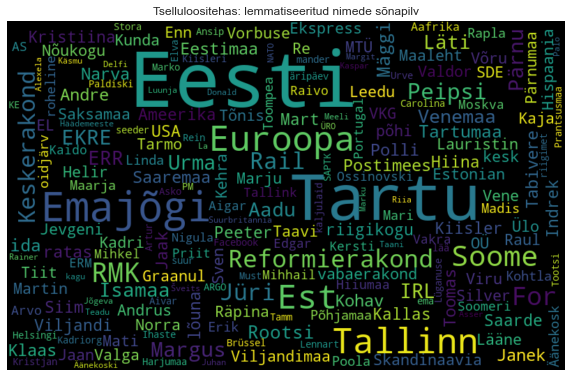

In [60]:
nimed_lemmad = []
for n in tqdm(nimed_texts):
    for sona in n:
        tekst = Text(sona).tag_layer().morph_analysis['lemma']
        nimed_lemmad.append(tekst[0][0])
        #print(tekst[0][0])

nimed_lemmad_words = ' '.join(map(str, nimed_lemmad))

wordcloud_nimed_lemmad = WordCloud(stopwords = stopsõnad_uus, width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(nimed_lemmad_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_nimed_lemmad, interpolation='bilinear')
plt.title(konflikt + ": lemmatiseeritud nimede sõnapilv")
plt.axis("off")
plt.savefig("tulemused_" + konflikt +"/" + konflikt + " joonis8_Nimed_lemmatiseeritud_sonapilv.png")
#plt.axis("off")
print("Nimed sõnapilves: ", len(nimed_lemmad))

In [61]:
jaotus8 =pd.DataFrame(nimed_lemmad, columns=['nimi'])
tabel8 = jaotus8.groupby(['nimi']).size().reset_index(name='esinemissagedus').sort_values(by='esinemissagedus', ascending=False)[:20]
tabel8['osakaal %']= (tabel8['esinemissagedus']/len(nimed_lemmad)*100)
tabel8_1 = tabel8.style.set_caption(konflikt + ": lemmatiseeritud nimede TOP 20")
tabel8.to_excel("tulemused_" + konflikt +"/" + konflikt + " tabel8_Nimed_lemmatiseeritud_TOP_20.xlsx")

In [62]:
tabel8_1